<a href="https://colab.research.google.com/github/LucianoTrujillo/7506R-2C2022-GRUPO10/blob/main/7506R_TP1_GRUPO10_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**TP1: Propiedades en Venta**



---


---


## *Facultad de Ingeniería, Universidad de Buenos Aires*

---
### *2do Cuatrimestre de 2022*

---
### *Organización de Datos*

### *Curso: Rodriguez*

### *Integrantes:*

* Luciano Leon Trujillo Palomo ltrujillo@fi.uba.ar 105664
* María Pilar Gaddi mgaddi@fi.uba.ar 105682
* Federico Adrian Solari Vazquez fsolariv@fi.uba.ar 106895
* Maria Vazquez Navarro mvazquezn@fi.uba.ar 105576
* Mateo Bulnes mbulnes@fi.uba.ar 106211
---

## **Objetivo del trabajo**

---
---

El objetivo de la siguiente investigación es aplicar técnicas de análisis exploratorio, preprocesamiento
de datos, agrupamiento, clasificación y regresión sobre un dataset real y poder obtener conclusiones y predicciones útiles. En especial, identificamos tres objetivos individuales:
* analizar si es posible agrupar los datos en función de
algún criterio, identificando a qué obedece el mismo.
* clasificar cada anuncio en tres categorías relacionadas al
precio de venta (alto, medio y bajo).
* predecir el precio de venta en dólares de una propiedad tipo
vivienda ubicada en Capital Federal.

---





## **Setup previo**


Importamos todas las librerías a utilizar a lo largo del trabajo:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn as sk


# para pca
from sklearn import datasets
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler



Importamos el dataset original y lo guardamos para su posterior uso:

In [2]:

dwn_url='https://drive.google.com/uc?id=1z05Y6UwTu8fz1DpeE4JlRoyjJx_vPKmM'
ds_original = pd.read_csv(dwn_url)
ds_original.head(5)

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

In [3]:
# función auxiliar para mostrar gráficos completos 
def mostrar_metadata_grafico(titulo, ylabel=None, xlabel=None, leyendas=None):
  plt.title(titulo)
  if ylabel:
    plt.ylabel = ylabel
  if xlabel:
    plt.xlabel = xlabel
  if leyendas:
    plt.legend = leyendas
  plt.show()



---
---


# Análisis Exploratorio y Preprocesamiento de Datos
---
---



## Pre-selección de datos
---
El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

Primero filtramos por tipo de vivienda:

In [4]:
ds = ds_original.copy()
ds = ds.query('property_type == "Casa" or property_type == "Departamento" or property_type == "PH"')

Luego filtramos los ubicados en Capital Federal: 



In [5]:
ds.query('\
place_l3=="Capital Federal" or \
place_l4=="Capital Federal" or \
place_l5=="Capital Federal" or \
place_l6=="Capital Federal"').size

0

Observamos que la única columna que contiene a la clasificación de Capital Federal es place_l2, con lo cual con filtrar por l2, nos aseguramos de únicamente quedarnos con las filas que cumplan ser de Capital Federal.

In [6]:
ds = ds.query('place_l2 == "Capital Federal"')

Filtramos por tipo de operación (Venta):

In [7]:
ds = ds.query('operation == "Venta"')

Filtramos por moneda (USD):

In [8]:
ds = ds.query('property_currency == "USD"')

Comparamos el tamaño del ds original y el que utilizaremos para el análisis en el trabajo:

In [9]:
print("Tamaño original:", ds_original.shape, "Tamaño actual", ds.shape)

Tamaño original: (460154, 20) Tamaño actual (94249, 20)


#### Filtrado de valores inválidos

#####Duplicados

Analizaremos la cantidad de duplicados del dataset.

In [10]:
print(f"Cantidad de duplicados: {ds[ds.duplicated()].shape[0]}")
print(f"Porcentaje de duplicados: {round(ds[ds.duplicated()].shape[0]*100/ds.shape[0])}%")

Cantidad de duplicados: 0
Porcentaje de duplicados: 0%


Procedemos a analizar los duplicados sin tener en cuenta la columna del id.

In [11]:
columnas = ds.columns.to_list()
columnas.remove('id')

print(f"Cantidad de filas con todo duplicado menos id: {ds[ds.duplicated(subset=columnas)].shape[0]}")
print(f"Porcentaje de filas con todo duplicado menos id: {round(ds[ds.duplicated(subset=columnas)].shape[0]*100/ds.shape[0])}%")

Cantidad de filas con todo duplicado menos id: 1222
Porcentaje de filas con todo duplicado menos id: 1%



Con lo observado asumimos que el id se genera automaticamente al ingresar datos, sin antes verificar que los mismos no hayan sido ingresados antes.

Sin embargo notamos el hecho de que podrian presentarse casos de departamentos en los cuales todo sea igual, y se trate de dos departamentos en distintos pisos de un edificio, por lo tanto a continuacion analizaremos la frecuencia de esos casos.

In [12]:
ds_duplicados = ds[ds.duplicated(subset=columnas)]

duplicados_en_casa_y_ph=ds_duplicados.property_type != "Departamento"
duplicados_en_casa_y_ph.sum()

ds_solo_deptos_duplicados=ds_duplicados.drop(ds_duplicados[duplicados_en_casa_y_ph].index) #dejamos esta variable, porque nos interesan las cantidad para anlaizar LO QUE FALTA
print(ds_duplicados.property_title.unique().size)
print(ds_solo_deptos_duplicados.property_title.unique().size)

688
600


Vemos que los datos de departamentos que se encuentran duplicados son 688, mientras que si eliminamos los duplicados, nos quedariamos con un total de 600 casos unicos. 

Nos parece razonable eliminar esos 88, siendo que en el peor de los casos solo estariamos perdiendo 88 departamentos que en realidad se encuentren en el mismo edificio, lo cual no nos parece que aporte tanto a nuestro modelo. 

Con los casos de PH y Casa no nos parece necesario hacer el analisis anteior, siendo que en estos casos la latitud y longitud si deberian cambiar en caso de tratarse de casas o PHs diferentes. Por lo tanto eliminamos los casos duplicados.

In [13]:
print(ds.shape[0])
ds.drop_duplicates(subset=columnas, inplace=True)
print(ds.shape[0])

94249
93027


##### tener mas superficie cubierta que superficie total

Notamos que los registros que tengan mas superficie cubierta que total seran invalidos, siendo que no se puede cubrir mas superficie que con la que se cuenta. Analizamos esos registros:

In [14]:
print(len(ds.query('property_surface_total < property_surface_covered')))
print(len(ds.query('property_surface_total < property_surface_covered')) * 100 / len(ds))


197
0.21176647639932492


Observando bajas cantidades de estos registros decidimos eliminarlos del dataset.

In [15]:
ds.drop(ds.query('property_surface_total < property_surface_covered').index, inplace=True)

##### tener cubierta de 1.0 

In [16]:
print(ds.query('property_surface_covered == 1').property_surface_total.unique())
print(ds.query('property_surface_covered == 1').property_surface_total.value_counts())
print('cantidad: ', len(ds.query('property_surface_covered == 1')))
print('porcentaje: ', len(ds.query('property_surface_covered == 1')) * 100 / len(ds))



[ nan 117.  80.  50.]
117.0    2
80.0     1
50.0     1
Name: property_surface_total, dtype: int64
cantidad:  29
porcentaje:  0.031239900894107508


In [17]:
ds.drop(ds.query('property_surface_covered == 1').index , inplace=True)


Notamos que una cubierta de 1.0 no tiene sentido. Al analizarlos junto con la superficie total vemos que la mayoria son datos invalidos. Siendo que las cantidades de registros con estas caracteristicas es razonablemente pequeña a comparacion de la totalidad de los datos, decidimos eliminar los registros. 

##### tener mas habitaciones que ambientes

Realizamos un análisis sobre los posibles registros que podrían llegar a generar valores inválidos en  property_bedrooms. 

Debido a la relacion logica que tienen property_bedrooms y property_rooms, consideramos que property_rooms es el mejor candidato para determinar los valores inválidos de property_bedrooms. 

In [18]:
pd.crosstab(ds.property_rooms, ds.property_bedrooms) 

property_bedrooms  -1.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   \
property_rooms                                                              
1.0                    0   5315     28      1      1      1      0      0   
2.0                    1  25503    225      8      0      0      0      0   
3.0                    0    442  25331    340     32      2      1      0   
4.0                    0     33   1258  14394    296     15      8      1   
5.0                    0      1    121   1930   2900     48      8      3   
6.0                    0      0     35    455    820    471     19      1   
7.0                    0      1      3    100    348    167     82     10   
8.0                    0      0      4     15    132     83     56     46   
9.0                    0      0      0     17     37     37     21     18   
10.0                   0      0      0      2     22     20     15     10   
11.0                   0      0      0      0      3      6      4      3   
12.0                   0      0      0      1      2      5      4      3   
13.0                   0      0      0      0      0      0      0      0   
14.0                   0      0      0      0      0      0      0      0   
15.0                   0      2      0      0      0      0      0      0   
16.0                   0      0      0      0      0      0      0      0   
17.0                   0      0      0      0      0      0      0      0   
18.0                   0      0      0      0      0      0      0      0   
19.0                   0      0      0      0      0      0      0      0   
20.0                   0      1      0      0      0      0      0      0   
24.0                   0      0      0      0      0      0      0      0   
28.0                   0      0      0      0      0      0      0      0   
30.0                   0      0      2      0      0      0      0      0   
32.0                   0      0      0      0      0      0      0      0   
36.0                   0      0      0      0      0      0      0      0   
40.0                   0      0      0      1      0      0      0      0   

property_bedrooms   8.0    9.0   ...   14.0   15.0   16.0   17.0   18.0  \
property_rooms                   ...                                      
1.0                    0      0  ...      0      0      0      0      0   
2.0                    0      0  ...      0      0      0      0      0   
3.0                    0      0  ...      0      0      0      0      0   
4.0                    1      0  ...      0      0      0      0      0   
5.0                    2      0  ...      0      0      0      0      0   
6.0                    3      0  ...      0      0      0      0      0   
7.0                    1      0  ...      0      0      0      0      0   
8.0                   10      0  ...      0      1      0      0      0   
9.0                   16      0  ...      0      0      0      0      0   
10.0                   5     16  ...      0      2      0      0      0   
11.0                   7      3  ...      0      0      0      0      0   
12.0                   3      2  ...      0      0      0      0      0   
13.0                   0      3  ...      0      0      0      0      0   
14.0                   2      1  ...      0      0      0      0      0   
15.0                   0      0  ...      2      1      2      0      0   
16.0                   0      0  ...      0      0      2      0      0   
17.0                   1      0  ...      1      0      1      1      0   
18.0                   0      0  ...      0      0      0      3      0   
19.0                   0      0  ...      0      0      0      0      2   
20.0                   0      0  ...      0      0      0      1      0   
24.0                   0      0  ...      0      0      0      0      0   
28.0                   0      0  ...      0      0      1      0      0   
30.0                   0      0  ...      0

Viendo la tabla, pudimos visulizar que en caso de que la cantidad de ambientes sea menor a la cantidad de habitaciones, property_bedrooms seria un valor inválido.



Además, notamos que hay valores de property_bedrooms negativos, con lo cual esos valores también serían invalidos.

In [19]:
cond_mas_bedrooms_que_rooms = ds['property_bedrooms'] > ds['property_rooms']

reg_mas_bed_que_rooms = ds[cond_mas_bedrooms_que_rooms]
reg_mas_bed_que_rooms.shape

(134, 20)

Como podemos observar hay 150 registros de los cuales hay mas habitaciones en la propiedad que cantidad de ambientes, por lo tanto serian valores inválidos por lo que consideramos que hay que eliminarlos

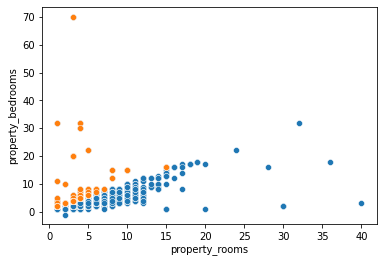

In [20]:
# sns.set(rc={"figure.figsize":(8, 8)}) #aumenta el tamaño del grafico
sns.scatterplot(data = ds, x = "property_rooms", y = "property_bedrooms")
sns.scatterplot(data = reg_mas_bed_que_rooms, x = "property_rooms", y = "property_bedrooms")#grafico de valores inválidos

In [21]:
ds.drop(reg_mas_bed_que_rooms.index, inplace=True)# elimino las filas con mas bedrooms que rooms

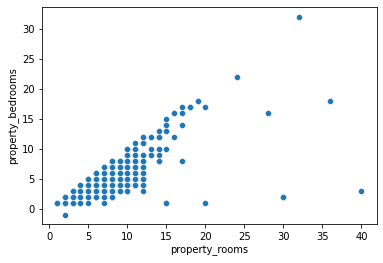

In [22]:
sns.scatterplot(data = ds, x = "property_rooms", y = "property_bedrooms")

In [23]:
cond_bedrooms_menores_a_uno = ds['property_bedrooms'] < 1
reg_con_bedrooms_menores_a_uno = ds[cond_bedrooms_menores_a_uno]
reg_con_bedrooms_menores_a_uno.shape

(1, 20)

Observamos que solo un registro contiene una cantidad de bedrooms menor o igual a cero, por ese motivo consideramos que debe ser eliminado

In [24]:
ds.drop(reg_con_bedrooms_menores_a_uno.index, inplace=True)# elimino las filas con mas bedrooms menores a 1

A continuacion demostramos que no se encuentran valores negativos en las columnas en donde los valores siempre deben ser positivos, por lo tanto no es necesario eliminar datos.

In [25]:
ds[ds['property_price'] < 1].shape 

(0, 20)

In [26]:
ds[ds['property_rooms'] < 1].shape

(0, 20)

In [27]:
ds[ds['property_surface_total'] < 1].shape

(0, 20)

In [28]:
ds[ds['property_surface_covered'] < 1].shape

(0, 20)

##### created_on < start_date < end_date




In [29]:
ds[ds['start_date'] < ds['created_on']].shape 

(0, 20)

In [30]:
ds[ds['end_date'] < ds['start_date']].shape 

(0, 20)

In [31]:
ds[ds['end_date'] < ds['created_on']].shape 

(0, 20)

Como podemos observar todas las fechas de los avisos que se encuentran en el dataset cumplen con las condiciones necesarias para ser consideradas validas. (considerando al año 9999 como que el aviso no fue dado de baja todavía, se analiza mas adelante)


## Exploración Inicial
---


### Clasificación  de variables 


####Variables cuantitativas discretas

- start date, end date, created on: 

    Las fechas pueden ser consideradas cuantitativas discretas dado que toman valores numéricos ordenables, y entre dos valores consecutivos no existen valores intermedios. 

- property_rooms, property_bedrooms: 

    Pueden ser consideradas cuantitativas discretas ya que pueden tomar un conjunto a lo sumo numerable de valores, y cuentan cosas.

#### Variables cuantitativas continuas

- latitud y longitud:  

    Estas variables al tomar valores numéricos en los cuales existen infinitos valores intermedios (son arbitrariamente fraccionables), pueden ser consideradas como continuas. 

- property_surface_total, property_surface_covered, property_price: 

    Al igual que las variables anteriores, estas pueden tomar infinitos valores numéricos intermedios y por esa razón son consideradas continuas. 

####Variables cualitativas nominales

- id: 

    Es una variable cualitativa numérica que representa una identificación, cada una de estas es diferente y no tienen un orden visible. 

- place_l2, place_l3, place_l4, place_l5, place_l6: 

    Son variables de texto no trivialmente ordenables, dado que simplemente son un nombre correspondiente a la ubicación geográfica.

- operation, property_type, property_currency: 

    Son variables de texto que representan características para diferenciar propiedades entre sí, pero al igual que places, no tienen un ordenamiento predefinido. 

#### Variables irrelevantes


Observando las variables nombradas, consideramos las siguiente variables irrelevantes para el analisis:



- id: 

    El la campo Id es irrelevante ya que no aporta información sobre las viviendas, simplemente es utilizado para guardar la información en la base de datos.



- place_l5, place_l6:  
    
    Ambos campos son irrelevantes dado que no poseen datos que brinden información de gran importancia para el dominio del problema (todos los datos son nulos).



- property_title: 
    
    Dado que no haremos un análisis de NLP, no nos es relevante este campo.

###Variables cuantitativas
---


#### Cálculo medidas de resumen

Como debemos calcular la media, mediana, q1, q3 y moda para las variables start_date, end_date, created_on y las mismas son fechas, debemos convertirlas a un tipo de dato adecuado:

In [32]:
ds_filtrado = ds.copy()
ds_filtrado['start_date']=pd.to_datetime(ds_filtrado['start_date'], errors='ignore')
ds_filtrado['created_on']=pd.to_datetime(ds_filtrado['created_on'], errors='ignore')

In [33]:
try: 
    pd.to_datetime(ds_filtrado['end_date'])
except Exception as e: print(e)

Out of bounds nanosecond timestamp: 9999-12-31 00:00:00


Observamos que la columna end_date tiene una row cuyo valor es out of bounds: "9999-12-31", con lo cual averiguamos cuantos de éstos valores de estos hay:

In [34]:
invalid_end_dates = ds_filtrado.end_date[lambda date: pd.isnull(pd.to_datetime(date, errors='coerce'))]
invalid_end_dates.size


4932

Encontramos 5019 apariciones de fecha que no tiene finalización. En la sección de Feature Engineering analizaremos que hacer con estos datos. <font color=red>Mientras tanto, hacemos un dataset que no contenga a las fechas sin finalización para poder calcularle los valores pedidos.</font>

In [35]:
ds_end_date = ds_filtrado.copy()
cond_operacion = pd.notnull(pd.to_datetime(ds_end_date['end_date'], errors='coerce'))
ds_end_date = ds_end_date[cond_operacion]
ds_end_date.end_date = pd.to_datetime(ds_end_date['end_date'].copy())

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [36]:
# función para modularizar las medidas resumenes de las variables cuantitativas
def mostrar_medidas_resumen(columna, ylabel=None, show_boxplot=True, df=ds_filtrado):
    mean=df[columna].mean()

    measure_info=np.nanpercentile(df[columna],[25,50,75])
    
    mode=df[columna].mode()

    print(f'Medidas de resumen para la variable {columna}:\n\
    \tMedia: {mean}\n\
    \tq1: {measure_info[0]}\n\
    \tMediana: {measure_info[1]}\n\
    \tq3: {measure_info[2]}\n\
    \tModa: {mode}')

    if(show_boxplot):
        sns.boxplot(y=df[columna], showfliers = False) # no mostramos outliers para ver mejor la distribución
        mostrar_metadata_grafico(f"distribución de {ylabel} en formato boxplot", ylabel=ylabel)

    return measure_info  

##### start date

In [37]:
mostrar_medidas_resumen('start_date', show_boxplot=False)

Medidas de resumen para la variable start_date:
    	Media: 2021-07-01 05:40:12.613040128
    	q1: 2021-04-03T00:00:00.000000000
    	Mediana: 2021-06-29T00:00:00.000000000
    	q3: 2021-09-23T00:00:00.000000000
    	Moda: 0   2021-12-16
dtype: datetime64[ns]


array(['2021-04-03T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-09-23T00:00:00.000000000'], dtype='datetime64[ns]')

#####created_on

In [38]:
mostrar_medidas_resumen('created_on', show_boxplot=False)

Medidas de resumen para la variable created_on:
    	Media: 2021-07-01 05:40:12.613040128
    	q1: 2021-04-03T00:00:00.000000000
    	Mediana: 2021-06-29T00:00:00.000000000
    	q3: 2021-09-23T00:00:00.000000000
    	Moda: 0   2021-12-16
dtype: datetime64[ns]


array(['2021-04-03T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-09-23T00:00:00.000000000'], dtype='datetime64[ns]')

#####end_date

In [39]:
mostrar_medidas_resumen('end_date', show_boxplot=False, df=ds_end_date)

Medidas de resumen para la variable end_date:
    	Media: 2021-09-14 07:52:50.957667328
    	q1: 2021-06-05T00:00:00.000000000
    	Mediana: 2021-08-30T00:00:00.000000000
    	q3: 2022-01-27T00:00:00.000000000
    	Moda: 0   2021-06-05
dtype: datetime64[ns]


array(['2021-06-05T00:00:00.000000000', '2021-08-30T00:00:00.000000000',
       '2022-01-27T00:00:00.000000000'], dtype='datetime64[ns]')

#####property_rooms

Medidas de resumen para la variable property_rooms:
    	Media: 2.8248625174581004
    	q1: 2.0
    	Mediana: 3.0
    	q3: 4.0
    	Moda: 0    3.0
dtype: float64


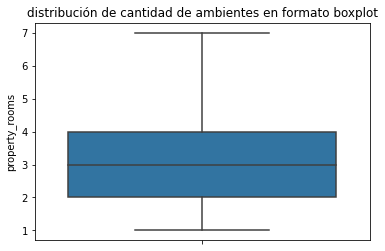

array([2., 3., 4.])

In [40]:
mostrar_medidas_resumen('property_rooms', ylabel="cantidad de ambientes")

##### property_bedrooms

Medidas de resumen para la variable property_bedrooms:
    	Media: 2.007078436397808
    	q1: 1.0
    	Mediana: 2.0
    	q3: 3.0
    	Moda: 0    1.0
dtype: float64


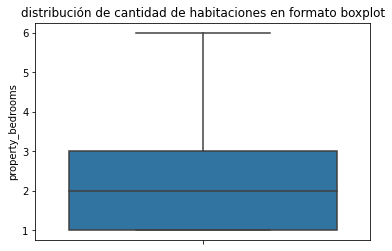

array([1., 2., 3.])

In [41]:
mostrar_medidas_resumen('property_bedrooms', ylabel="cantidad de habitaciones")

#####latitud

Medidas de resumen para la variable latitud:
    	Media: -34.591508944474754
    	q1: -34.6159390106
    	Mediana: -34.5957447
    	q3: -34.5774132
    	Moda: 0   -34.54125
dtype: float64


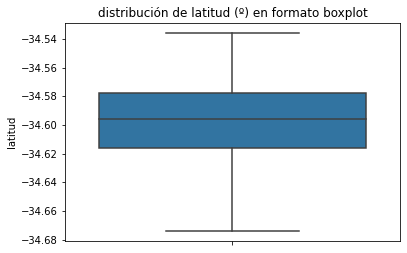

array([-34.61593901, -34.5957447 , -34.5774132 ])

In [42]:
mostrar_medidas_resumen('latitud', ylabel="latitud (º)")

#####longitud

Medidas de resumen para la variable longitud:
    	Media: -58.44975029219221
    	q1: -58.4665226
    	Mediana: -58.4389954
    	q3: -58.4088623
    	Moda: 0   -58.472966
dtype: float64


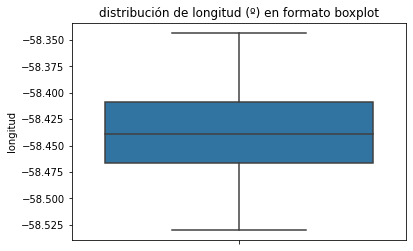

array([-58.4665226, -58.4389954, -58.4088623])

In [43]:
mostrar_medidas_resumen('longitud', ylabel="longitud (º)")

#####property_surface_total

Medidas de resumen para la variable property_surface_total:
    	Media: 108.79670617137917
    	q1: 45.0
    	Mediana: 65.0
    	q3: 105.0
    	Moda: 0    50.0
dtype: float64


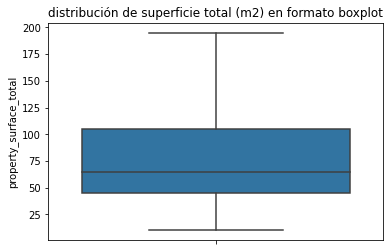

array([ 45.,  65., 105.])

In [44]:
mostrar_medidas_resumen('property_surface_total', ylabel="superficie total (m2)")

#####property_surface_covered

Medidas de resumen para la variable property_surface_covered:
    	Media: 86.82811957872117
    	q1: 40.0
    	Mediana: 58.0
    	q3: 88.0
    	Moda: 0    40.0
dtype: float64


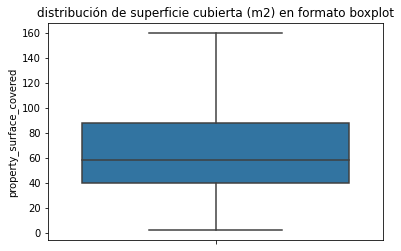

array([40., 58., 88.])

In [45]:
mostrar_medidas_resumen('property_surface_covered', ylabel="superficie cubierta (m2)")

#####property_price

Medidas de resumen para la variable property_price:
    	Media: 225248.98317613796
    	q1: 95000.0
    	Mediana: 143473.5
    	q3: 235000.0
    	Moda: 0    110000.0
dtype: float64


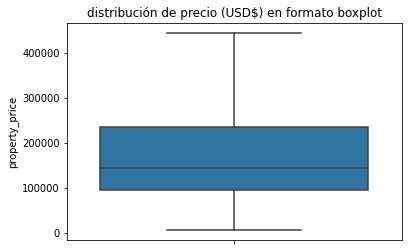

array([ 95000. , 143473.5, 235000. ])

In [46]:
mostrar_medidas_resumen('property_price', ylabel="precio (USD$)")

#### Análisis gráfico de distribuciones

In [47]:
def mostrar_distribuciones_cuantitativas(variable, ds=ds_filtrado, figsize=(5,5), bins=None, binwidth=None, discrete=False, espaciado=4, rotacion=90):
  if binwidth:
    graph = sns.displot(ds, x=variable, discrete=discrete, bins=bins, binwidth=binwidth)
  else:
    graph = sns.displot(ds, x=variable, discrete=discrete, bins=bins)

  graph.fig.set_figheight(figsize[1])
  graph.fig.set_figwidth(figsize[0])
  ax = graph.ax
  mids = [rect.get_x() for rect in ax.patches]
  mids = [item for index, item in enumerate(mids) if index % espaciado == 0]
  ax.set_xticks(mids)
  ax.tick_params(axis='x', rotation=rotacion, labelsize=12)

  mostrar_metadata_grafico(f"distribución de {variable}", ylabel="frecuencia")



##### start_date

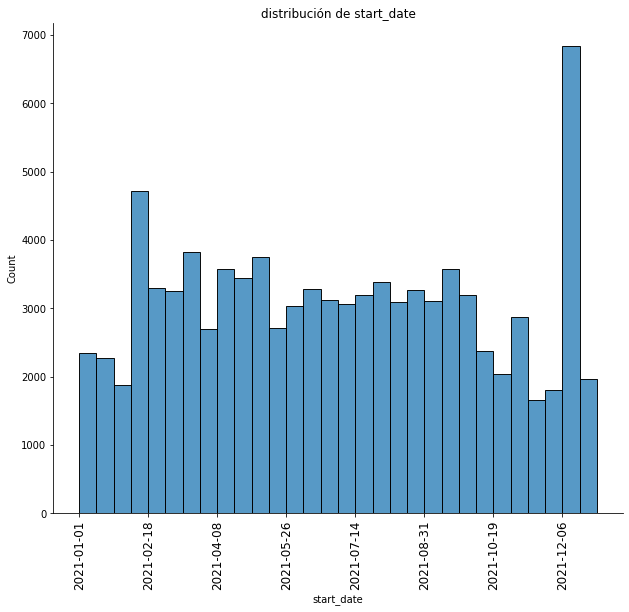

In [48]:
mostrar_distribuciones_cuantitativas("start_date", figsize=(10, 8), bins=30)

##### end_date

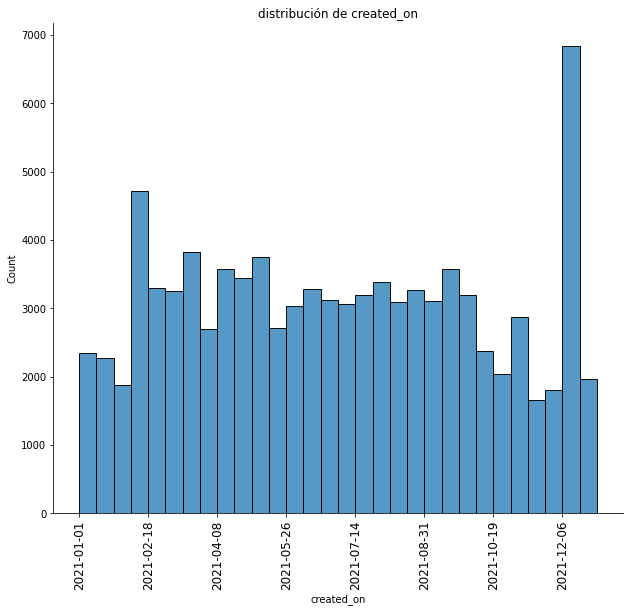

In [49]:
mostrar_distribuciones_cuantitativas("created_on", figsize=(10, 8), bins=30)

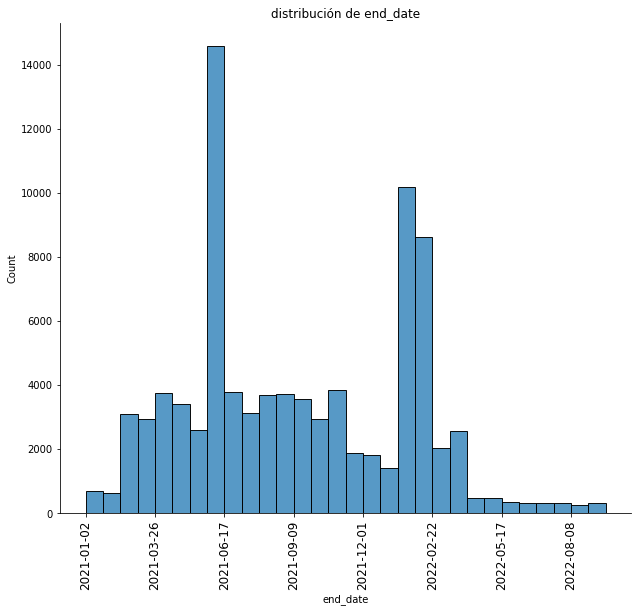

In [50]:
mostrar_distribuciones_cuantitativas("end_date", ds=ds_end_date, figsize=(10, 8), bins=30)

#####created_on

#####property_rooms

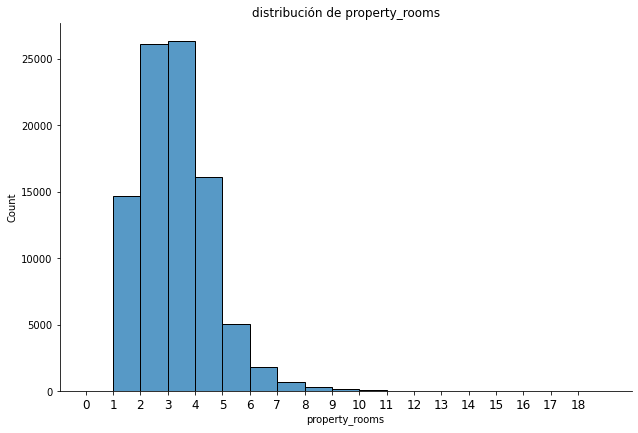

In [51]:
mostrar_distribuciones_cuantitativas("property_rooms", figsize=(10, 6), bins=[*range(20)], espaciado=1, rotacion=0)

#####property_bedrooms

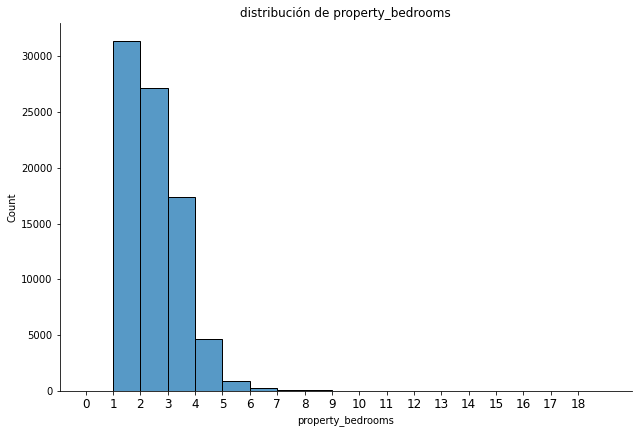

In [52]:
mostrar_distribuciones_cuantitativas("property_bedrooms", figsize=(10, 6), espaciado=1, bins=[*range(20)], rotacion=0)

#####property_surface_total

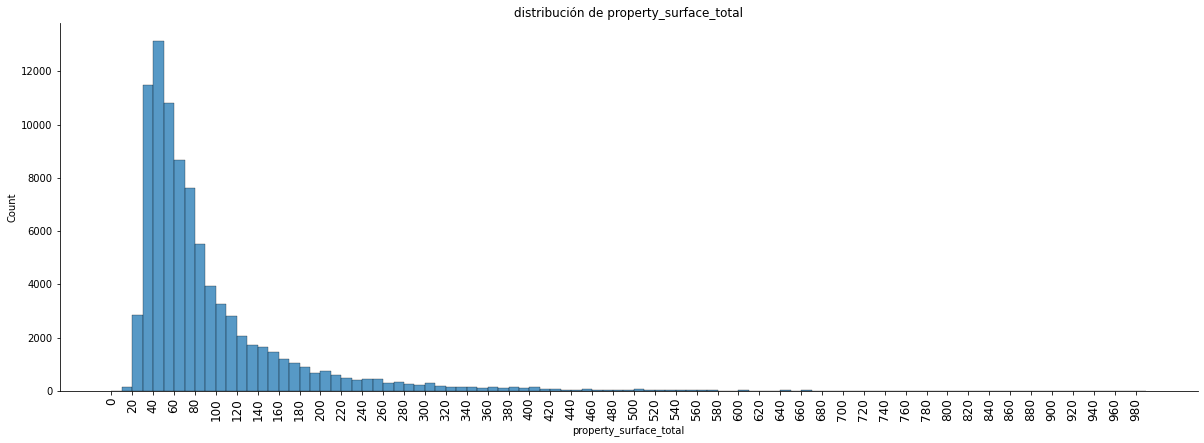

In [53]:
ds_property_surface_total_sin_outliers = ds_filtrado[['property_surface_total']]
ds_property_surface_total_sin_outliers = ds_property_surface_total_sin_outliers[(ds_property_surface_total_sin_outliers.property_surface_total > 0) & (ds_property_surface_total_sin_outliers.property_surface_total < 1000)]
mostrar_distribuciones_cuantitativas("property_surface_total", ds=ds_property_surface_total_sin_outliers, figsize=(20, 6), bins=[*range(0, 1000, 10)], espaciado=2)

#####property_surface_covered

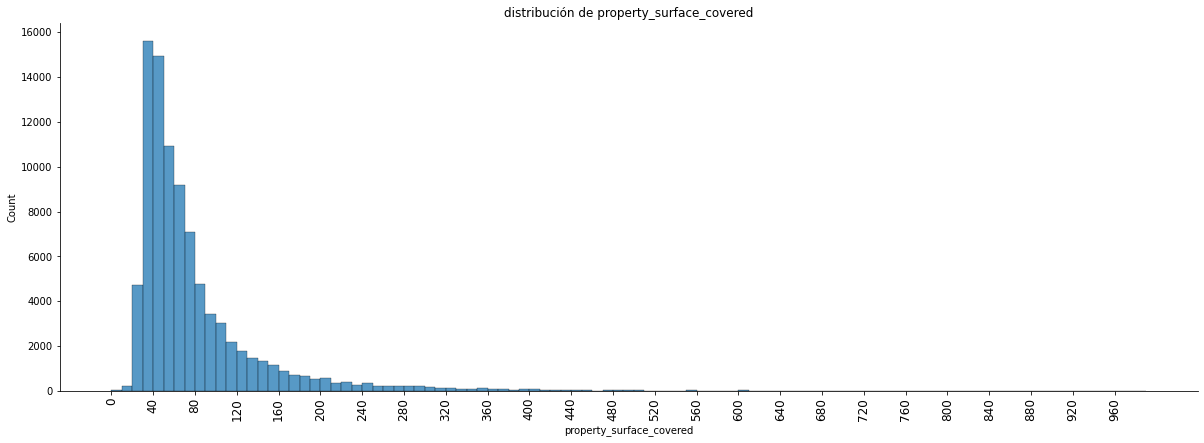

In [54]:
ds_property_surface_covered_sin_outliers = ds_filtrado[['property_surface_covered']]
ds_property_surface_covered_sin_outliers = ds_property_surface_covered_sin_outliers[(ds_property_surface_covered_sin_outliers.property_surface_covered > 0) & (ds_property_surface_covered_sin_outliers.property_surface_covered < 1000)]
mostrar_distribuciones_cuantitativas("property_surface_covered", ds=ds_property_surface_covered_sin_outliers, figsize=(20, 6), bins=[*range(0, 1000, 10)])

#####property_price

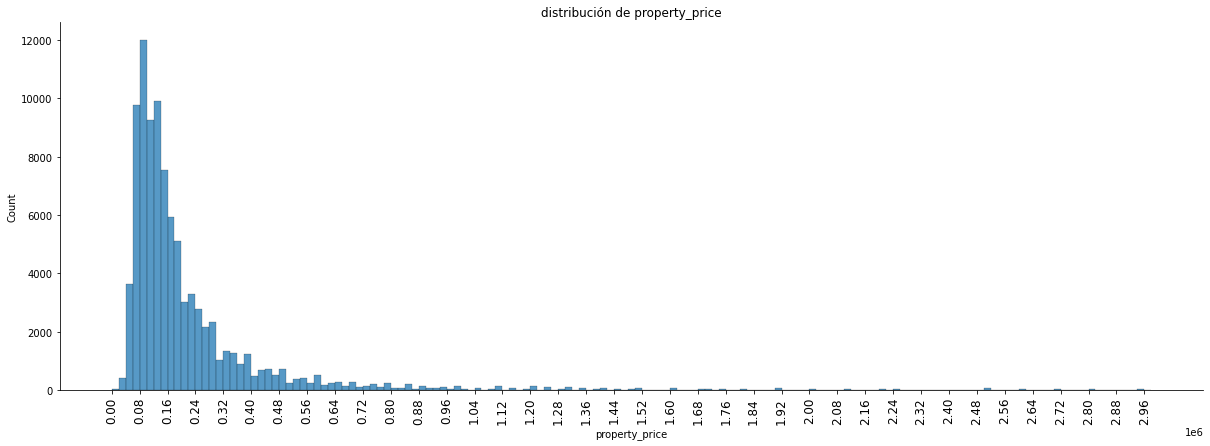

In [55]:
ds_property_price_sin_outliers = ds_filtrado[['property_price']]
ds_property_price_sin_outliers = ds_property_price_sin_outliers[(ds_property_price_sin_outliers.property_price > 0) & (ds_property_price_sin_outliers.property_price < 3000000)]
mostrar_distribuciones_cuantitativas("property_price", ds=ds_property_price_sin_outliers, figsize=(20, 6), bins=[*range(0, 3000000, 20000)], espaciado=4)


#####latitud

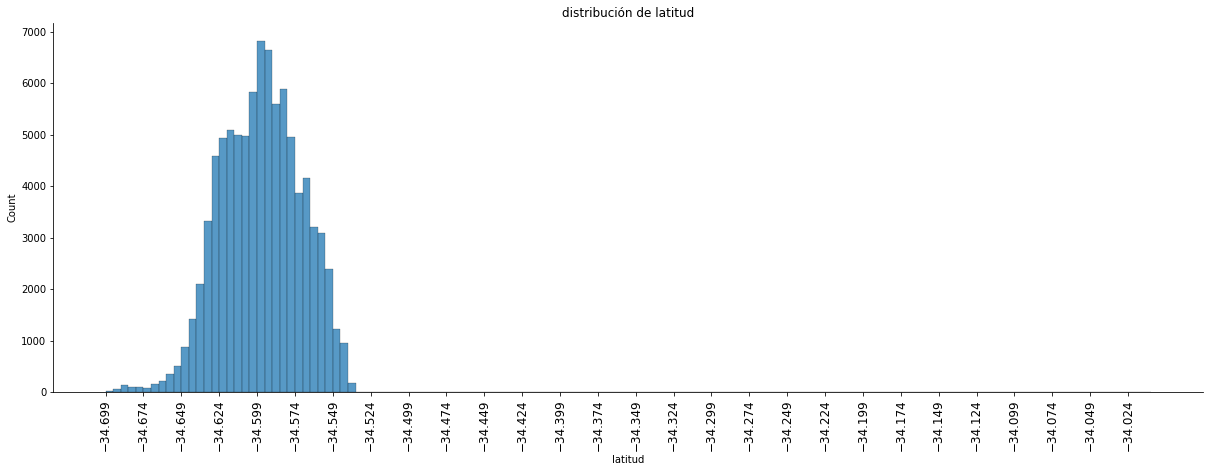

In [56]:
ds_latitud_sin_outliers = ds_filtrado[['latitud']]
ds_latitud_sin_outliers = ds_latitud_sin_outliers[(ds_latitud_sin_outliers.latitud > -38) & (ds_latitud_sin_outliers.latitud < -34)]
mostrar_distribuciones_cuantitativas("latitud", ds=ds_latitud_sin_outliers, figsize=(20, 6), binwidth=0.005, espaciado=5)

#####longitud

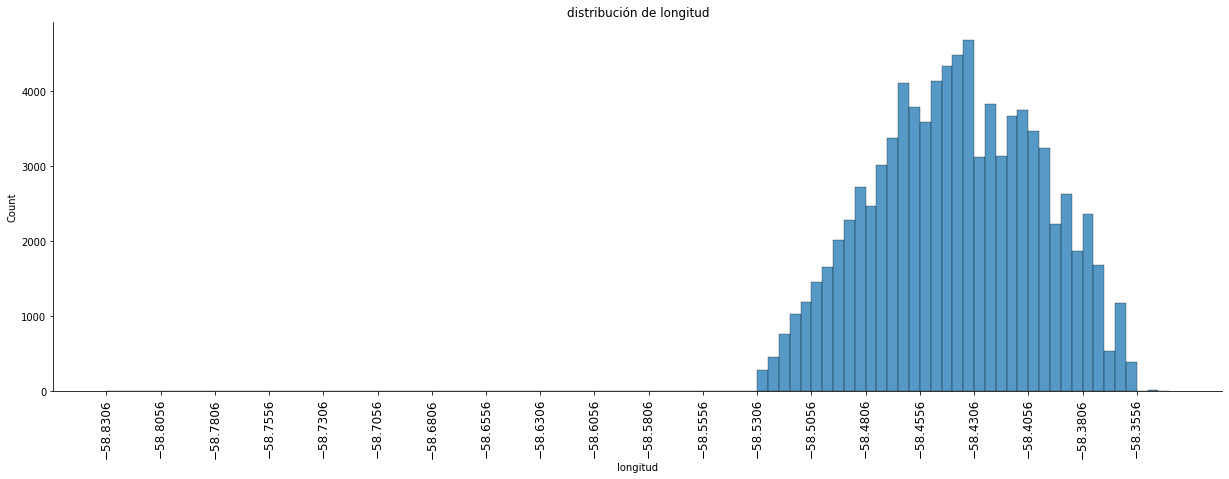

In [57]:
ds_longitud_sin_outliers = ds_filtrado[['longitud']]
ds_longitud_sin_outliers = ds_longitud_sin_outliers[(ds_longitud_sin_outliers.longitud > -59) & (ds_longitud_sin_outliers.longitud < -58)]
mostrar_distribuciones_cuantitativas("longitud", ds=ds_longitud_sin_outliers, espaciado=5, figsize=(20, 6), binwidth=0.005)

###### longitud y latitud en conjunto


In [58]:
import json
import shapely
import requests
import random
from shapely.geometry import shape, Point
from shapely.ops import unary_union
from shapely.ops import unary_union



url='https://drive.google.com/file/d/1eeT_53CFY63d55oZo50F7mOKPTZMW--V/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

url=requests.get(dwn_url)
data=url.text



data=json.loads(data)


caba_barrios = data
barrios = dict(
    (feature["properties"]["BARRIO"], shape(feature["geometry"])) 
    for feature in caba_barrios["features"]
)

all_barrios = unary_union(barrios.values())




In [59]:

def graficar_puntos_en_caba(longitudes, latitudes, clusters=None, tamano_de_punto=4,  proporcion=1):
  if clusters is not None:
    lat_long = list(zip(longitudes, latitudes, clusters))
  else:
    lat_long = list(zip(longitudes, latitudes))

  long_min, lat_min, long_max, lat_max = all_barrios.bounds

  viridis = cm.get_cmap('viridis', len(barrios) // 4)
  plasma = cm.get_cmap('plasma', len(barrios) // 4)
  inferno = cm.get_cmap('inferno', len(barrios) // 4)
  cividis = cm.get_cmap('cividis', len(barrios) - (len(barrios) // 4) * 3)
  colors = sum((list(x.colors) for x in (viridis, plasma, inferno, cividis)), [])

  random.shuffle(colors)


  f = plt.figure()
  f.set_figwidth(15)
  f.set_figheight(15)


  for idx, (barrio, shape) in enumerate(barrios.items()):
    for polygon in shape.geoms:
        plt.plot(*polygon.exterior.xy, color=colors[idx])
  
  values=lat_long.copy()
  random.shuffle(values)

  cont_outsiders=0
  cantidad = int(latitudes.size*proporcion)
  for dot in values[:cantidad]:     
    if(all_barrios.contains(Point(dot))):
       if len(dot) == 2:
          plt.scatter(x=dot[0], y=dot[1], s=tamano_de_punto, c='black')
       else:
          # print(dot[2]) 
          plt.scatter(x=dot[0], y=dot[1], s=tamano_de_punto, c=dot[2])
    else: 
      cont_outsiders= cont_outsiders+1
      plt.scatter(x=dot[0], y=dot[1], s=tamano_de_punto, c='red')
 
  plt.show()
  print("El porcentaje de outsiders dentro de la proporcion pedida de la muestra es:", cont_outsiders/cantidad*100)


def graficar_puntos_en_caba_sin_outliers(longitudes, latitudes, clusters, tamano_de_punto=4,  proporcion=1):
  long_min, lat_min, long_max, lat_max = all_barrios.bounds

  viridis = cm.get_cmap('viridis', len(barrios) // 4)
  plasma = cm.get_cmap('plasma', len(barrios) // 4)
  inferno = cm.get_cmap('inferno', len(barrios) // 4)
  cividis = cm.get_cmap('cividis', len(barrios) - (len(barrios) // 4) * 3)
  colors = sum((list(x.colors) for x in (viridis, plasma, inferno, cividis)), [])

  random.shuffle(colors)


  f = plt.figure()
  f.set_figwidth(15)
  f.set_figheight(15)



  for idx, (barrio, shape) in enumerate(barrios.items()):
    for polygon in shape.geoms:
        plt.plot(*polygon.exterior.xy, color=colors[idx])
  
  cantidad = int(latitudes.size*proporcion)
  plt.scatter(x=longitudes[:cantidad], y=latitudes[:cantidad], c=clusters[:cantidad], cmap=cividis)
 
  plt.show()

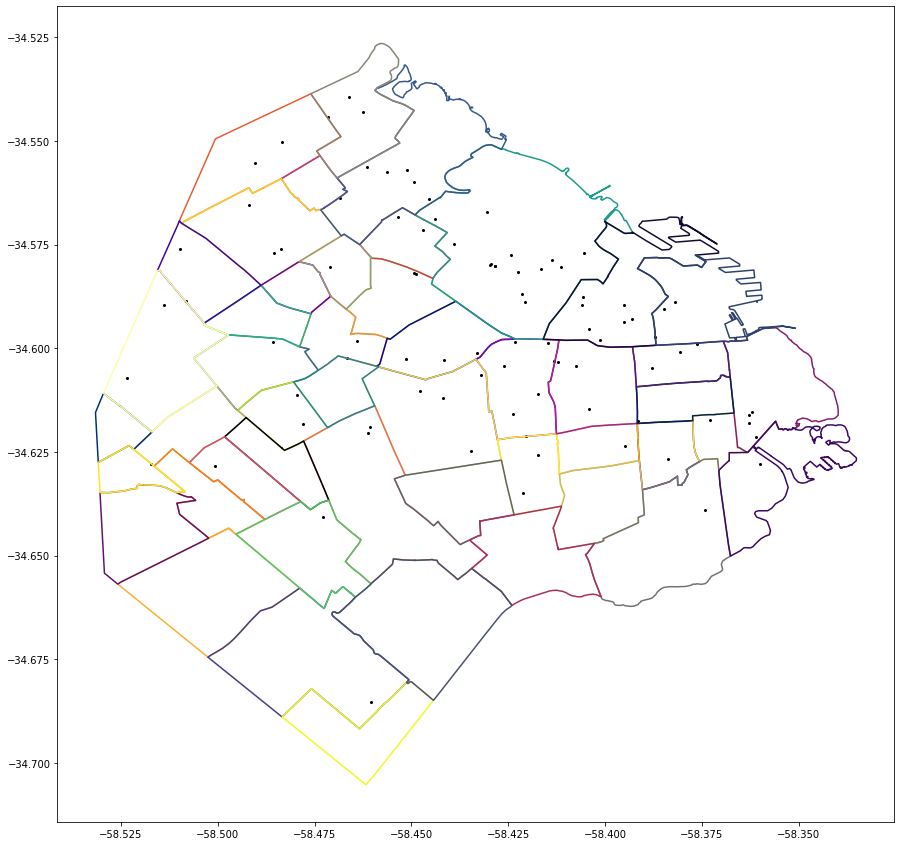

In [60]:
graficar_puntos_en_caba(ds_filtrado.longitud, ds_filtrado.latitud, proporcion=0.001)

Como vemos, los puntos se distribuyen de manera coherente con la realidad, donde hay mas densidad de poblacion en sectores populares. Luego analizaremos los puntos faltantes y outsiders por separado, en la secciones correspondientes.   

### Variables Cualitativas
---


#### Cantidad de valores posibles y frecuencias

In [61]:
def mostrar_frecuencias(columna, ancho=4, alto=4, df=ds_filtrado):
    frecuencia_por_valor = df.groupby(columna).size().to_frame("frecuencia")
    frecuencia_por_valor = frecuencia_por_valor.sort_values(by="frecuencia", ascending=False).reset_index()
    frecuencia_por_valor.head(40).plot.bar(x=columna, y="frecuencia", figsize=(ancho, alto))
    mostrar_metadata_grafico(f"frecuencias de valores posibles de {columna}", ylabel="frecuencia", xlabel="valores posibles")
    

El porcentaje de outsiders dentro de la proporcion pedida de la muestra es: 1.0869565217391304


#####place_l2

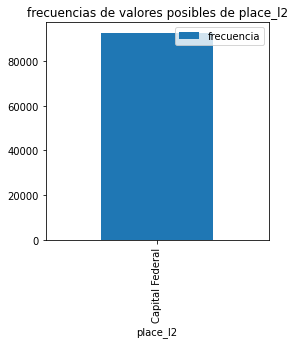

In [62]:
mostrar_frecuencias('place_l2')

#####place_l3

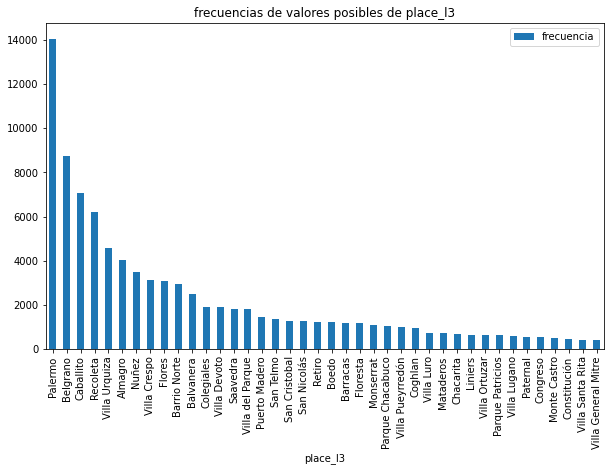

In [63]:
mostrar_frecuencias('place_l3', 10, 6)

#####place_l4

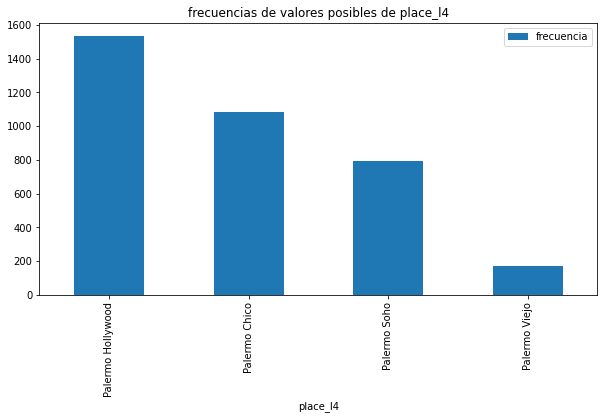

In [64]:
mostrar_frecuencias('place_l4', 10, 5)

#####operation

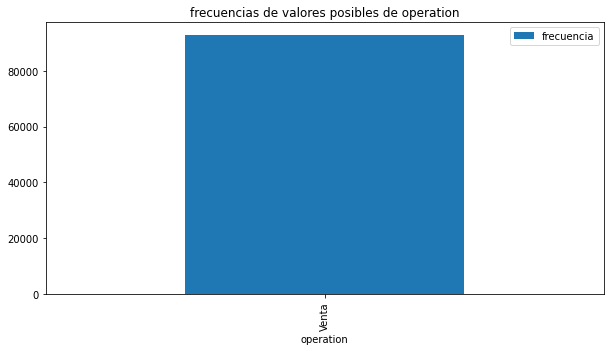

In [65]:
mostrar_frecuencias('operation', 10, 5)

#####property_type

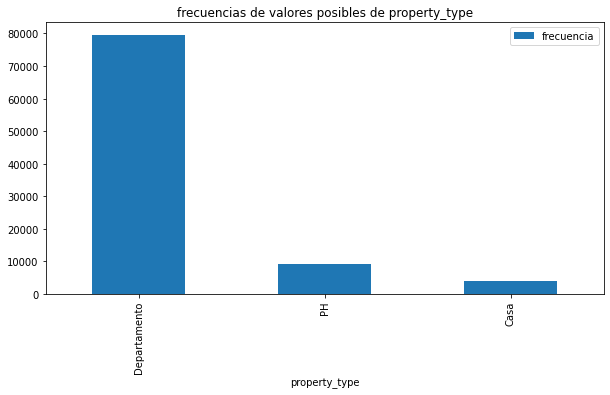

In [66]:
mostrar_frecuencias('property_type', 10, 5)

#####property_currency

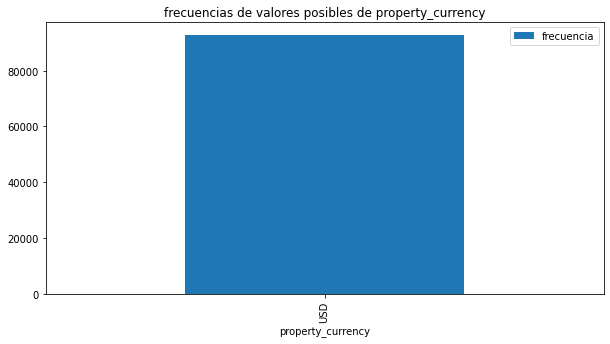

In [67]:
mostrar_frecuencias('property_currency', 10, 5)

## Análisis de Correlaciones existentes entre las variables
---



Eliminamos place_l6 al ser que tratan de elementos de tipo float64, siendo que no son validos como para evaluar correlaciones.

In [68]:
matriz_temp = ds_filtrado.drop(columns=['place_l6'])
matriz_correlacion = matriz_temp.corr()

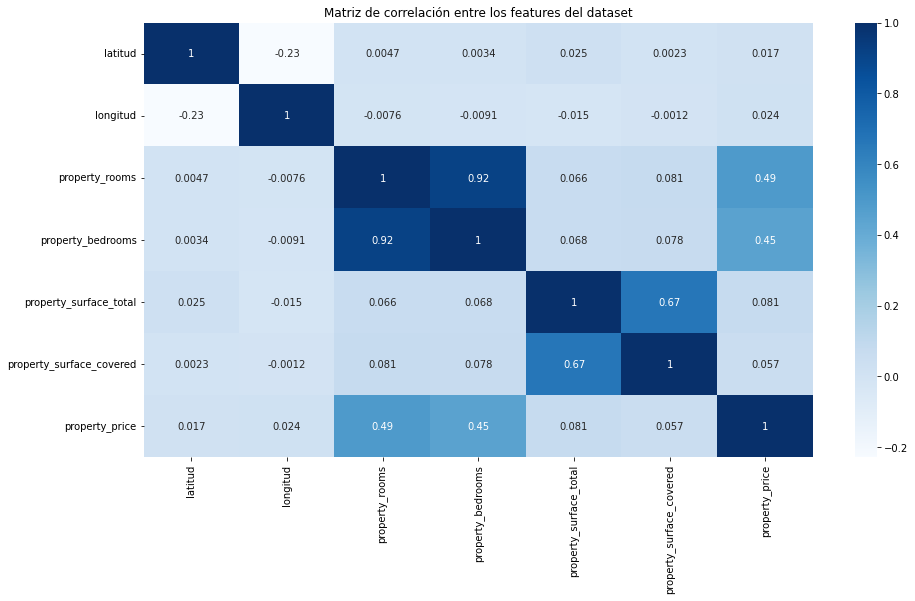

In [69]:
plt.figure(figsize = (15,8))
sns.heatmap(matriz_correlacion, annot = True, cmap='Blues')
mostrar_metadata_grafico("Matriz de correlación entre los features del dataset")

Como observamos del heatmap, hay ciertas variables con una correlación significativa, por ejemplo:

- la cantidad de habitaciones vs la cantidad de ambientes
- superficie cubierta vs superficie total
- precio vs cantidad de ambientes y habitaciones 

Estas relaciones tienen sentido, dado que uno esperaría que a medida aumenta la cantidad de ambientes (y/o cuartos), la propiedad sea mas cara. También tiene mucho sentido que a mas superficie total, se puede tener mas superficie cubierta.

Lo que nos sorprende es que el precio de la propiedad parece tener una correlación muy débil con la superficie total y cubierta, lo cual nos asombra puesto que uno esperaría que a medida que aumentan los m^2 de la propiedad, aumenta su precio. 

## Separacion del dataset para train y test

A continuacion haremos la separacion de los los conjuntos de entrenamiento y test. 

In [70]:
from sklearn.model_selection import train_test_split

#Creo un dataset con los features que voy a usar para clasificar
ds_filtrado_x = ds_filtrado.copy()
#Creo un dataset con la variable target
ds_filtrado_y = ds_filtrado['property_price'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_filtrado_x,
                                                    ds_filtrado_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

In [71]:
def para_x_train_x_test_realizar(accion, nombre_accion=None):
  if nombre_accion:
    print(f"realizando {nombre_accion} sobre x_train:")
  accion(x_train)
  if nombre_accion:
    print(f"realizando {nombre_accion} sobre x_test:")
  accion(x_test)


## Datos Faltantes
---


Tanto el análisis y la imputación/eliminación de datos faltantes se harán con los modelos de train y test. A partir de estos, sacaremos conclusiones. 

### Análisis de datos faltantes a nivel columna

In [72]:
def nulos_x_test_vs_nulos_x_train_columnas(size=(18,8), axis=0):
  filas_totales_test = x_test.shape[0]
  filas_totales_train = x_train.shape[0]

  plotdata = pd.DataFrame({
    "x_test":x_test.isna().sum(axis=axis)/filas_totales_test*100,
    "x_train":x_train.isna().sum(axis=axis)/filas_totales_train*100,
    }, 
  )

  plotdata.plot(kind="bar", figsize=size);
  mostrar_metadata_grafico("nulos en x_test vs nulos en x_train a nivel columna")

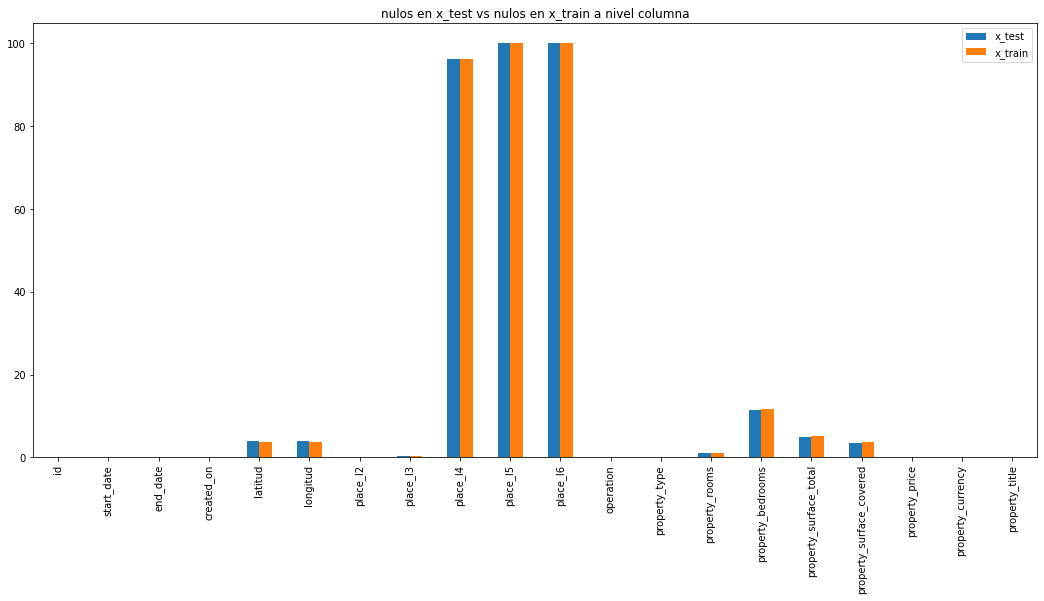

In [73]:
nulos_x_test_vs_nulos_x_train_columnas()

En principio, se observa que las proporciones de valores faltantes se mantienen en ambos sets (test y train). 

Por otro lado, observamos que place l4 está conformado mayormente por valores vacíos, mientras que l5 y l6 están completamente vacíos. Luego tenemos varias columnas con todos sus valores, y algunas otras con un porcentaje de valores faltantes relativamente bajo.

### Análisis de datos faltantes a nivel fila

In [74]:
def nulos_x_test_vs_nulos_x_train_filas(size=(18,8)):
  filas_totales_test = x_test.shape[0]
  filas_totales_train = x_train.shape[0]

  plotdata = pd.DataFrame({
    "x_test":x_test.isna().sum(axis=1).value_counts()/filas_totales_test*100,
    "x_train":x_train.isna().sum(axis=1).value_counts()/filas_totales_train*100,
    }, 
  )

  plotdata.plot(kind="bar", figsize=size);
  mostrar_metadata_grafico("nulos en x_test vs nulos en x_train a nivel fila")

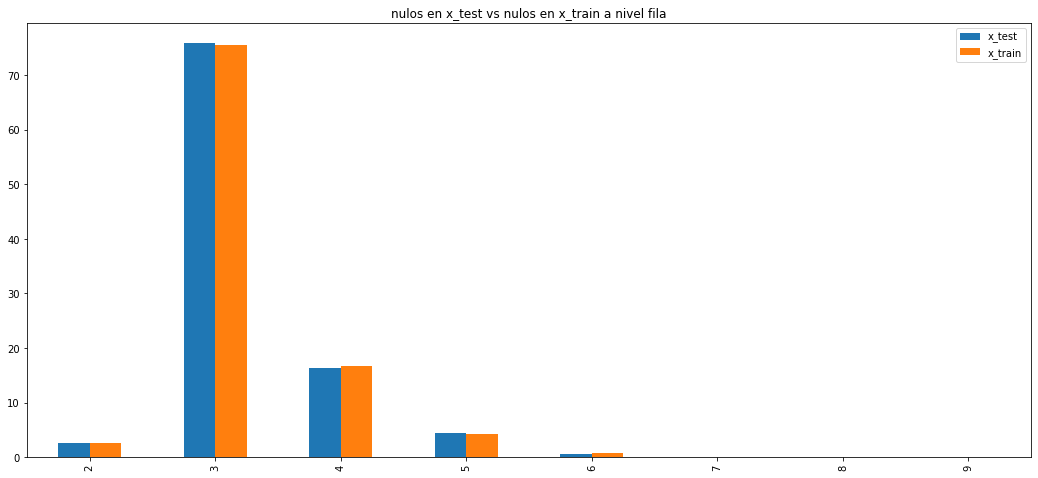

In [75]:
nulos_x_test_vs_nulos_x_train_filas()

En principio, se observa que las proporciones de valores faltantes se mantienen en ambos sets (test y train).

Ademas podemos observar que contamos con una amplia cantidad de filas con 3 datos faltantes. Se observan pocas filas con mas de 6 datos faltantes, por lo que podemos asumir por ahora que la gran mayoría de nuestro data set nos brinda al menos mas del 50% de información en cada registro. 

### Reparaciones de Datos Faltantes


Se observa que las columnas en las que se encuentran datos faltantes son en latitud, longitud, place_l3, place_l4, place_l5, place_l6, property_rooms, property_bedrooms, property_surface_total, y  property_surface_covered.
En esta seccion analizaremos como manejar estos casos especiales. 

Comenzaremos por la clasificacion de datos faltantes. 

* Missing completly at random:

    No existe relacion entre la falta de datos y la variable donde se encuentra el dato faltante.

* Missing not at random:

    La falta esta asociada a la naturaleza de la variable. Depende precisamente de los mismos datos que recolectamos. 


* Missing at random: 

    La falta no depende de los mismos datos faltantes, sino de otras variables. 


####Eliminacion de datos faltantes

#####place_l5 y place_l6

Se observa que place_l5 y place_l6 son datos faltantes de tipo MCAR ya que la razon de falta de datos es ajena a los datos mismos. Faltan datos en todos los registros, por lo que no se puede hacer ninguna relacion entre estos datos y otras columnas. 

In [76]:
para_x_train_x_test_realizar(lambda x: print('Porcentaje de nans en place_l5', x['place_l5'].isna().sum()/x.shape[0]*100), "% de nans en place_l5")
para_x_train_x_test_realizar(lambda x: print('Porcentaje de nans en place_l6', x['place_l6'].isna().sum()/x.shape[0]*100), "% de nans en place_l6")


realizando % de nans en place_l5 sobre x_train:
Porcentaje de nans en place_l5 100.0
realizando % de nans en place_l5 sobre x_test:
Porcentaje de nans en place_l5 100.0
realizando % de nans en place_l6 sobre x_train:
Porcentaje de nans en place_l6 100.0
realizando % de nans en place_l6 sobre x_test:
Porcentaje de nans en place_l6 100.0


Dado que en el porcentaje de datos faltantes se muestra una falta completa de los datos, decimos eliminarlos en ambos sets.

In [77]:
para_x_train_x_test_realizar(lambda x: x.drop('place_l5', axis='columns', inplace=True))
para_x_train_x_test_realizar(lambda x: x.drop('place_l6', axis='columns', inplace=True))

#####place_l4

In [78]:
print("place_l4:\n", ds_filtrado.place_l4.value_counts())
print("\nValores posibles de place_l4:\n", ds.place_l4.unique())

place_l4:
 Palermo Hollywood    1534
Palermo Chico        1084
Palermo Soho          796
Palermo Viejo         169
Name: place_l4, dtype: int64

Valores posibles de place_l4:
 [nan 'Palermo Chico' 'Palermo Soho' 'Palermo Viejo' 'Palermo Hollywood']


Se visualiza que place_l4 solo presenta datos sobre secciones dentro del barrio de Palermo. Si se enlistan los valores posibles en esta variable se aprecia el hecho de que los unicos valores son nan o secciones de Palermo. Por lo que se llega a la conclusion de que los datos faltantes podrian estar relacionados a que dichas celdas no presenten lugares de Palermo. En este caso, se abre la posibilidad de contar con que la variable place_l4 puede contar con datos del tipo MNAR (Missing not at random).  

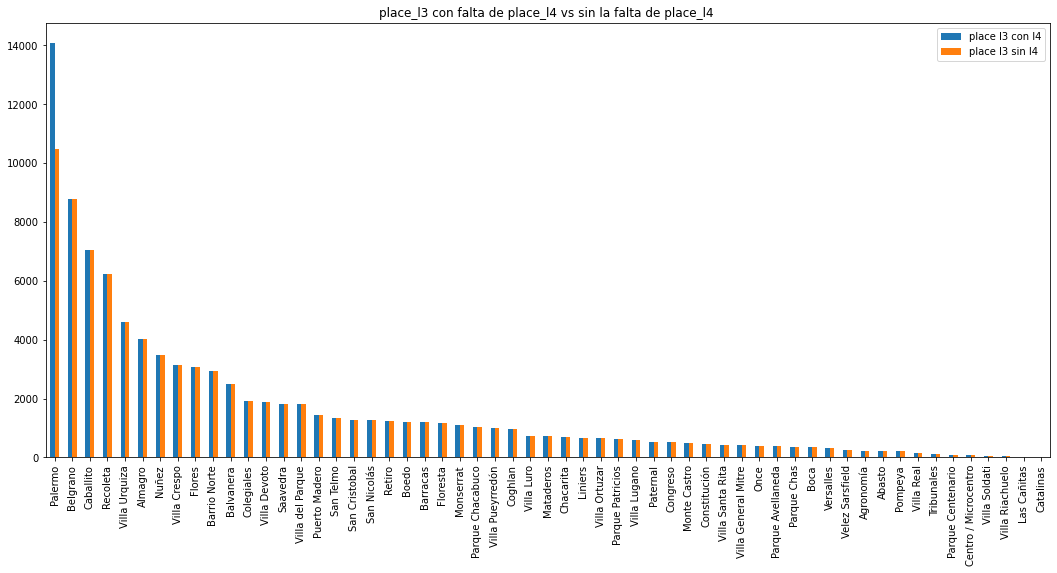

In [79]:
temp = ds_filtrado[ds_filtrado.place_l4.isna()]

plotdata = pd.DataFrame({
    "place l3 con l4":ds_filtrado.place_l3.value_counts(),
    "place l3 sin l4":temp.place_l3.value_counts(),
    }, 
)
plotdata.plot(kind="bar", figsize=(18,8))
plt.title("place_l3 con falta de place_l4 vs sin la falta de place_l4 ")
plt.xlabel = "Place_l3"


Se observa gráficamente que para que se tenga un valor no nan en place_l4, place_l3 tiene que ser Palermo. Dado que vemos que aunque place_l3 sea palermo hay un gran procentaje donde falta place_l4, el hecho de que place_l3 sea Palermo es una condición necesaria pero no suficiente para observar place_l4 no nan.


In [80]:
ds_filtrado[ds_filtrado['place_l4'].notna()].place_l3.value_counts()


Palermo    3583
Name: place_l3, dtype: int64

Verificamos que los unicos registros que cuentan con place_l4 son registros de Palermo. 

Habiendo verificado que todas estan en palermo pordemos tomar la decision de que la columna no nos aporta informacion relevante para el dominio de nuestro problema, por lo tanto la eliminamos en ambos sets. 

In [81]:
para_x_train_x_test_realizar(lambda x: x.drop('place_l4', axis='columns', inplace=True))

##### latitud y longitud

Analizaremos estos dos datos juntos dado que tienen una relación lógica.

Primero analizamos si los registros que tienen nan en latitud son los mismos que tienen nan en longitud (y viceversa)

In [82]:
def mostrar_cant_nans_long_lat(x):
  cond_longitud_nan = x['longitud'].isna()
  cond_latitud_nan = x['latitud'].isna()
  print(f'Cantidad de nan en longitud: {x[cond_longitud_nan].shape[0]} == Cantidad de nan en latitud: {x[cond_latitud_nan].shape[0]}')
  print('Cantidad de registros donde hay nan en ambos casos: ',x[cond_longitud_nan & cond_latitud_nan].shape[0])
para_x_train_x_test_realizar(mostrar_cant_nans_long_lat, "cantidad de nans lat y lang")


realizando cantidad de nans lat y lang sobre x_train:
Cantidad de nan en longitud: 2472 == Cantidad de nan en latitud: 2472
Cantidad de registros donde hay nan en ambos casos:  2472
realizando cantidad de nans lat y lang sobre x_test:
Cantidad de nan en longitud: 1113 == Cantidad de nan en latitud: 1113
Cantidad de registros donde hay nan en ambos casos:  1113


Observamos que, en ambos sets, los registros que tienen alguno de los dos datos faltantes, también tiene su par faltante. Con lo cual, tiene sentido analizarlos juntos. 

Ahora analizaremos si los registros con estos datos faltantes corresponden a un barrio en específico, o si tienen alguna relación con la columna de barrio en general. En este caso no dividimos entre train y test siendo que consideramos que la caracteristica de relacionarse con ambas columnas deberia mostrarse en el data set general, en caso de no mostrarse, es innecesario analizarlo por cada data set en especifico. 

In [83]:
cond_longitud_nan_total = ds_filtrado['longitud'].isna()
cond_latitud_nan_total = ds_filtrado['latitud'].isna()

registros_sin_coord = ds_filtrado[cond_longitud_nan_total & cond_latitud_nan_total]
registros_sin_coord.place_l3.value_counts().head(10)

Palermo          852
Belgrano         621
Recoleta         224
Nuñez            221
Barrio Norte     185
Caballito        167
Almagro          158
Villa Urquiza    150
Flores           112
Villa Crespo     109
Name: place_l3, dtype: int64

Observamos que los datos estan bastante distribuidos con respecto al barrio, no encontramos relacion entre los datos faltantes y algun barrio en especifico. 

Buscamos ahora cuantos registros no tienen ningún valor respecto a la ubicación:

In [84]:
def registros_sin_ubi(x):
  cond_barrio_nan = x['place_l3'].isna()
  cond_longitud_nan = x['longitud'].isna()
  cond_latitud_nan = x['latitud'].isna()

  registros_sin_ubi = x[cond_longitud_nan & cond_latitud_nan & cond_barrio_nan]
  print('Porcentaje de registros sin ninguna referencia sobre la ubicacion: ', registros_sin_ubi.shape[0]*100/x.shape[0])

para_x_train_x_test_realizar(registros_sin_ubi, "porcentajes de registros sin info sobre ubicacion")

realizando porcentajes de registros sin info sobre ubicacion sobre x_train:
Porcentaje de registros sin ninguna referencia sobre la ubicacion:  0.16495544661301761
realizando porcentajes de registros sin info sobre ubicacion sobre x_test:
Porcentaje de registros sin ninguna referencia sobre la ubicacion:  0.17985611510791366


Tendría sentido remover estos registros dado que no hay variables con una relación suficientemente fuerte para poder predecir la ubicación a partir de los otros datos. Ademas consideramos que las proporciones son suficientemente bajas como para tomar la decision de eliminarlos. 

In [85]:
def drop_registros_sin_ubi(x):
  cond_barrio_nan = x['place_l3'].isna()
  cond_longitud_nan = x['longitud'].isna()
  cond_latitud_nan = x['latitud'].isna()

  registros_sin_ubi = x[cond_longitud_nan & cond_latitud_nan & cond_barrio_nan]
  x.drop(registros_sin_ubi.index, inplace=True)

In [86]:
para_x_train_x_test_realizar(drop_registros_sin_ubi)

In [87]:
para_x_train_x_test_realizar(registros_sin_ubi, "porcentajes de registros sin info sobre ubicacion")

realizando porcentajes de registros sin info sobre ubicacion sobre x_train:
Porcentaje de registros sin ninguna referencia sobre la ubicacion:  0.0
realizando porcentajes de registros sin info sobre ubicacion sobre x_test:
Porcentaje de registros sin ninguna referencia sobre la ubicacion:  0.0


A pesar de haber eliminado parte de los datos faltantes de estas variables, continuaremos con el tratamiento de los restantes en la seccion de imputacion.

##### start_date, end_date, created_on

Teniendo en cuenta el objetivo del TP, queremos predecir el valor de la propiedad *hoy en día*, en base a ciertas features como la zona, la superficie, etc que son las de mayor relevancia. Las fechas no nos aportan mucho porque no queremos saber el precio de una propiedad en un determinado año específico.

In [88]:
def drop_dates(x):
  x.drop('start_date', axis='columns', inplace=True)
  x.drop('end_date', axis='columns', inplace=True)
  x.drop('created_on', axis='columns', inplace=True)

para_x_train_x_test_realizar(drop_dates)

#### Imputacion de datos faltantes

#####property_bedrooms


Dado a que la correlacion entre property_bedrooms y property_rooms nos termino resultando bastante alta, buscaremos la cantidad de casos en los que tengamos registros en donde falten ambas variables, ya que no habria forma de obtener ambos datos con precision de una sin la otra debido a su alta correlacion.

In [89]:
def registros_sin_datos_de_rooms(x):

  cond_habitaciones_nan = x['property_bedrooms'].isna()
  cond_ambientes_nan = x['property_rooms'].isna()
  registros_sin_rooms_ni_bedrooms = x[cond_habitaciones_nan & cond_ambientes_nan]
  print('Porcentaje de registros sin datos tanto en rooms como en bedrooms: ', registros_sin_rooms_ni_bedrooms.shape[0]*100/x.shape[0])

para_x_train_x_test_realizar(registros_sin_datos_de_rooms, "porcentaje de registros sin datos de rooms")

realizando porcentaje de registros sin datos de rooms sobre x_train:
Porcentaje de registros sin datos tanto en rooms como en bedrooms:  0.45553513797310025
realizando porcentaje de registros sin datos de rooms sobre x_test:
Porcentaje de registros sin datos tanto en rooms como en bedrooms:  0.44324324324324327


Dado que no hay ninguno de estos casos, proseguimos con lo siguiente.

In [90]:
def drop_registros_sin_datos_de_rooms(x):
  cond_habitaciones_nan = x['property_bedrooms'].isna()
  cond_ambientes_nan = x['property_rooms'].isna()
  registros_sin_rooms_ni_bedrooms = x[cond_habitaciones_nan & cond_ambientes_nan]
  x.drop(registros_sin_rooms_ni_bedrooms.index, inplace=True)

para_x_train_x_test_realizar(drop_registros_sin_datos_de_rooms)

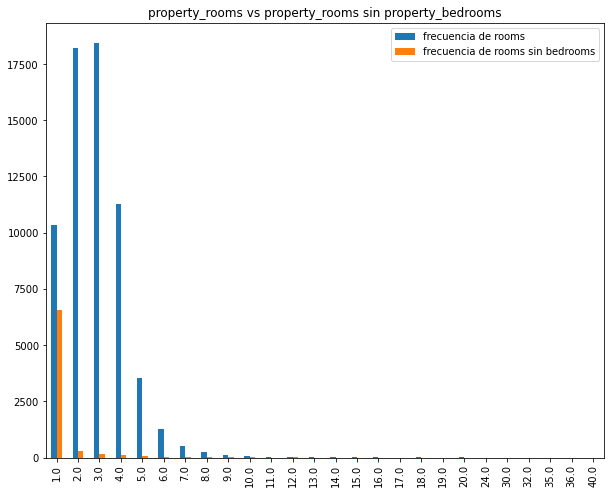

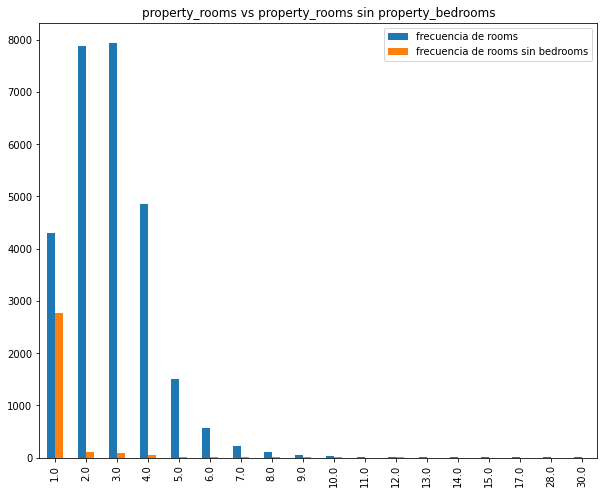

In [91]:
def property_bedrooms_vs_property_rooms(x):
  temp_sin_bedrooms = x[x.property_bedrooms.isna()]

  plotdata = pd.DataFrame({
      "frecuencia de rooms":x.property_rooms.value_counts(),
      "frecuencia de rooms sin bedrooms":temp_sin_bedrooms.property_rooms.value_counts(),
      }, 
  )

  plotdata.plot(kind="bar", figsize=(10,8))
  plt.title("property_rooms vs property_rooms sin property_bedrooms")
  plt.xlabel = "property_rooms"

para_x_train_x_test_realizar(property_bedrooms_vs_property_rooms)

De ambos graficos se puede analizar que, tanto en el set de train como en el de test, en la vasta mayoria de los casos donde falta el dato sobre la cantidad de habitaciones es mayoritariamente en el caso de que se trate de monoambientes.

In [92]:
print('bedrooms en monoambientes de train:\n', x_train[(x_train['property_rooms']==1)].property_bedrooms.value_counts())
print('bedrooms en monoambientes de test:\n',x_test[(x_test['property_rooms']==1)].property_bedrooms.value_counts())

bedrooms en monoambientes de train:
 1.0    3776
Name: property_bedrooms, dtype: int64
bedrooms en monoambientes de test:
 1.0    1535
Name: property_bedrooms, dtype: int64


Dado que tener más de 1 habitación en un monoambiente es incoherente, y que la vasta mayoría de los monoambientes que no tienen dato faltante en propert_bedrooms tienen su valor en 1, reemplazamos lo registros monoambientes faltantes con 1 (asumiendo el supuesto de que las propiedades analizadas son hogares). 

Para los casos donde no son monoambientes, cuando predigamos la cantidad de habitaciones, reemplazaremos los 0's por 1's de igual manera mediante el mismo razonamiento. 

A continuacion se muestra el porcentaje total de nulos en property_bedrooms en ambos sets.

In [93]:
print('Porcentajes de nulos en property_bedrooms en ambos sets:')
print('\tTrain:',x_train['property_bedrooms'].isna().sum()/x_train.shape[0]*100)
print('\tTest:',x_test['property_bedrooms'].isna().sum()/x_test.shape[0]*100)

Porcentajes de nulos en property_bedrooms en ambos sets:
	Train: 11.190742119632663
	Test: 11.007347884316069


Analizamos el porcetaje de monoambientes que hay dentro de los registros en donde falta property_bedrooms.

In [94]:
print('Porcentajes de nulos en property_bedrooms en casos de monoambientes ambos sets:')
print('\tTrain:', x_train[x_train['property_rooms']==1 & x_train['property_bedrooms'].isna()].shape[0]/x_train.shape[0]*100)
print('\tTest:', x_train[x_train['property_rooms']==1 & x_train['property_bedrooms'].isna()].shape[0]/x_train.shape[0]*100)

Porcentajes de nulos en property_bedrooms en casos de monoambientes ambos sets:
	Train: 10.17932489451477
	Test: 10.17932489451477


Observamos que casi la totalidad de faltas en property_bedrooms se da en los casos de monoambientes. Siendo de 11% la proporcion de faltas en property_bedrooms dentro de la totalidad, y de 10% la proporcion de registros, dentro de la totalidad, que son monoambientes con falta de bedrooms. 

Viendo que la mayoria de los faltantes en bedrooms se dan en monoambientes, tomaremos los datos faltantes de bedrooms como un MAR. 

Por lo tanto, para ambos sets, decidimos colocar 1 en los bedroom faltantes de casos de monoambientes, considerando que el ambiente es un cuarto. Mas adelante trataremos los casos de bedrooms faltantes que poseen mas de un ambiente con imputaciones. 

In [95]:
columnas = ['property_rooms','property_bedrooms']

def imputar_bedrooms_en_monoambientes(x):
  cond_monoambiente = x['property_rooms']==1
  cond_bedroom_nan = x['property_bedrooms'].isna()
  x.loc[cond_monoambiente & cond_bedroom_nan, 'property_bedrooms'] = 1

para_x_train_x_test_realizar(imputar_bedrooms_en_monoambientes)

In [96]:
print('Porcentaje de faltantes en bedrooms, depsues de imputar los monoambientes en train: ', x_train[x_train.property_bedrooms.isna()].shape[0]/x_train.shape[0]*100)
print('Porcentaje de faltantes en bedrooms, depsues de imputar los monoambientes en test: ', x_test[x_test.property_bedrooms.isna()].shape[0]/x_test.shape[0]*100)

Porcentaje de faltantes en bedrooms, depsues de imputar los monoambientes en train:  1.0114172251178952
Porcentaje de faltantes en bedrooms, depsues de imputar los monoambientes en test:  0.9990226951894885


Una vez tratados los casos de monoambientes en los sets de entranmiento y testo, procedemos a imputar los valores en los casos de mas ambientes. 

Para los casos donde se tiene mas de un ambiente, podemos aplicar el imputador iterativo. 

In [97]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

def imputar_bedrooms_en_rooms_no_monoambientes(x):
  columnas=['property_surface_total','property_surface_covered','property_bedrooms','property_rooms']
  df_eliminar_nans_en_bedrooms_y_rooms = x[columnas].copy()
  lr = LinearRegression()
  imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=2) #imputation_order='roman'
  array_sin_nans_en_bedrooms_y_rooms = imp.fit_transform(df_eliminar_nans_en_bedrooms_y_rooms)
  ds_sin_nans_en_bedrooms_y = pd.DataFrame(array_sin_nans_en_bedrooms_y_rooms, columns = columnas) #imp.fit_transfor devuelve un arrar sin nans en las columnas
  ds_sin_nans_en_bedrooms_y = ds_sin_nans_en_bedrooms_y.round(0)
  x.loc[:,"property_bedrooms"].replace(to_replace=[x['property_bedrooms']],value=[ds_sin_nans_en_bedrooms_y['property_bedrooms']],inplace=True)
  


In [98]:
def imputar_bedrooms(x):
  x_antes_reemplazo = x.copy()
  imputar_bedrooms_en_rooms_no_monoambientes(x)
  plotdata = pd.DataFrame({
      "frecuencia de bedrooms sin imputacion":x_antes_reemplazo.property_bedrooms.value_counts(),
      "frecuencia de bedrooms con imputacion":x.property_bedrooms.value_counts(),
      }, 
  )


  plotdata.plot(kind="bar", figsize=(18,8))
  mostrar_metadata_grafico("distribución de bedrooms por rooms con nans vs sin nans", xlabel="rooms", ylabel="bedrooms")

  print("Porcentaje de valores nan en property_bedrooms antes de manejar los valores faltantes:", x_antes_reemplazo['property_bedrooms'].isna().sum()/x.shape[0]*100)
  print("Porcentaje de valores nan en property_bedrooms despues de manejar los valores faltantes:", x['property_bedrooms'].isna().sum()/x.shape[0]*100)

realizando imputacion de bedrooms sobre x_train:


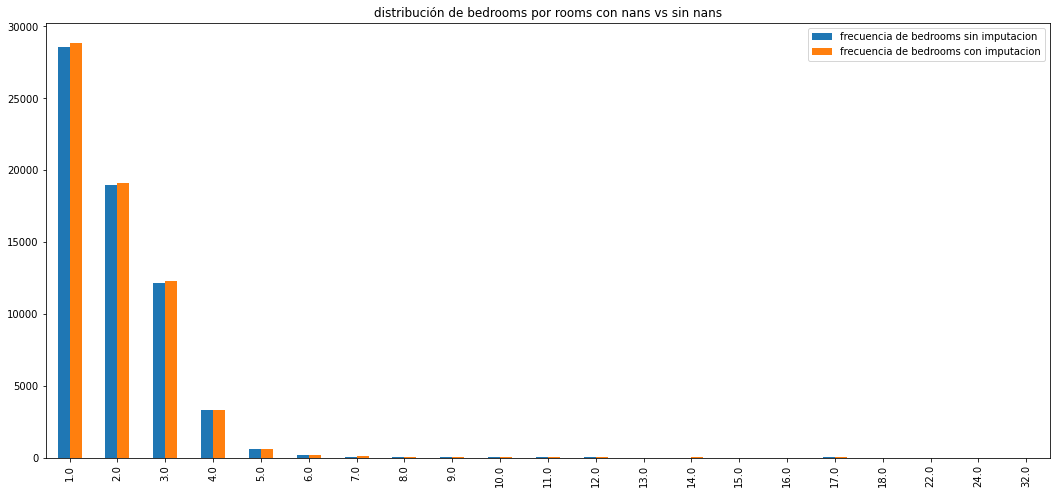

Porcentaje de valores nan en property_bedrooms antes de manejar los valores faltantes: 1.0114172251178952
Porcentaje de valores nan en property_bedrooms despues de manejar los valores faltantes: 0.0
realizando imputacion de bedrooms sobre x_test:


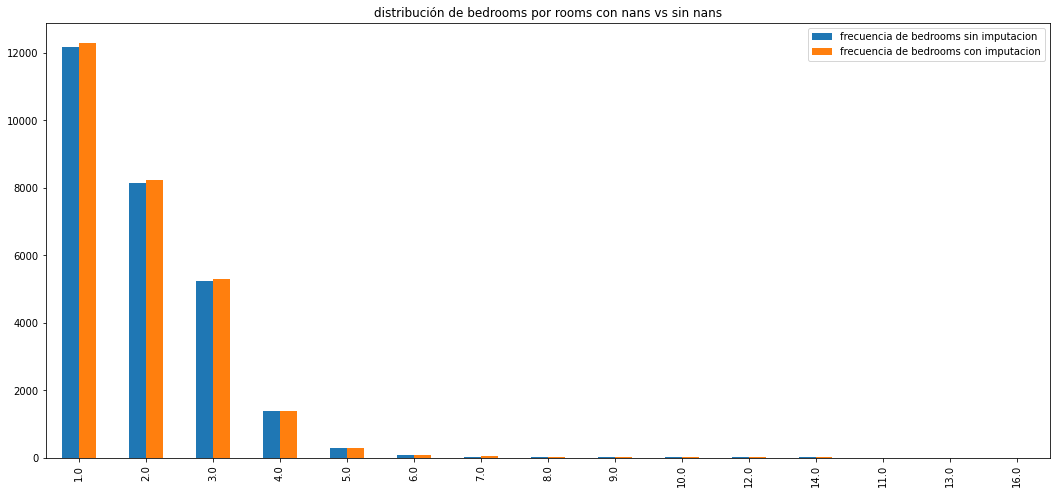

Porcentaje de valores nan en property_bedrooms antes de manejar los valores faltantes: 0.9990226951894885
Porcentaje de valores nan en property_bedrooms despues de manejar los valores faltantes: 0.0


In [99]:
para_x_train_x_test_realizar(imputar_bedrooms, "imputacion de bedrooms")

Como vemos las distribuciones se mantienen, lo cual es un buen indicio de que la imputación fue exitosa al mantener la distribución

##### Latitud y Longitud

Primero identificamos a todos los puntos de latitud o langitud fuera del mapa:


In [100]:
x_train_backup = x_train.copy()

In [101]:
x_train = x_train_backup.copy()

In [102]:
print("límites de caba", all_barrios.bounds)
min_lat = all_barrios.bounds[1]
max_lat = all_barrios.bounds[3]
min_long = all_barrios.bounds[0]
max_long = all_barrios.bounds[2]

def cantidad_puntos_fuera_caba(x):
  cond_not_na = x.latitud.notna() & x.longitud.notna()
  cond_coord_invalida = ~((x['latitud'] < max_lat) & (x['latitud'] > min_lat) & (x['longitud'] < max_long) & (x['longitud'] > min_long))
  x_invalid_coords = x[cond_coord_invalida & cond_not_na]

  print("cantidad de puntos fuera de caba en coordeandas:", len(x_invalid_coords.index))

para_x_train_x_test_realizar(cantidad_puntos_fuera_caba)

límites de caba (-58.531518740591004, -34.70529313515961, -58.335150321796654, -34.52648945161265)
cantidad de puntos fuera de caba en coordeandas: 133
cantidad de puntos fuera de caba en coordeandas: 58


Hay 133, como son muy pocos los removemos del dataset

In [103]:
def drop_invalid_coords(x):
  cond_not_na = x.latitud.notna() & x.longitud.notna()
  cond_coord_invalida = ~((x['latitud'] < max_lat) & (x['latitud'] > min_lat) & (x['longitud'] < max_long) & (x['longitud'] > min_long))
  x.drop(x.loc[(cond_coord_invalida & cond_not_na)].index, inplace=True)


In [104]:
para_x_train_x_test_realizar(drop_invalid_coords)

In [105]:
para_x_train_x_test_realizar(cantidad_puntos_fuera_caba)

cantidad de puntos fuera de caba en coordeandas: 0
cantidad de puntos fuera de caba en coordeandas: 0


Dado que no hay pocos, los removemos del dataset y pasamos a ver cuantos registros sin ninguna información sobre ubicacion hay:



In [106]:
def cantidad_registros_sin_coordenadas(x):
  x_train_invalid_coords = x[x.latitud.isna() & x.longitud.isna()] 
  print(len(x_train_invalid_coords))

para_x_train_x_test_realizar(cantidad_registros_sin_coordenadas)

2326
1045


Dado que es una cantidad considerable, reemplazamos los nans en latitud y longitud por imputación utilizando la media de latitud y longitud de cada barrio

In [107]:
#Con train
def imputar_coordenadas_por_promedio(x):
  for barrio in x.place_l3[x.place_l3.notna()].unique():
    registros_de_barrio = x.query('place_l3 == @barrio')
    latitud_promedio = registros_de_barrio.latitud.mean()
    longitud_promedio = registros_de_barrio.longitud.mean()
    registros_de_barrio_sin_coord = registros_de_barrio[registros_de_barrio.latitud.isna() & registros_de_barrio.longitud.isna()]
    x.loc[registros_de_barrio_sin_coord.index, ['latitud']] = latitud_promedio
    x.loc[registros_de_barrio_sin_coord.index, ['longitud']]  = longitud_promedio


para_x_train_x_test_realizar(imputar_coordenadas_por_promedio)

In [108]:
para_x_train_x_test_realizar(cantidad_registros_sin_coordenadas)

0
0


Como vemos ya reemplazamos todos los na de la latitud y longitud del train

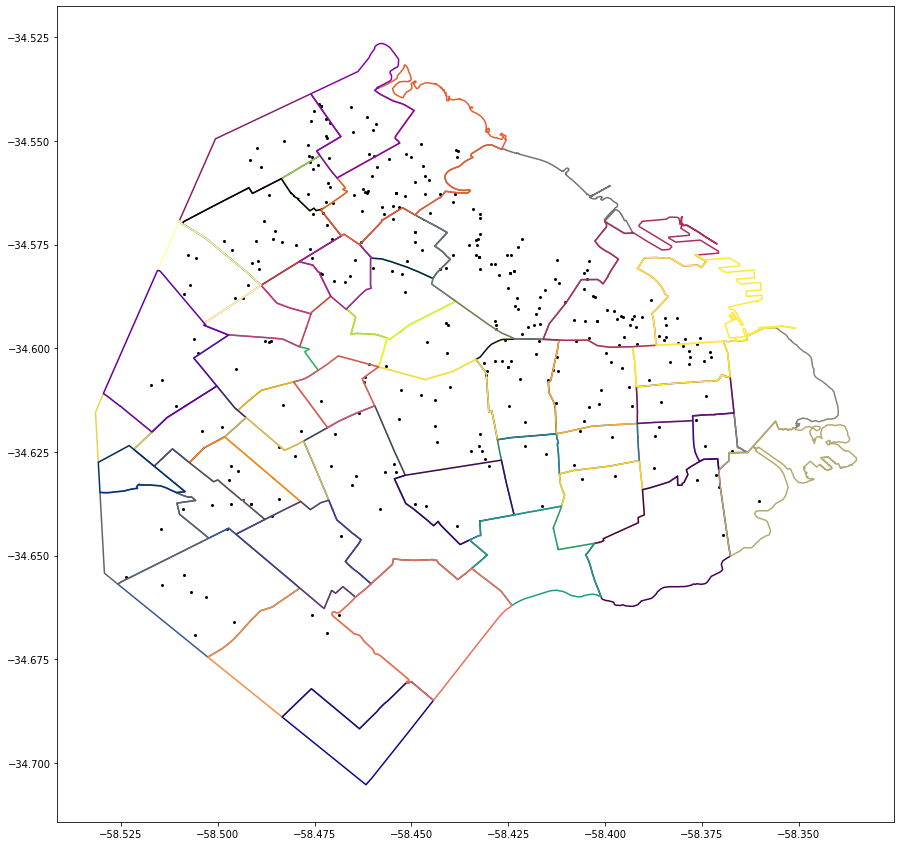

El porcentaje de outsiders dentro de la proporcion pedida de la muestra es: 0.0


In [109]:
graficar_puntos_en_caba(x_train.longitud, x_train.latitud, proporcion=0.005)

#####place_l3

Vemos cuantos place_l3 nans hay

In [110]:
print("Cantidad de registros place_l3 nulos en train:", x_train.place_l3.isna().sum())
print("Cantidad de registros place_l3 nulos en test:", x_test.place_l3.isna().sum())

Cantidad de registros place_l3 nulos en train: 30
Cantidad de registros place_l3 nulos en test: 15


In [111]:
def drop_nan_place_l3(x):
  cond = x.place_l3.isna()
  x.drop(x.loc[cond].index, inplace=True)
  print("Cantidad de registros place_l3 nulos:", x.place_l3.isna().sum())


Como son una cantidad despreciable, los dropeamos


In [112]:
para_x_train_x_test_realizar(drop_nan_place_l3)

Cantidad de registros place_l3 nulos: 0
Cantidad de registros place_l3 nulos: 0


#####property_rooms

In [113]:
print("Porcentaje de valores faltantes de property_rooms en train:",x_train['property_rooms'].isna().sum()*100/x_train.shape[0])
print("Porcentaje de valores faltantes de property_rooms en test:",x_test['property_rooms'].isna().sum()*100/x_test.shape[0])

Porcentaje de valores faltantes de property_rooms en train: 0.5505357614967108
Porcentaje de valores faltantes de property_rooms en test: 0.5988241271684692


Debido a la fuerte correlacion observada en la matriz de correlaciones, entre esta variable con property_bedrooms, decidimos utilizar esa columna para el entrenamiento de un metodo de regresion lineal para llenar los datos nan de property_rooms. 

Como venimos haciendo, el analisis lo replicaremos tanto en el set de entrenamiento como en el de testeo. 



In [114]:
# Guardamos un auxiliar de las dos columnas a tratar
ds_aux_train = x_train[['property_rooms', 'property_bedrooms']].copy()
ds_aux_train = ds_aux_train.query('property_rooms  > 0')

ds_aux_test = x_test[['property_rooms', 'property_bedrooms']].copy()
ds_aux_test = ds_aux_test.query('property_rooms  > 0')

Comenzamos con el entrenamiento de

In [115]:
modelo_lineal_rooms = LinearRegression()

#Doy el formato adecuado a las variables dependiente e independiente
bedrooms=ds_aux_train['property_bedrooms'].values.reshape(-1, 1)
rooms=ds_aux_train['property_rooms'].values.reshape(-1, 1)

#Ajusto el modelo
modelo_lineal_rooms.fit(bedrooms, rooms)

#Coeficientes Estimados
intercepcion=round(modelo_lineal_rooms.intercept_[0],2)
coef_bedroom=round(modelo_lineal_rooms.coef_[0][0],2)

#Muestro el modelo
print(f" El modelo lineal simple ajustado es: rooms = {coef_bedroom} * bedrooms  + {intercepcion}")

 El modelo lineal simple ajustado es: rooms = 1.24 * bedrooms  + 0.47


In [116]:
rooms_estim_segun_bedrooms= coef_bedroom * bedrooms + intercepcion
ds_aux_train['rooms_estimadas_bedrooms']= coef_bedroom * bedrooms + intercepcion #Lo agregamos en el dataframe

Siendo que las variables de room son de tipo entera, debemos redondear los resultados.

In [117]:
ds_aux_train = ds_aux_train.round(0) #los resultados deben ser numeros enteros

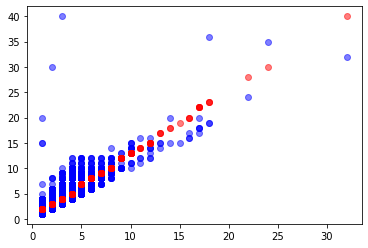

In [118]:
plt.scatter(x_train['property_bedrooms'],x_train['property_rooms'],color='blue',alpha=0.5)
plt.scatter(ds_aux_train['property_bedrooms'],ds_aux_train['rooms_estimadas_bedrooms'], color='red',alpha=0.5)

In [119]:
ds_antes_de_imputar = x_train.copy()

#ahora calculo los valores de las rooms en base a las bedrooms
bedrooms_con_rooms_nan = x_train[x_train['property_rooms'].isna()]['property_bedrooms']
bedrooms_con_rooms_nan = bedrooms_con_rooms_nan.values.reshape(-1, 1)

#print(bedrooms_con_rooms_nan)
rooms_estimadas_segun_bedrooms = modelo_lineal_rooms.predict(bedrooms_con_rooms_nan) #prediccion de valores
rooms_estimadas_segun_bedrooms = rooms_estimadas_segun_bedrooms.round(0)

ds_antes_de_imputar.loc[ds_antes_de_imputar['property_rooms'].isnull(), 'property_rooms'] = rooms_estimadas_segun_bedrooms

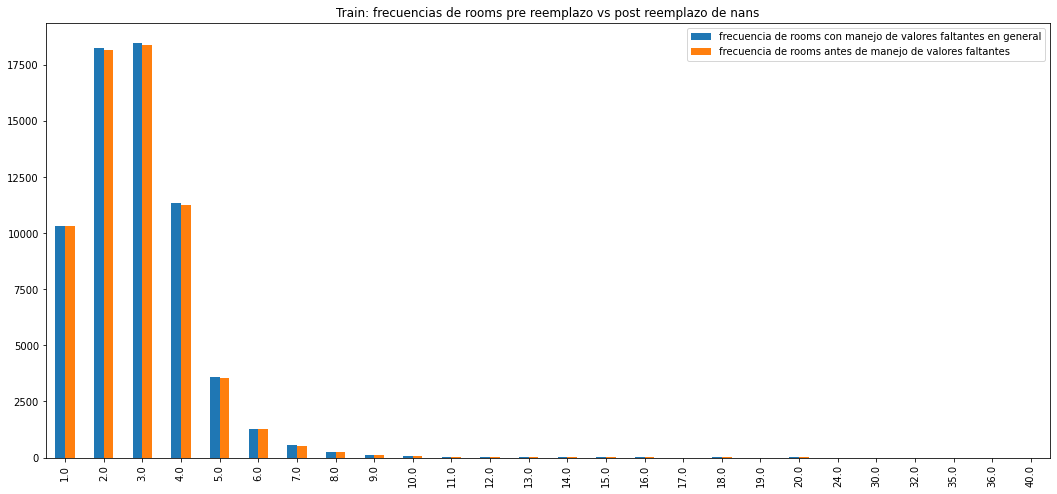

In [120]:
plotdata = pd.DataFrame({
    "frecuencia de rooms con manejo de valores faltantes en general":ds_antes_de_imputar['property_rooms'].value_counts(),
    "frecuencia de rooms antes de manejo de valores faltantes":x_train['property_rooms'].value_counts(),
    }, 
)

plotdata.plot(kind="bar", figsize=(18,8))
plt.title("Train: frecuencias de rooms pre reemplazo vs post reemplazo de nans")
plt.xlabel = "property_rooms"

Vemos como se mantiene la frecuencia relativa antes y despues de imputar. Procedemos a efectivamente llenar los nan dentro del data set de train.

In [121]:
# remplazo de columna property_rooms
x_train.loc[:,"property_rooms"].replace(to_replace=[x_train['property_rooms']],value=[ds_antes_de_imputar['property_rooms']],inplace=True)

Repetimos el proceso con el set de test, utilizando el modelo entrenado con el set de train. 

In [122]:
ds_antes_de_imputar = x_test.copy()

#ahora calculo los valores de las rooms en base a las bedrooms
bedrooms_con_rooms_nan = x_test[x_test['property_rooms'].isna()]['property_bedrooms']
bedrooms_con_rooms_nan = bedrooms_con_rooms_nan.values.reshape(-1, 1)

rooms_estimadas_segun_bedrooms = modelo_lineal_rooms.predict(bedrooms_con_rooms_nan) #prediccion de valores
rooms_estimadas_segun_bedrooms = rooms_estimadas_segun_bedrooms.round(0)

ds_antes_de_imputar.loc[ds_antes_de_imputar['property_rooms'].isnull(), 'property_rooms'] = rooms_estimadas_segun_bedrooms

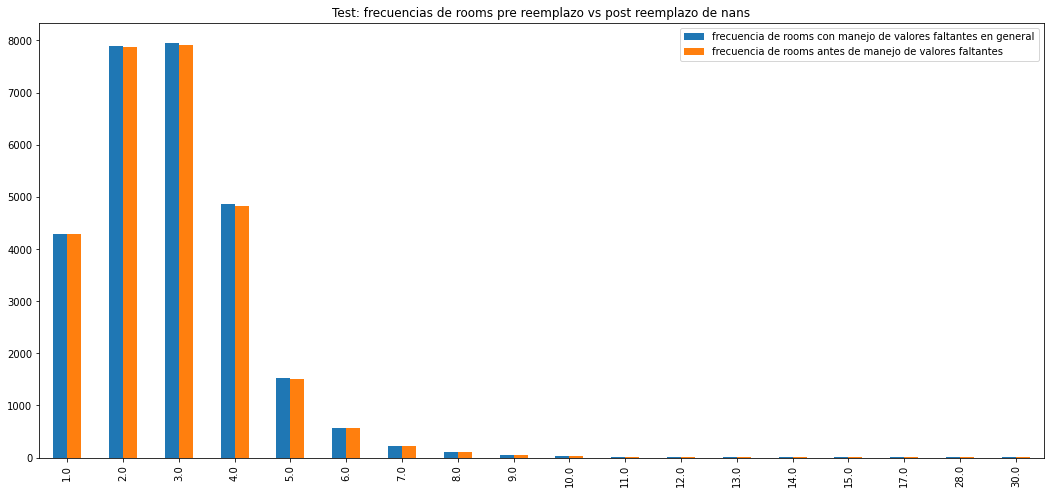

In [123]:
plotdata = pd.DataFrame({
    "frecuencia de rooms con manejo de valores faltantes en general":ds_antes_de_imputar['property_rooms'].value_counts(),
    "frecuencia de rooms antes de manejo de valores faltantes":x_test['property_rooms'].value_counts(),
    }, 
)

plotdata.plot(kind="bar", figsize=(18,8))
plt.title("Test: frecuencias de rooms pre reemplazo vs post reemplazo de nans")
plt.xlabel = "property_rooms"

In [124]:
# remplazo de columna property_rooms
x_test.loc[:,"property_rooms"].replace(to_replace=[x_test['property_rooms']],value=[ds_antes_de_imputar['property_rooms']],inplace=True)

In [125]:
ds_antes_de_imputar['property_rooms'].isna().sum()

0

#####property_surface_total

Dado que property_surface_total y property_surface_covered tienen una alta correlacion, analizamos los casos en los cuales ambas variables tiene valores nan.

In [126]:
cond_superficie_total_nan = ds_filtrado['property_surface_total'].isna()
cond_superfice_cubierta_nan = ds_filtrado['property_surface_covered'].isna()
registros_sin_superficie_cubierta_ni_total = ds_filtrado[cond_superficie_total_nan & cond_superfice_cubierta_nan]
registros_sin_superficie_cubierta_ni_total.shape

(0, 20)

Como ningun registro tiene ambas variables con valor en nan, no eliminamos ningun registro. 

Comenzamos el proceso de imputacion de valores en la columna de surface_total utilizando un modelo de regresion lineal, utilizando los datos de surface_covered.

Comenzamos entrenando el modelo utilizando el set de entrenamiento.

In [127]:
x_train.property_surface_total.isna().sum()/x_train.shape[0]*100

5.0496881852537285

In [128]:
x_test.property_surface_total.isna().sum()/x_test.shape[0]*100

4.826885388691298

In [129]:
x_test[x_test['property_surface_total'] < x_test['property_surface_covered']].shape 

(0, 14)

In [130]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

columnas=['property_surface_total','property_surface_covered','property_rooms']
df_eliminar_nans_en_sup_total_y_cubierta = x_train[columnas].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=2) #imputation_order='roman'
array_sin_nans_en_sup_total_y_cubierta = imp.fit_transform(df_eliminar_nans_en_sup_total_y_cubierta)

In [131]:
ds_sin_nans_en_sup_total_y_cubierta = pd.DataFrame(array_sin_nans_en_sup_total_y_cubierta, columns = columnas) #imp.fit_transfor devuelve un arrar sin nans en las columnas

Decidimos acotar los valores de los registros property_surface_total dado que observamos que con valores mayores a 250 la cantidad de regitros era minima y no se apreciaba completamente el grafico.  

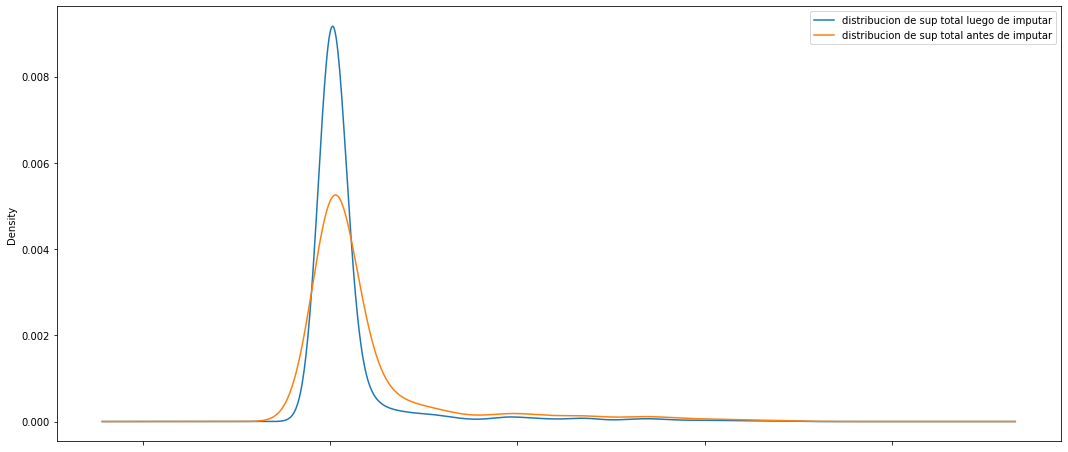

In [132]:
#acotamos los valores para poder visualizar mejor el grafico
ds_sin_nans_acotado = ds_sin_nans_en_sup_total_y_cubierta.query('property_surface_total < 250')
x_train_acotado = x_train.query('property_surface_total < 250')

plotdata = pd.DataFrame({
   "distribucion de sup total luego de imputar":ds_sin_nans_en_sup_total_y_cubierta.property_surface_total.value_counts(),
   "distribucion de sup total antes de imputar":x_train.property_surface_total.value_counts(),
    }, 
)

plot_ = plotdata.plot(kind="kde",  figsize=(18,8))

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


In [133]:
print("Porcentaje de valores nan en property_surface_total antes de manejar los valores faltantes:", x_train['property_surface_total'].isna().sum()/x_train.shape[0]*100)

x_train.loc[:,"property_surface_total"].replace(to_replace=[x_train['property_surface_total']],value=[ds_sin_nans_en_sup_total_y_cubierta['property_surface_total']],inplace=True)

print("Porcentaje de valores nan en property_surface_total despues de manejar los valores faltantes:", x_train['property_surface_total'].isna().sum()/x_train.shape[0]*100)

Porcentaje de valores nan en property_surface_total antes de manejar los valores faltantes: 5.0496881852537285
Porcentaje de valores nan en property_surface_total despues de manejar los valores faltantes: 0.0


Realizaremos el mismo procedimiento para el set de testeo. Predeciremos utilizando el modelo entrenado con el set de training.

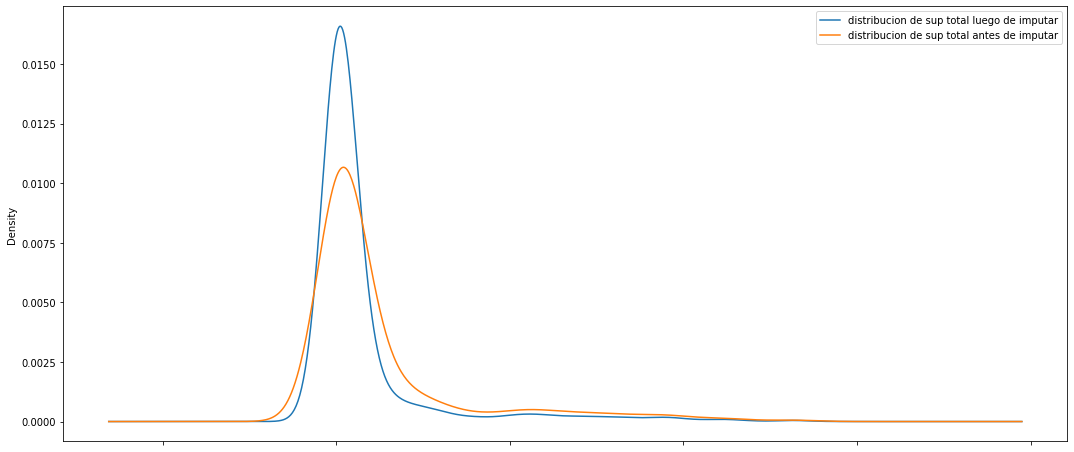

In [134]:
columnas=['property_surface_total','property_surface_covered','property_rooms']
df_eliminar_nans_en_sup_total_y_cubierta_test = x_test[columnas].copy()


array_sin_nans_en_sup_total_y_cubierta_test = imp.transform(df_eliminar_nans_en_sup_total_y_cubierta_test)
ds_sin_nans_en_sup_total_y_cubierta_test = pd.DataFrame(array_sin_nans_en_sup_total_y_cubierta_test, columns = columnas) 


#acotamos los valores para poder visualizar mejor el grafico
x_test_acotado = x_test.query('property_surface_total < 250')

plotdata = pd.DataFrame({
   "distribucion de sup total luego de imputar":ds_sin_nans_en_sup_total_y_cubierta_test.property_surface_total.value_counts(),
   "distribucion de sup total antes de imputar":x_test.property_surface_total.value_counts(),
    }, 
)

plot_ = plotdata.plot(kind="kde",  figsize=(18,8))

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


In [135]:
print("Test: Porcentaje de valores nan en property_surface_total antes de manejar los valores faltantes:", x_test['property_surface_total'].isna().sum()/x_test.shape[0]*100)

x_test.loc[:,"property_surface_total"].replace(to_replace=[x_test['property_surface_total']],value=[ds_sin_nans_en_sup_total_y_cubierta_test['property_surface_total']],inplace=True)

print("Test: Porcentaje de valores nan en property_surface_total despues de manejar los valores faltantes:", x_test['property_surface_total'].isna().sum()/x_test.shape[0]*100)

Test: Porcentaje de valores nan en property_surface_total antes de manejar los valores faltantes: 4.826885388691298
Test: Porcentaje de valores nan en property_surface_total despues de manejar los valores faltantes: 0.0


#####property_surface_covered

Como property_surface_covered esta fuertemente correlacionado con property_surface_total utilizamos los mismos datos obtenidos en el manejo de valores faltantes de property_surface_total para imputar los datos faltantes de porperty_surface_covered. Para ello utilizamos el dataset generado anteriormente en la seccion property_surface_total.

Comenzamos con la imputacion de la superficie cubierta en train

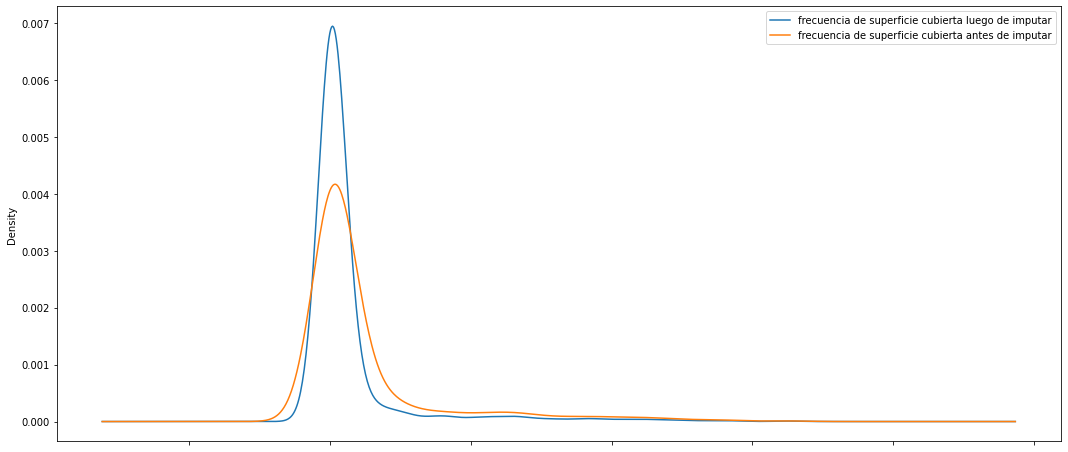

In [136]:
plotdata = pd.DataFrame({
   "frecuencia de superficie cubierta luego de imputar":ds_sin_nans_en_sup_total_y_cubierta.property_surface_covered.value_counts(),
   "frecuencia de superficie cubierta antes de imputar":x_train.property_surface_covered.value_counts(),
    }, 
)

plot_ = plotdata.plot(kind="kde",  figsize=(18,8))

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


In [137]:
print("Porcentaje de valores nan en property_surface_covered antes de manejar los valores faltantes:", x_train['property_surface_covered'].isna().sum()/x_train.shape[0]*100)

x_train.loc[:,"property_surface_covered"].replace(to_replace=[x_train['property_surface_covered']],value=[ds_sin_nans_en_sup_total_y_cubierta['property_surface_covered']],inplace=True)

print("Porcentaje de valores nan en property_surface_covered despues de manejar los valores faltantes:", x_train['property_surface_covered'].isna().sum()/x_train.shape[0]*100)

Porcentaje de valores nan en property_surface_covered antes de manejar los valores faltantes: 3.5831480070294393
Porcentaje de valores nan en property_surface_covered despues de manejar los valores faltantes: 0.0


Realizamos lo mismo con el set de test. 

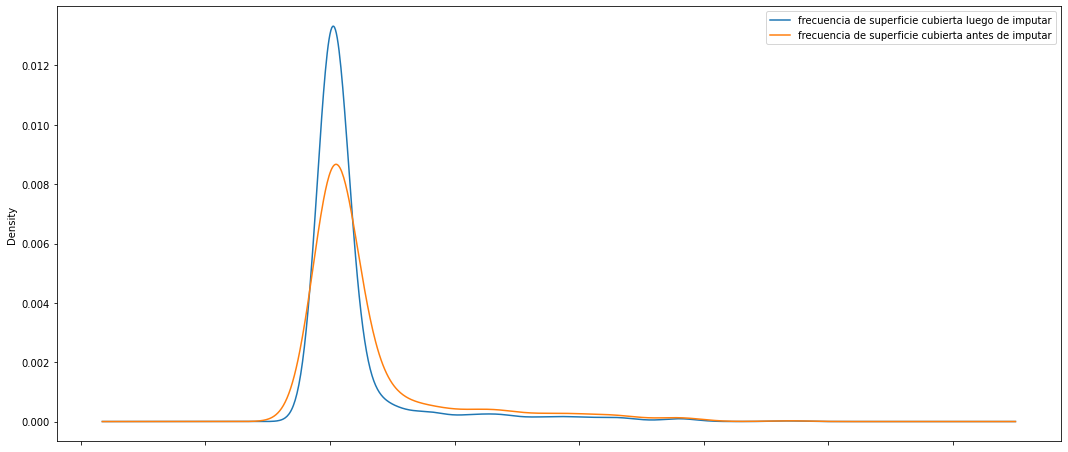

In [138]:
plotdata = pd.DataFrame({
   "frecuencia de superficie cubierta luego de imputar":ds_sin_nans_en_sup_total_y_cubierta_test.property_surface_covered.value_counts(),
   "frecuencia de superficie cubierta antes de imputar":x_test.property_surface_covered.value_counts(),
    }, 
)

plot_ = plotdata.plot(kind="kde",  figsize=(18,8))

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


In [139]:
df_eliminar_nans_en_sup_covered = x_test[columnas].copy()

array_sin_nans_en_sup_covered_test = imp.transform(df_eliminar_nans_en_sup_covered)

ds_sin_nans_en_sup_covered_test = pd.DataFrame(array_sin_nans_en_sup_covered_test, columns = columnas) #imp.fit_transfor devuelve un arrar sin nans en las columnas
ds_sin_nans_en_sup_covered_test = ds_sin_nans_en_sup_covered_test.round(0)

In [140]:
print("Porcentaje de valores nan en property_surface_covered antes de manejar los valores faltantes:", x_test['property_surface_covered'].isna().sum()/x_test.shape[0]*100)

x_test.loc[:,"property_surface_covered"].replace(to_replace=[x_test['property_surface_covered']],value=[ds_sin_nans_en_sup_covered_test['property_surface_covered']],inplace=True)

print("Porcentaje de valores nan en property_surface_covered despues de manejar los valores faltantes:", x_test['property_surface_covered'].isna().sum()/x_test.shape[0]*100)

Porcentaje de valores nan en property_surface_covered antes de manejar los valores faltantes: 3.4550337519053493
Porcentaje de valores nan en property_surface_covered despues de manejar los valores faltantes: 0.0


In [141]:
reg_menos_sup_covered_que_total_train = x_train[x_train['property_surface_total'] < x_train['property_surface_covered']]
reg_menos_sup_covered_que_total_train.shape

(462, 14)

In [142]:
reg_menos_sup_covered_que_total_test = x_test[x_test['property_surface_total'] < x_test['property_surface_covered']]
reg_menos_sup_covered_que_total_test.shape

(179, 14)

Luego de realizar las imputaciones correspondientes, observamos que obtuvimos un pequeño grupo, de los datos que antes eran nans, que terminaron con un valor invalido.
Por este motivo decimos eliminarlos de ambos conjuntos train y test. 

In [143]:
x_train.drop(reg_menos_sup_covered_que_total_train.index, inplace=True)
x_test.drop(reg_menos_sup_covered_que_total_test.index, inplace=True)

##Valores Atípicos
---


### Análisis univariados


In [144]:
def mostrar_atipicos_univariados(columna):
  sns.boxplot(y=columna)
  #Cuartiles
  Q1_altura=np.quantile(columna, 0.25)
  Q3_altura=np.quantile(columna, 0.75)

  #Rango intercuartil
  IQR_altura=Q3_altura-Q1_altura

  #calculo outliers moderados:
  out_inf=Q1_altura-1.5*IQR_altura
  out_sup=Q3_altura+1.5*IQR_altura

  print("limite moderado inferior:", out_inf)
  print("limite moderado superior:", out_sup)


  print("outliers por debajo de limite moderado", columna[(columna < out_inf)].size)
  print("outliers por arriba de limite moderado", columna[(columna > out_sup)].size)


  #Limite inferior Outliers
  out_inf=Q1_altura-3*IQR_altura
  out_sup=Q3_altura+3*IQR_altura

  print("limite severo inferior:", out_inf)
  print("limite severo superior:", out_sup)

  print("outliers por debajo de limite severo", columna[(columna < out_inf)].size)
  print("outliers por arriba de limite severo", columna[(columna > out_sup)].size)

  


####property_price

limite moderado inferior: -115000.0
limite moderado superior: 445000.0
outliers por debajo de limite moderado 0
outliers por arriba de limite moderado 5750
limite severo inferior: -325000.0
limite severo superior: 655000.0
outliers por debajo de limite severo 0
outliers por arriba de limite severo 2861


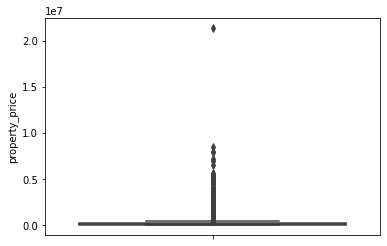

In [145]:
mostrar_atipicos_univariados(x_train.property_price)

Estos resultados tienen sentido dado que no vemos ningún precio por debajo de 0, mientras que podemos observar precios de hogares que se son mucho mas altos que los límites brindados por el método IRQ.

####property_surface_total

limite moderado inferior: -46.5
limite moderado superior: 197.5
outliers por debajo de limite moderado 0
outliers por arriba de limite moderado 5186
limite severo inferior: -138.0
limite severo superior: 289.0
outliers por debajo de limite severo 0
outliers por arriba de limite severo 2237


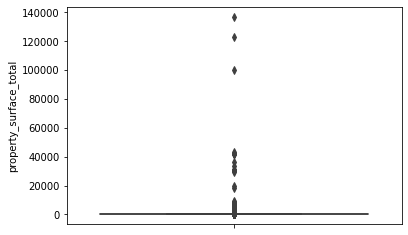

In [146]:
mostrar_atipicos_univariados(x_train.property_surface_total)

Estos resultados tienen sentido dado que no vemos ninguna medida de superficie por debajo de 0, mientras que podemos observar superficies que son mucho mas altos que los límites brindados por el método IRQ.

####property_surface_covered

limite moderado inferior: -32.0
limite moderado superior: 160.0
outliers por debajo de limite moderado 0
outliers por arriba de limite moderado 5131
limite severo inferior: -104.0
limite severo superior: 232.0
outliers por debajo de limite severo 0
outliers por arriba de limite severo 2298


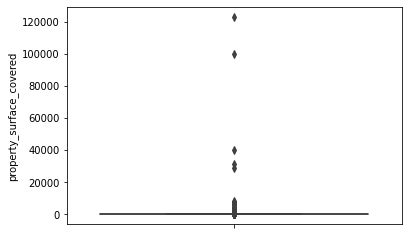

In [147]:
mostrar_atipicos_univariados(x_train.property_surface_covered)

Estos resultados tienen sentido dado que no vemos ninguna medida de superficie cubierta por debajo de 0, mientras que podemos observar superficies que son mucho mas altos que los límites brindados por el método IRQ.


####property_bedrooms

limite moderado inferior: -2.0
limite moderado superior: 6.0
outliers por debajo de limite moderado 0
outliers por arriba de limite moderado 183
limite severo inferior: -5.0
limite severo superior: 9.0
outliers por debajo de limite severo 0
outliers por arriba de limite severo 56


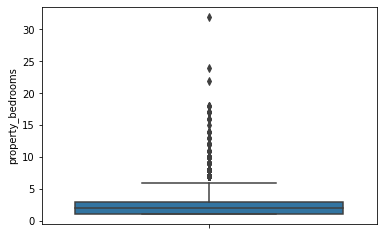

In [148]:
mostrar_atipicos_univariados(x_train.property_bedrooms)

Estos resultados tienen sentido ya que no hay propiedades con cantidad de habitaciones negativas, a su vez teniendo en cuenta que analizamos unicamente las propiedades que residen en Capital Federal es de esperarse que una propiedad tenga una cantidad de habitaciones menor a 6.

####property_rooms

limite moderado inferior: -1.0
limite moderado superior: 7.0
outliers por debajo de limite moderado 0
outliers por arriba de limite moderado 539
limite severo inferior: -4.0
limite severo superior: 10.0
outliers por debajo de limite severo 0
outliers por arriba de limite severo 106


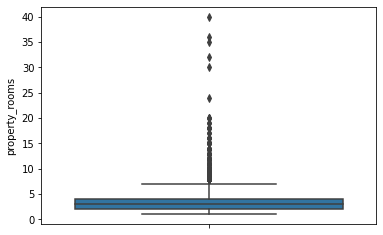

In [149]:
mostrar_atipicos_univariados(x_train.property_rooms)

Estos resultados tienen sentido ya que no hay propiedades con cantidad de ambientes negativas, a su vez teniendo en cuenta que analizamos unicamente las propiedades que residen en Capital Federal es de esperarse que una propiedad tenga una cantidad de ambientes menor a 7, ya que como analizamos anteriormente la cantidad de departamentos es superior a la cantidad de casas y ph's.

Como conclusion, en la mayoría de los datos tenemos un rango bastante acotado de valores comunes, y los outliers se alejan en gran medida de ese rango acotado. Por eso es que en los gráficos de boxplot, con suerte se llega a ver el rango común.

### Análisis bivariados


In [150]:
from sklearn.utils.fixes import scipy
def mostrar_atipicos_bivariados(columna_a, columna_b):
  sns.scatterplot(x=columna_a, y=columna_b)

# el umbral es a mano, viendo lo que mas sentido tenga
def analisis_mahalanobis(dataframe, columnas, umbral, cantGraficos = 2):

  X = dataframe[columnas]
  sample_X = X.sample(frac=0.1, random_state=2)

  mu = sample_X.mean()
  X_diff = X - mu
  X_diff = X_diff.values.T

  cov = np.cov(sample_X.values.T)
  inv_cov = np.linalg.inv(cov)
  W = scipy.linalg.sqrtm(inv_cov)

  Wx = np.matmul(W, X_diff)

  mahal_dists = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])
 
  ds_mahal = dataframe[columnas].copy()
  ds_mahal['mahalanobis'] = mahal_dists

  np.sort(ds_mahal)

  ds_mahal['es_outlier'] = ds_mahal['mahalanobis']>umbral

  if(cantGraficos > 1):
    ds_temp = ds_mahal.copy()
    distancia_menor_a_10 = ds_temp['mahalanobis'] < 15
    ds_temp = ds_temp[distancia_menor_a_10]
    print(ds_temp['es_outlier'].value_counts())
    mostrar_distribuciones_cuantitativas("mahalanobis", ds=ds_temp, figsize=(8, 8), bins=30, espaciado=2)
    if len(columnas) == 2:
      plt.figure(figsize=(8, 8), dpi=80)
      sns.scatterplot(x=ds_mahal[columnas[0]], y=ds_mahal[columnas[1]], hue=ds_mahal['es_outlier'])
      mostrar_metadata_grafico(f'Dispersograma {columnas[0]} vs {columnas[1]}')
  else:
    plt.figure(figsize=(8, 8), dpi=80)
    sns.scatterplot(x=ds_mahal[columnas[0]], y=ds_mahal[columnas[1]], hue=ds_mahal['es_outlier'])
    mostrar_metadata_grafico(f'Dispersograma {columnas[0]} vs {columnas[1]}')

#### property_rooms vs property_bedrooms

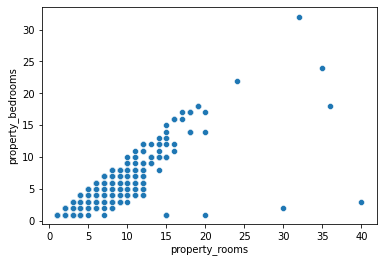

In [151]:
mostrar_atipicos_bivariados(x_train.property_rooms, x_train.property_bedrooms)

False    61737
True      1335
Name: es_outlier, dtype: int64


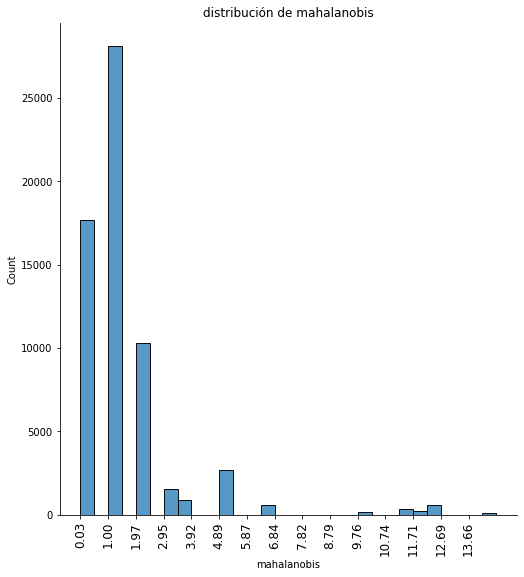

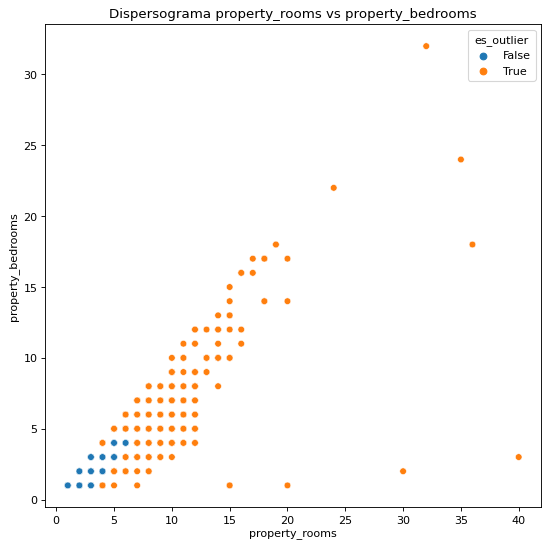

In [152]:
analisis_mahalanobis(x_train,['property_rooms', 'property_bedrooms'], 7)

Como podemos observar del grafico de distribución de distancias mahalanobis, vemos que un umbral razonable es 7, dado que a partir de ahí las distancias grandes son anomalías. 
También podemos observar que de aproximadamente 64000 registros totales en el conjunto de training, 1472 salieron como outliers, lo cual es bastante razonable. En el gráfico no parece que sean pocos, pero esto es debido a que la mayoría de los no outliers, se concentran en la esquina inferior izquierda, llevando el valor medio a esa área.

En este caso, proponemos eliminar aquellos outliers que cuentan con una amplia cantidad de ambientes y cuya cantidad de cuartos no es acorde lógicamente a ese número. 
Visualizando el scatterplot, tomamos como umbral de property_bedrooms <= cte * property_rooms siendo cte = 8/17 

Proponemos eliminar aquellos outliers para los modelos de train y de test, comenzando por el train.

In [153]:
cond_menos_bedrooms_que_rooms = x_train['property_bedrooms'] <= 8/12*(x_train['property_rooms']) - 10/3

reg_menos_bed_que_rooms = x_train[cond_menos_bedrooms_que_rooms]
reg_menos_bed_que_rooms.shape

x_train.drop(reg_menos_bed_que_rooms.index, inplace=True)

In [154]:
cond_menos_bedrooms_que_rooms = x_test['property_bedrooms'] <= 8/12*(x_test['property_rooms']) - 10/3

reg_menos_bed_que_rooms = x_test[cond_menos_bedrooms_que_rooms]
reg_menos_bed_que_rooms.shape

x_test.drop(reg_menos_bed_que_rooms.index, inplace=True)

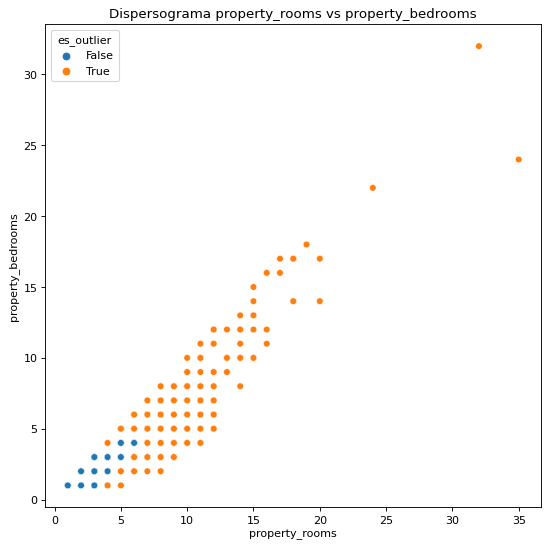

In [155]:
analisis_mahalanobis(x_train,['property_rooms', 'property_bedrooms'], 7, 1)

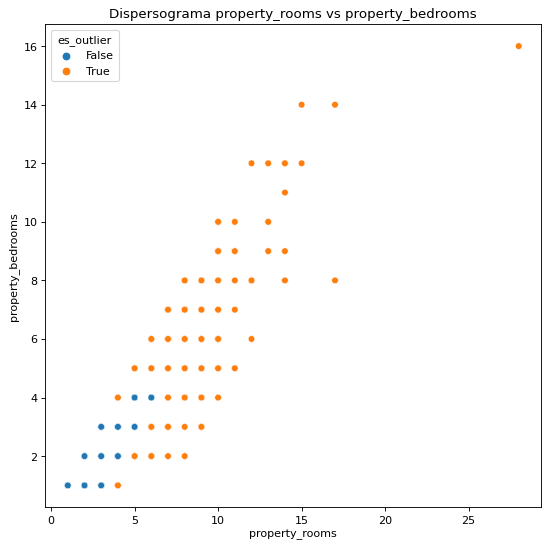

In [156]:
analisis_mahalanobis(x_test,['property_rooms', 'property_bedrooms'], 7, 1)

####property_surface_total vs property_surface_covered


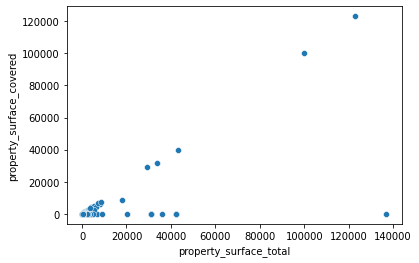

In [157]:
mostrar_atipicos_bivariados(x_train.property_surface_total, x_train.property_surface_covered)

False    61648
True      1999
Name: es_outlier, dtype: int64


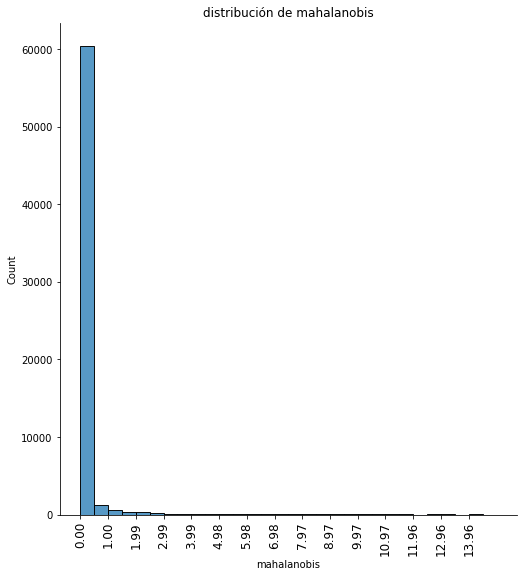

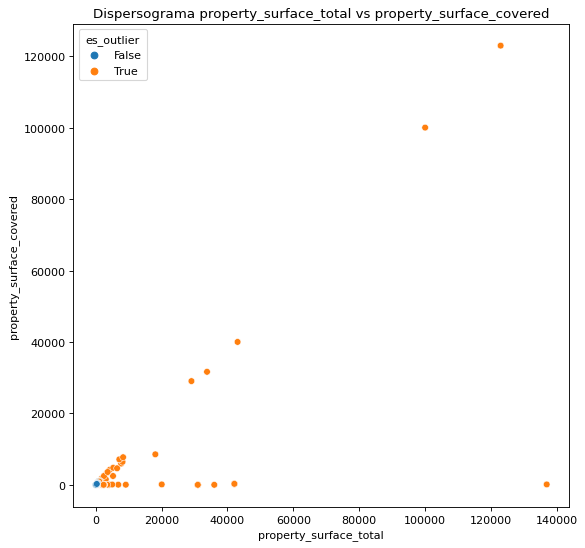

In [158]:
analisis_mahalanobis(x_train,['property_surface_total', 'property_surface_covered'], 1)

En este caso, vemos del grafico de distribución de distancias mahalanobis, que un umbral razonable seria 1, dado que a partir de ahí las distancias grandes comienzan a ser anomalías. 

<font color=red>Como analisis logico nos parece razonable destacar el hecho de que es muy poco probable tener Casa, PH o Departamentos que cuenten con mas de 2000 m2 en superficies cubiertas o totales en Capital Federal. Decidimos analizar cuantos casos tienen estas caracteristicas.


In [159]:
cant = x_train[(x_train['property_surface_covered'] > 500) | (x_train['property_surface_total'] > 500)].shape[0]
total = x_train.shape[0]
cant*100/total


0.6501746854877877

In [160]:
cant = x_test[(x_test['property_surface_covered'] > 500) | (x_test['property_surface_total'] > 500)].shape[0]
total = x_test.shape[0]
cant*100/total

0.6064591553412246

Vemos que la proporcion de datos con esas caracteristicas es muy poca a comparacion con la totalidad de los registros. Decidimos eliminar los datos al considerarlos logicamente invalidos. 

In [161]:
cond_surface_total = x_train['property_surface_total'] > 500
cond_surface_covered = x_train['property_surface_covered'] > 500

reg_combinacion = x_train[cond_surface_total | cond_surface_covered]
reg_combinacion.shape

x_train.drop(reg_combinacion.index, inplace=True)

In [162]:
cond_surface_total = x_test['property_surface_total'] > 500
cond_surface_covered = x_test['property_surface_covered'] > 500

reg_combinacion = x_test[cond_surface_total | cond_surface_covered]
reg_combinacion.shape

x_test.drop(reg_combinacion.index, inplace=True)

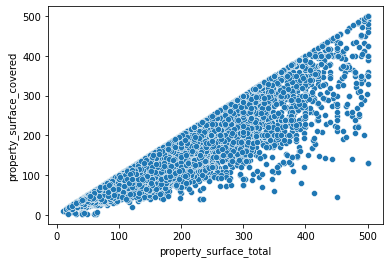

In [163]:
mostrar_atipicos_bivariados(x_train.property_surface_total, x_train.property_surface_covered)

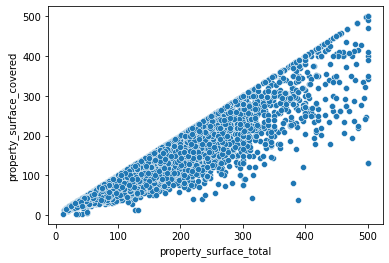

In [164]:
mostrar_atipicos_bivariados(x_test.property_surface_total, x_test.property_surface_covered)

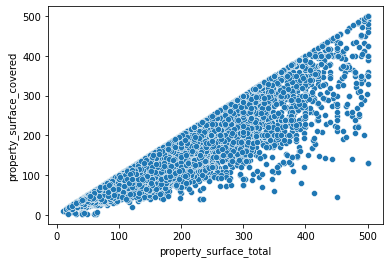

In [165]:
cond_mucho_total_poco_covered = x_train['property_surface_covered'] <= 13/15*(x_train['property_surface_total']) -2860/3

reg_mucho_total_poco_covered = x_train[cond_mucho_total_poco_covered]
reg_mucho_total_poco_covered.shape

ds_aux = x_train.drop(reg_mucho_total_poco_covered.index, inplace=False)
mostrar_atipicos_bivariados(ds_aux.property_surface_total, ds_aux.property_surface_covered)

False    60636
True      1017
Name: es_outlier, dtype: int64


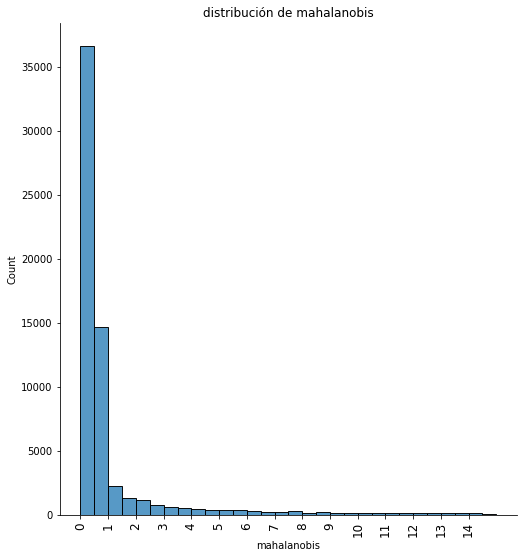

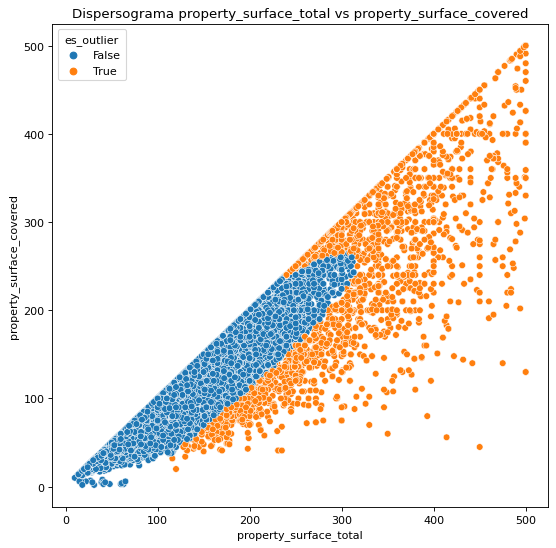

In [166]:
analisis_mahalanobis(x_train,['property_surface_total', 'property_surface_covered'], 9.9)

False    26048
True       426
Name: es_outlier, dtype: int64


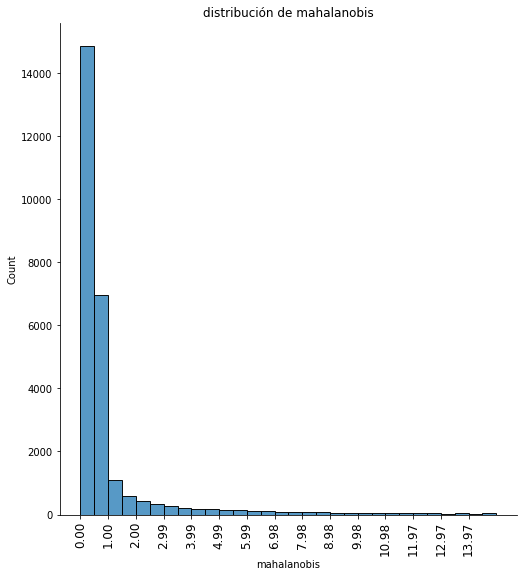

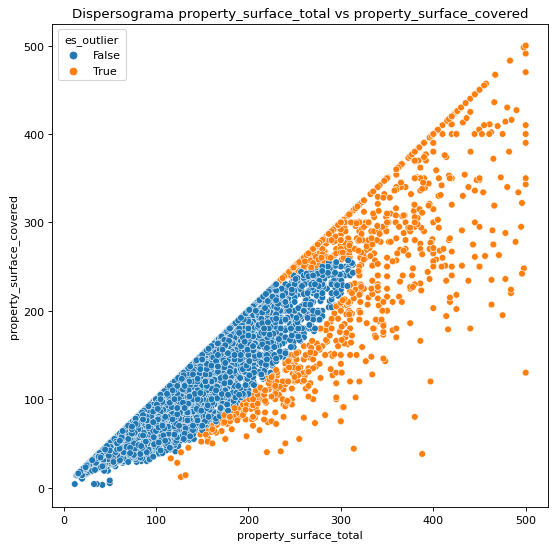

In [167]:
analisis_mahalanobis(x_test,['property_surface_total', 'property_surface_covered'], 9.9)

#### property_surface_covered vs property_rooms

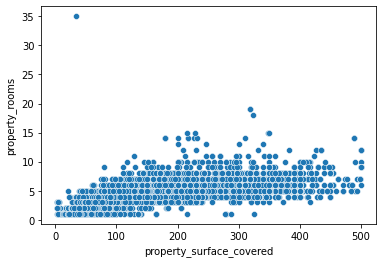

In [168]:
mostrar_atipicos_bivariados(x_train.property_surface_covered, x_train.property_rooms)

False    60911
True      1318
Name: es_outlier, dtype: int64


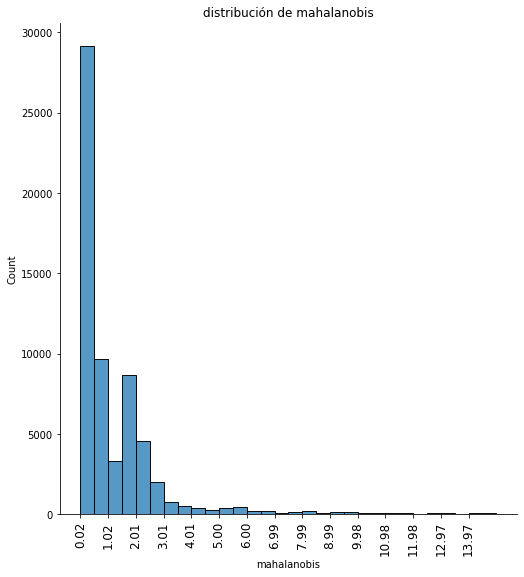

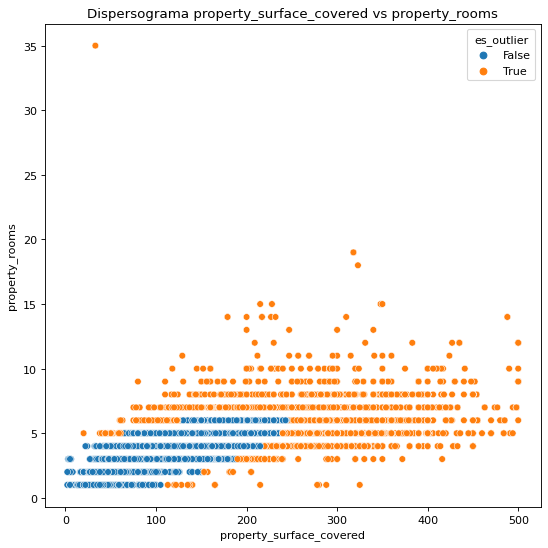

In [169]:
analisis_mahalanobis(x_train, ['property_surface_covered', 'property_rooms'], 7.9)

En este caso, vemos del grafico de distribución de distancias mahalanobis, que un umbral razonable seria 7.9, dado que a partir de ahí las distancias grandes son anomalías. También podemos observar que solo 1204 del conjunto de registros totales de training casos salieron como outliers, del total de los datos, lo cual es bastante razonable, siendo esta una proporcion baja. 

En el gráfico no parece que sean pocos, pero esto es debido a que la mayoría de los no outliers, se concentran en la esquina inferior izquierda, llevando el valor medio a esa área.

A continuacion, se realizaran las imputaciones para el modelo de train y el de test:

In [170]:
cond_property_rooms = x_train['property_rooms'] > 13
cond_surface_covered = x_train['property_surface_covered'] > 650

reg_combinacion = x_train[cond_property_rooms | cond_surface_covered]
reg_combinacion.shape

x_train.drop(reg_combinacion.index, inplace=True)

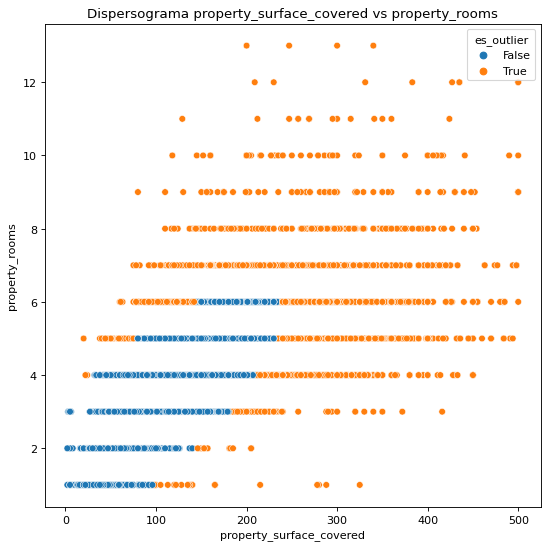

In [171]:
analisis_mahalanobis(x_train, ['property_surface_covered', 'property_rooms'], 7, 1)

En este caso, vimos conveniente eliminar aquellos registros que tienen valores de property_rooms y property_surface_covered poco probables. Por ejemplo, tener 700 m^2 contra 10 cuartos. 

In [172]:
cond_property_rooms = x_test['property_rooms'] > 13
cond_surface_covered = x_test['property_surface_covered'] > 650

reg_combinacion = x_test[cond_property_rooms | cond_surface_covered]
reg_combinacion.shape

x_test.drop(reg_combinacion.index, inplace=True)

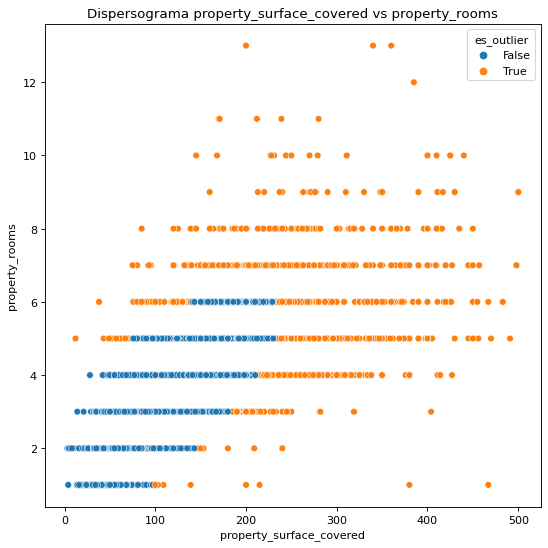

In [173]:
analisis_mahalanobis(x_test, ['property_surface_covered', 'property_rooms'], 7, 1)

####property_price vs property_surface_total

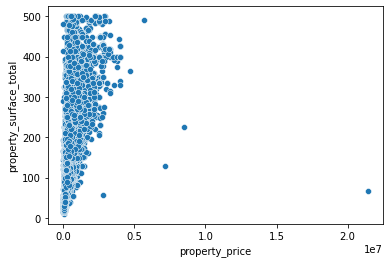

In [174]:
mostrar_atipicos_bivariados(x_train.property_price, x_train.property_surface_total)

False    59663
True      2026
Name: es_outlier, dtype: int64


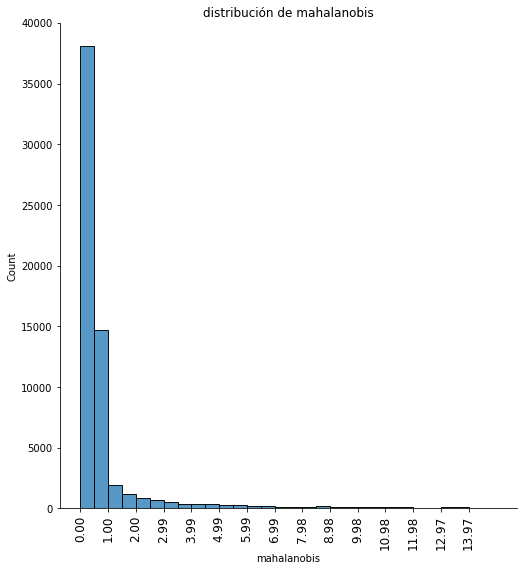

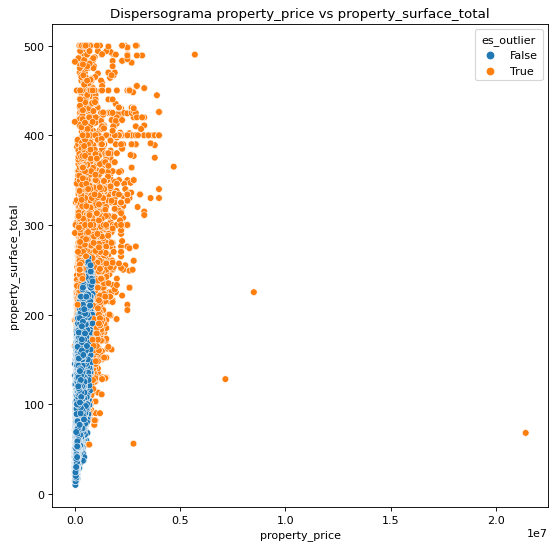

In [175]:
analisis_mahalanobis(x_train, ['property_price', 'property_surface_total'], 6)

En este caso, vemos del grafico de distribución de distancias mahalanobis, que un umbral razonable seria 6, dado que a partir de ahí las distancias grandes son anomalías. También podemos observar que solo 2563 casos salieron como outliers, del total de los datos, lo cual es bastante razonable, siendo esta una proporcion baja. 

En el gráfico no parece que sean pocos, pero esto es debido a que la mayoría de los no outliers, se concentran en la esquina inferior izquierda, llevando el valor medio a esa área.

En este caso, vimos conveniente eliminar aquellos registros que tienen valores de property_price y property_surface_total muy poco probables.

In [176]:
cond_property_price = x_train['property_price'] > 3000000


cond_surface_total = x_train['property_surface_total'] > 750

reg_combinacion = x_train[cond_property_price | cond_surface_total]
reg_combinacion.shape

x_train.drop(reg_combinacion.index, inplace=True)

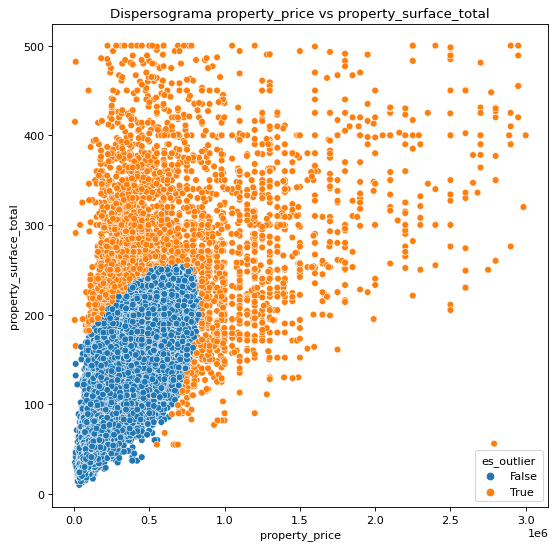

In [177]:
analisis_mahalanobis(x_train, ['property_price', 'property_surface_total'], 6, 1)

Siguiendo con la parte de tratamiento de valores atipicos para el modelo de test:

In [178]:
cond_property_price = x_test['property_price'] > 3000000
cond_surface_total = x_test['property_surface_total'] > 750

reg_combinacion = x_test[cond_property_price | cond_surface_total]
reg_combinacion.shape

x_test.drop(reg_combinacion.index, inplace=True)

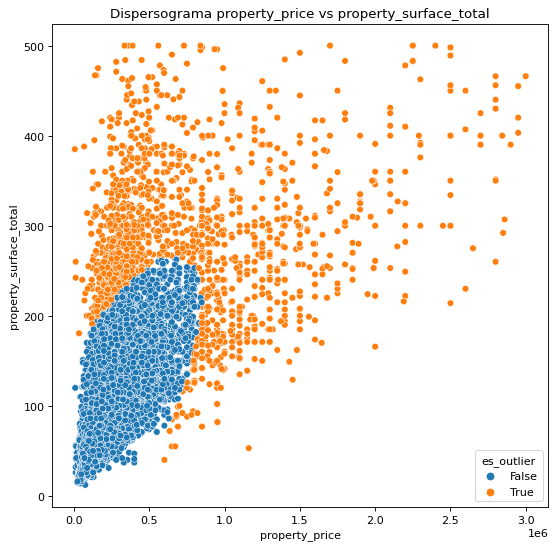

In [179]:
analisis_mahalanobis(x_test, ['property_price', 'property_surface_total'], 6, 1)

In [180]:
x_train.property_price

54155      220000.0
115091     107500.0
4930       590000.0
81842      125000.0
289106     535000.0
            ...    
425582     115000.0
151913     442000.0
221544     169000.0
362448     280000.0
446078    2200000.0
Name: property_price, Length: 63348, dtype: float64

In [181]:
y_train

54155      220000.0
115091     107500.0
4930       590000.0
81842      125000.0
289106     535000.0
            ...    
425582     115000.0
151913     442000.0
221544     169000.0
362448     280000.0
446078    2200000.0
Name: property_price, Length: 64866, dtype: float64

##Actualizacion de filas de y_train e y_test

Dado que eliminamos varias filas de los dataset de train y test, como aun contemos la variable 'property_price' en ambos dataset y tambien es la unica variables que esta dentro de los datasets de y_train e y_test, decidimos remplazarlas para que queden solo las filas que no fueron eliminadas. 

In [182]:
y_train = x_train['property_price']
y_test = x_test['property_price']

In [183]:
y_train

54155      220000.0
115091     107500.0
4930       590000.0
81842      125000.0
289106     535000.0
            ...    
425582     115000.0
151913     442000.0
221544     169000.0
362448     280000.0
446078    2200000.0
Name: property_price, Length: 63348, dtype: float64

In [184]:
x_train['property_price']

54155      220000.0
115091     107500.0
4930       590000.0
81842      125000.0
289106     535000.0
            ...    
425582     115000.0
151913     442000.0
221544     169000.0
362448     280000.0
446078    2200000.0
Name: property_price, Length: 63348, dtype: float64

##Reducción de la dimensionalidad

Para reducir la dimensionalidad del data set, utilizaremos el método PCA, dado que sirve para: 

* Visualización de datos para entender su distribución
detección de patrones inherentes a simple vista

* Reducción del ruido

* Aceleración de los tiempos de entrenamiento de un modelo

* Compresión de la información

* Presentación de resultados


A la hora de relizar el PCA, extraemos todas las variables no categoricas y utilizamos un dataset con las mismas, debido a que PCA no se puede realizar con variables categoricas, con excepcion de convertirlas de alguna manera a variable numerica. De todas formas no es recomendable por lo tanto solo haremos la reduccion de la dimensionalidad con las variables numericas.

<font color=red>EXPLICAR PORQUE SACAMOS LATITUD Y LONGITUD TAMBIEN

In [185]:
x_train_pca = x_train.drop(columns = ['place_l2', 'id', 'place_l3', 'operation', 'property_type', 'property_title', 
                                      'latitud', 'longitud', 'property_currency', 
                                      'property_price'], inplace=False)

columnas_elegidas = x_train_pca.columns.to_list()

x = x_train_pca.loc[:, columnas_elegidas]

std = StandardScaler()

x = std.fit_transform(x)

from sklearn.decomposition import PCA

pca = PCA(n_components = 3) #Luego veremos como determinar la cantidad de componentes
x_transformada = pca.fit_transform(x)

print('Shape before PCA: ', x.shape)
print('Shape after PCA: ', x_transformada.shape)

ds_pca = pd.DataFrame(data = x_transformada
             , columns = ['cp_1', 'cp_2', 'cp_3'], index=x_train.index)

ds_pca

Shape before PCA:  (63348, 4)
Shape after PCA:  (63348, 3)


cp_1      cp_2      cp_3
54155   0.221911  0.050404  0.022616
115091 -1.850095 -0.368313 -0.347397
4930    1.463068 -0.464669  0.516874
81842  -1.265518 -0.234074  0.199343
289106  2.170787 -0.122825 -0.197050
...          ...       ...       ...
425582 -1.407874 -0.093284  0.210766
151913  0.101362  0.171320  0.039763
221544  1.365060  0.674188 -0.131738
362448  0.054846  0.213566  0.026890
446078  4.713392 -1.921931  0.206474

[63348 rows x 3 columns]

In [186]:
columnas_elegidas

['property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered']

In [187]:
varianza_explicada = pca.explained_variance_ratio_
varianza_explicada

array([0.86928949, 0.10015755, 0.01828314])

In [188]:
varianza_explicada.cumsum()

array([0.86928949, 0.96944704, 0.98773018])

In [189]:
pca.get_covariance()

array([[1.00001579, 0.92513367, 0.78146122, 0.7913695 ],
       [0.92513367, 1.00001579, 0.74923581, 0.75605624],
       [0.78146122, 0.74923581, 1.00001579, 0.95067343],
       [0.7913695 , 0.75605624, 0.95067343, 1.00001579]])

In [190]:
# pca.fit(x_train_pca)
# ipca_transform = pca.transform(x_train_pca)
# ipca_transform.shape

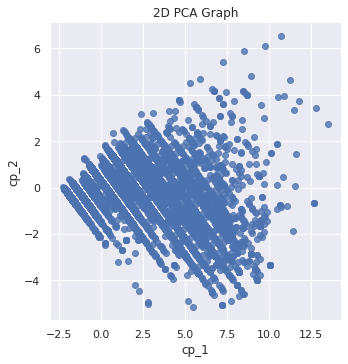

In [191]:
sns.set()
 
sns.lmplot(
   x='cp_1', 
   y='cp_2', 
   data=ds_pca,  
   fit_reg=False, 
   legend=True
   )

plt.title('2D PCA Graph')
plt.show()

[0.86928949 0.96944704 0.98773018]


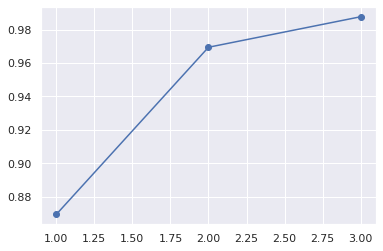

In [192]:
list_x = list(range(1, len(varianza_explicada)+1))

# Grafico varianza explicada y cantidad de componentes principales
plt.figure(figsize=(6, 4))
print(varianza_explicada.cumsum())
plt.plot(list_x, varianza_explicada.cumsum(), '-o')
plt.xlabel = 'Componentes Principales'
plt.ylabel = 'Variabilidad explicada'
plt.show()

Como podemos observar, con tal solo 3 componentes principales, tenemos un 97.5% de la variación total, suficiente para entrenar un modelo con estos componentes en vez de utilizar el dataset entero.

A continuacion, realizaremos el mismo analisis para el modelo de test:

In [193]:
x_test_pca = x_test.drop(columns = ['place_l2', 'id', 'place_l3', 'operation', 'property_type', 
                                    'property_title','latitud','longitud','property_currency', 
                                    'property_price'], inplace=False)

columnas_elegidas = x_test_pca.columns.to_list()

x_2 = x_test_pca.loc[:, columnas_elegidas]

x_2 = std.transform(x_2)

In [194]:
x_test_transformada = pca.transform(x_2)
x_test_transformada.shape

(27174, 3)

In [195]:
ds_pca_test = pd.DataFrame(data = x_test_transformada, columns = ['cp_1', 'cp_2', 'cp_3'], index=x_test.index)

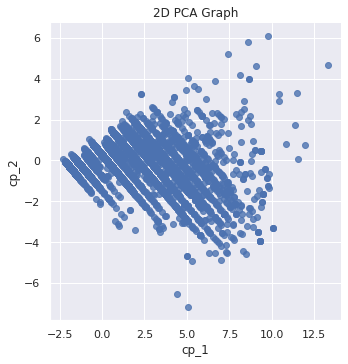

In [196]:
sns.set()

sns.lmplot(
    x='cp_1', 
    y='cp_2', 
    data=ds_pca_test, 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

#Agrupamiento

###Análisis de la tendencia al Clustering

In [197]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans

ds_aux = x_train.drop(columns = ['place_l2', 'id', 'place_l3', 'operation', 'property_type', 'property_title', 'property_currency'], inplace=False)

kmeans = KMeans(n_clusters=4, random_state=2)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(ds_aux) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(ds_aux)

centers = kmeans.cluster_centers_ #Visualicemos los grupos y el centroide de cada uno

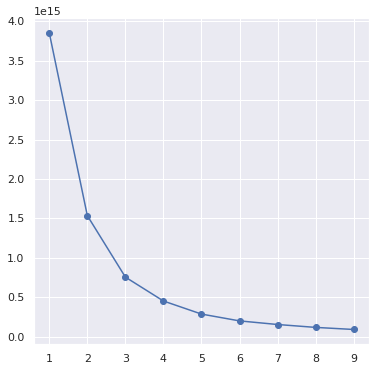

In [198]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_aux)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel='Cantidad de clusters'
plt.ylabel='SSE'
plt.show()

Vemos que en 4 clusters la curva que se forma en el gráfico empieza a aplanarse y en 2 clusters se produce un quiebre.

##Análisis de Silhouette

In [199]:
#esta comentado porque tarda mucho, pero anda

In [200]:
# from sklearn.metrics import silhouette_score

# #grafico el indice de siluette variando la cantidad de clusters de 2 a 5

# list_k = list(range(2, 6))

# for n_clusters in list_k:
#     clusterer = KMeans(n_clusters=n_clusters,random_state=2)
#     preds = clusterer.fit_predict(ds_aux)

#     score = silhouette_score (ds_aux, preds)
#     print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

El indice de silhouette mas grande y cercano a 1 se genera con un numero de clusters igual a 2, por lo que el score de silhouette es mas alto. Por este motivo, decidimos quedarnos con ese numero de clusters. 

In [201]:
# from yellowbrick.cluster import SilhouetteVisualizer

# model = KMeans(2, random_state=0)

# # Visualizamos el gráfico de silueta
# visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
# visualizer.fit(ds_aux)
# plt.show()

Teniendo en cuenta que el grafico muestra la evaluacion de la densidad y la separecion entre los clusters, vemos que una marcada diferencia de densidad entre un cluster y el otro.

##Análisis de cada grupo

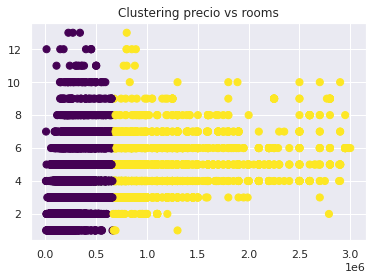

In [202]:
clusterer = KMeans(n_clusters=2,random_state=2)
preds = clusterer.fit_predict(ds_aux)
plt.scatter(ds_aux.property_price, ds_aux.property_rooms, c=preds, s=50, cmap='viridis')
plt.title("Clustering precio vs rooms")
plt.show()

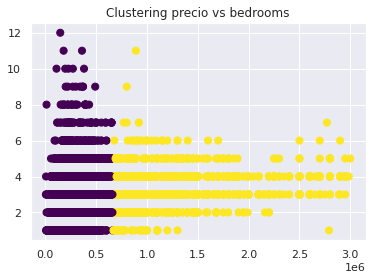

In [203]:
plt.scatter(ds_aux.property_price, ds_aux.property_bedrooms, c=preds, s=50, cmap='viridis')
plt.title("Clustering precio vs bedrooms")
plt.show()

Observamos que en ambos graficos la clusterizacion esta completamente determinada por el precio, es decir que a pesar de aumentar o disminuir la cantidad de habitaciones o de ambientes no cambiara de cluster sino que solo cuando varia el precio. Ademas podemos observar que se visualiza la misma division de cluster dependientes del precio.

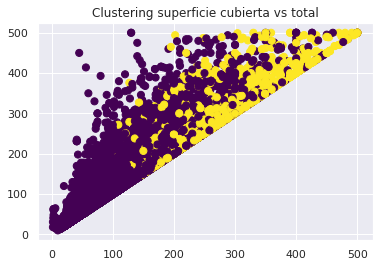

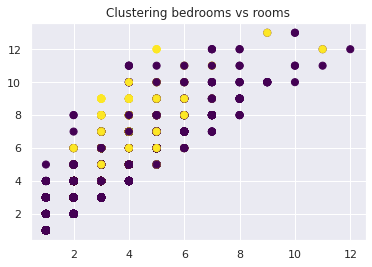

In [204]:
plt.scatter(ds_aux.property_surface_covered, ds_aux.property_surface_total, c=preds, s=50, cmap='viridis')
plt.title("Clustering superficie cubierta vs total")
plt.show()


plt.scatter(ds_aux.property_bedrooms, ds_aux.property_rooms, c=preds, s=50, cmap='viridis')
plt.title("Clustering bedrooms vs rooms")
plt.show()

Reafirmamos que el precio es el factor mas importante a la hora de la clusterizacion y por lo visto es el unico que influye completamente, ya que solo se observa una clusterizacion notoria al utilizar la variable precio.

A pesar de observar una marcada clusterizacion en base a property-price y teniendo en cuenta las anteriores columnas que fueron las que utilizamos para realizar el agrupamiento mediante el metodo de kmeans, podemos concluir en que otros posibles candidatos para el agrupamiento podrian haber sido los siguientes:

property_rooms: teniendo en cuenta la cantidad de habitaciones se espera que abunde la cantidad de propiedades con 1 o 2 ambientes, al estar ubicados en Capital Federal. Por lo tanto, esto generara que se clusterice entre mayores a 2 ambientes y menores o iguales a 2 ambientes. 

latitud: teniendo en cuenta la diferencia de precio que se suele generar entre zona este y zona oeste, se puede ver una posible tendencia a la generacion de dos clusters, ya que en el este sabemos que se encuentra la zona mas cara de la Capital Federal (ej. Puerto Madero) y eso puede generar una posible division. 

longitud: teniendo en cuenta la diferencia de precio que se suele generar entre zona norte y zona sur, se puede ver una posible tendencia a la generacion de dos clusters. 

property_surface_covered: teniendo en cuenta que una casa o ph tiende a tener mayor cantidad de m^2 que un departamento, se puede llegar a la conclusion de que la superficie cubierta puede dar pie a una posible generacion de clusters. 



##Gráfico de mapa de CABA 

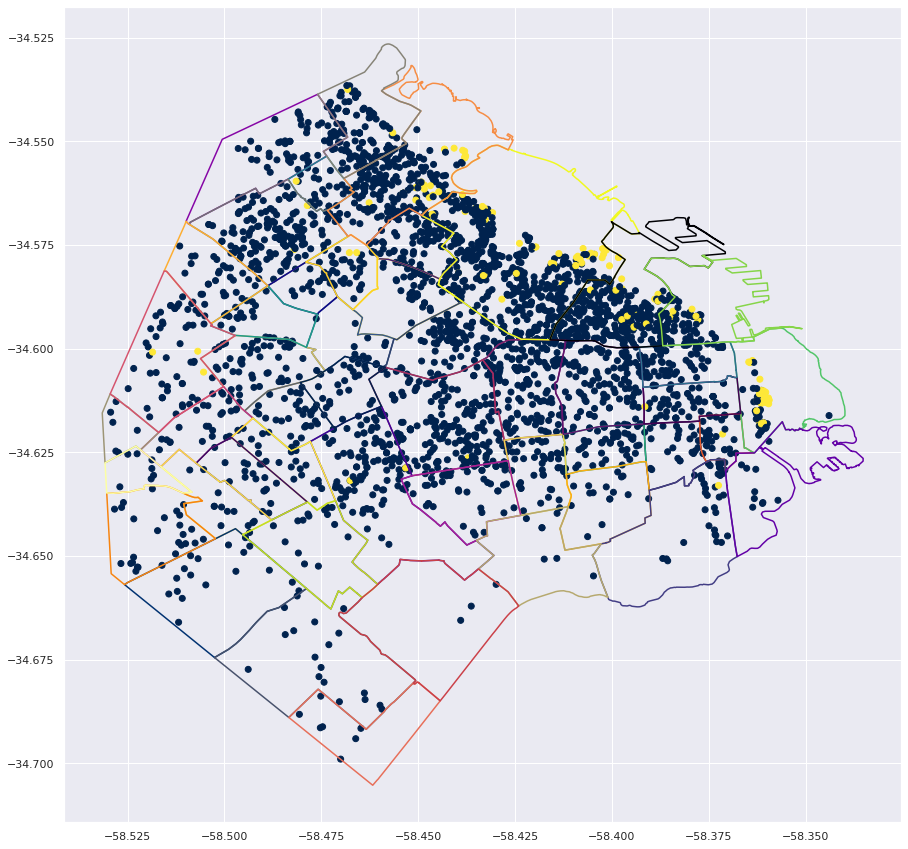

In [205]:
a = pd.Series(preds)
graficar_puntos_en_caba_sin_outliers(ds_aux.longitud, ds_aux.latitud, preds, proporcion=0.05)

##Análisis con 3 grupos

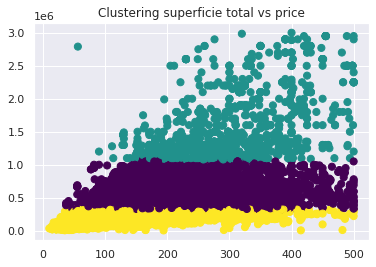

In [206]:
clusterer = KMeans(n_clusters=3,random_state=2)
preds = clusterer.fit_predict(ds_aux)

plt.scatter(ds_aux.property_surface_total, ds_aux.property_price, c=preds, s=50, cmap='viridis')
plt.title("Clustering superficie total vs price")
plt.show()

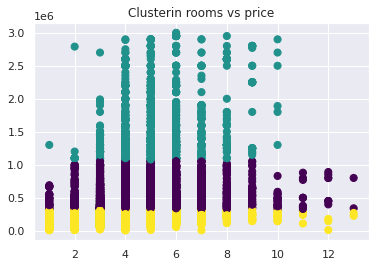

In [207]:
plt.scatter(ds_aux.property_rooms, ds_aux.property_price, c=preds, s=50, cmap='viridis')
plt.title("Clusterin rooms vs price")
plt.show()

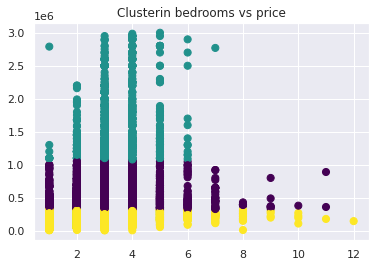

In [208]:
plt.scatter(ds_aux.property_bedrooms, ds_aux.property_price, c=preds, s=50, cmap='viridis')
plt.title("Clusterin bedrooms vs price")
plt.show()

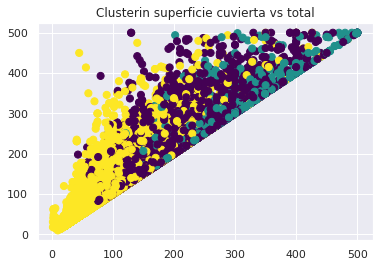

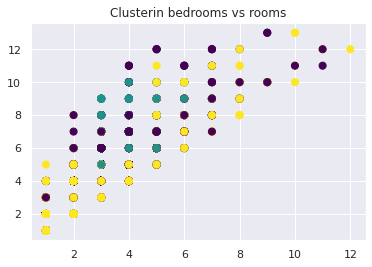

In [209]:
plt.scatter(ds_aux.property_surface_covered, ds_aux.property_surface_total, c=preds, s=50, cmap='viridis')
plt.title("Clusterin superficie cuvierta vs total")
plt.show()


plt.scatter(ds_aux.property_bedrooms, ds_aux.property_rooms, c=preds, s=50, cmap='viridis')
plt.title("Clusterin bedrooms vs rooms")
plt.show()

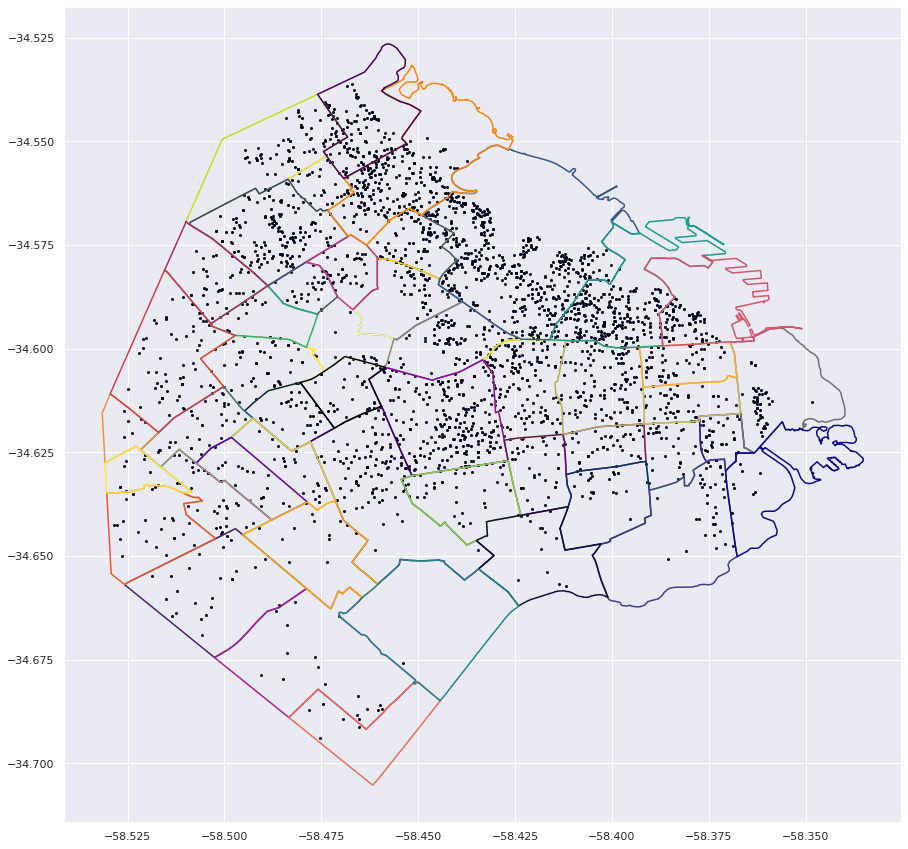

El porcentaje de outsiders dentro de la proporcion pedida de la muestra es: 0.0


In [210]:
graficar_puntos_en_caba(ds_aux.longitud, ds_aux.latitud, clusters=preds, proporcion=0.05)

En base a los graficos observados concluimos que, tanto para 2 clusters como 3, el precio es el factor mas importante en clusterizacion y solo la variacion del mismo genera los diferente clusters sin importar los diferentes valores que puedan llegar a tomar las otras variables.

A pesar de observar una marcada clusterizacion en base a property-price y teniendo en cuenta las anteriores columnas que fueron las que utilizamos para realizar el agrupamiento mediante el metodo de kmeans, podemos concluir en que otros posibles candidatos para el agrupamiento podrian haber sido los siguientes:

property_rooms: si bien se espera que abunde la cantidad de propiedades con 1 o 2 ambientes, al estar ubicados en Capital Federal, podemos encontrar una predominacion de monoambientos lo que puede llegar a generara este grupo se separe de los demas y que los otros dos cluster se dividan en 2,3 ambientes y mas de 3 ambientes. 

property_surface_covered: teniendo en cuenta que contamos con solo tres tipos de viviendas en el dataset, podemos concluir que una separacion en 3 clusters podria ser en base al tipo de vivienda, es decir casa, ph o departamento. Si bien esta variable no refleja estos 3 datos por separado, sabemos que suele haber una gran relacion entre la diferencia de los metros que abarca una casa con un ph o departamento.


#Clasificación

##Construcción del Target

Primero creamos la columna precio por metro cuadrado, dividiendo el precio por la superficie total para cada fila.

Medidas de resumen para la variable pxm2:
    	Media: 2376.3118330491884
    	q1: 1773.0
    	Mediana: 2228.5
    	q3: 2754.0
    	Moda: 0    2500.0
dtype: float64


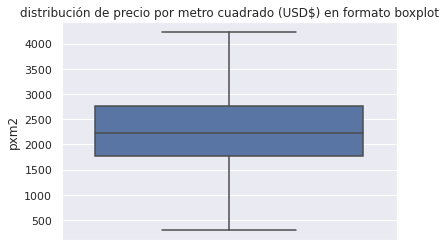

In [211]:
x_train['pxm2'] = (x_train.property_price / x_train.property_surface_total)
x_train['pxm2'] = x_train['pxm2'].round(0)

x_test['pxm2'] = (x_test.property_price / x_test.property_surface_total)
x_test['pxm2'] = x_test['pxm2'].round(0)

#pca_ds_aux['pxm2'] = (pca_ds_aux.property_price / pca_ds_aux.property_surface_total)
#pca_ds_aux['pxm2'] = pca_ds_aux['pxm2'].round(0)

medidas_de_resumen = mostrar_medidas_resumen('pxm2', ylabel="precio por metro cuadrado (USD$)", df=x_train)

####Dividir la variable pxm2 en 3 *intervalos*

##### Igual cantidad de observaciones

Luego dividimos la variable pxm2 en igual cantidad de observaciones

In [212]:
x_train['tipo_precio_1'] = pd.qcut(x_train['pxm2'], 3, labels=list('ABC'))
x_train.loc[:,"tipo_precio_1"].replace(to_replace=['A','B','C'],value=['low_price','medium_price', 'high_price'],inplace=True)

Construimos el mismo target para el dataset de dimensión reducida

In [213]:
#pca_ds_aux['tipo_precio_1'] = pd.qcut(pca_ds_aux['pxm2'], 3, labels=list('ABC'))
#pca_ds_aux.loc[:,"tipo_precio_1"].replace(to_replace=['A','B','C'],value=['low_price','medium_price', 'high_price'],inplace=True)

Mostramos la distribucion de la nueva variable creada, tipo_precio_1

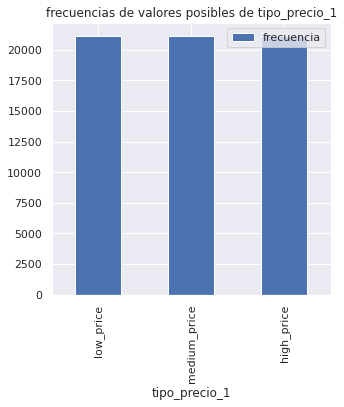

In [214]:
mostrar_frecuencias("tipo_precio_1", 5, 5, x_train)

Vemos que, al dividir la variable pxm2 en tres intervalos con igual cantidad de observaciones y luego creamos la variable tipo_precio_1 con esas mismas categorias, la distribucion es gran medida equitativa

#####1: 25% de las observaciones, 2: 50% siguiente, 3: 25% restante

Tomamos las medidas calculadas anteriormente de q1, q2 (mediana) y q3 para pxm2

Medidas de resumen para la variable pxm2:
    	Media: 2376.3118330491884
    	q1: 1773.0
    	Mediana: 2228.5
    	q3: 2754.0
    	Moda: 0    2500.0
dtype: float64


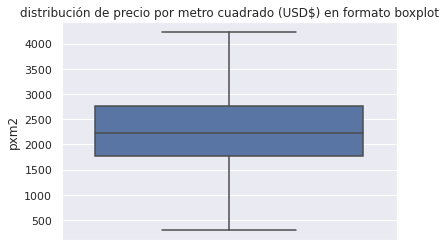

In [215]:
medidas_de_resumen = mostrar_medidas_resumen('pxm2', ylabel="precio por metro cuadrado (USD$)", df=x_train)
q1 = medidas_de_resumen[0]
q2 = medidas_de_resumen[1]
q3 = medidas_de_resumen[2]

In [216]:
total_filas = x_train.shape[0]
print(x_train[x_train.pxm2 < q1].shape[0]*100/ total_filas)
print(x_train[(x_train.pxm2 < q3) & (x_train.pxm2 > q1)].shape[0]*100 / total_filas)
print(x_train[x_train.pxm2 > q3].shape[0]*100 / total_filas)

24.979478436572585
49.965271200353605
24.98894992738524


Podemos ver que mantienen los porcentajes que se solicitan (25%, 50% y 25%)

Luego, categorizamos la variable pxm2 segun los intervalos calculados

In [217]:
def categorise(row, q1, q2, q3):  
    if row['pxm2'] <= q1:
        return 'low_price'
    elif row['pxm2'] > q1 and row['pxm2'] <= q3:
        return 'medium_price'
    elif row['pxm2'] > q3:
        return 'high_price'

In [218]:
x_train['tipo_precio_2'] = x_train.apply(lambda row: categorise(row, q1, q2, q3), axis=1)

Mostramos la distribucion de la nueva variable creada, tipo_precio_2

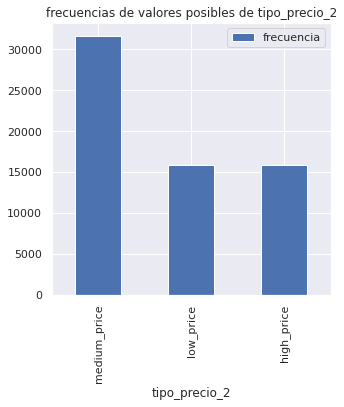

In [219]:
mostrar_frecuencias("tipo_precio_2", 5, 5, x_train)

###Pxm2 relativa a cada tipo de propiedad, intervalos cuartilicos.

Filtraremos por cada tipo de propiedad y luego dividiremos cada uno de estos filtrados como lo hicimos en el punto anterior. Primero filtramos por casa 

#### Casa

In [220]:
filtrado_casa = x_train[x_train['property_type'] == 'Casa']

Medidas de resumen para la variable pxm2:
    	Media: 1577.3990957665433
    	q1: 1111.0
    	Mediana: 1463.0
    	q3: 1879.0
    	Moda: 0     900.0
1    1636.0
2    1753.0
dtype: float64


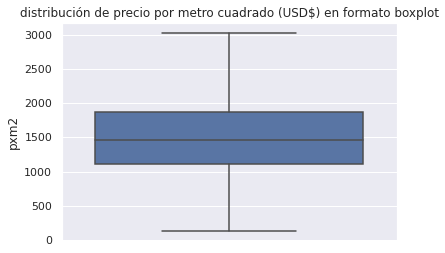

In [221]:
medidas_de_resumen = mostrar_medidas_resumen('pxm2', ylabel="precio por metro cuadrado (USD$)", df=filtrado_casa)
q1_casa = medidas_de_resumen[0]
q2_casa = medidas_de_resumen[1]
q3_casa = medidas_de_resumen[2]

In [222]:
total_filas = filtrado_casa.shape[0]
print(filtrado_casa[filtrado_casa.pxm2 < q1_casa].shape[0]*100/ total_filas)
print(filtrado_casa[(filtrado_casa.pxm2 < q3_casa) & (filtrado_casa.pxm2 > q1_casa)].shape[0]*100 / total_filas)
print(filtrado_casa[filtrado_casa.pxm2 > q3_casa].shape[0]*100 / total_filas)

24.989724619810932
49.856144677353065
24.948623099054664


Podemos ver que mantienen los porcentajes que se solicitan (25%, 50% y 25%)

Luego, categorizamos la variable pxm2 segun los intervalos calculados

In [223]:
filtrado_casa['tipo_precio_casa'] = filtrado_casa.apply(lambda row: categorise(row, q1_casa, q2_casa, q3_casa), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Mostramos la distribucion del precio por metro cuadrado para las casas

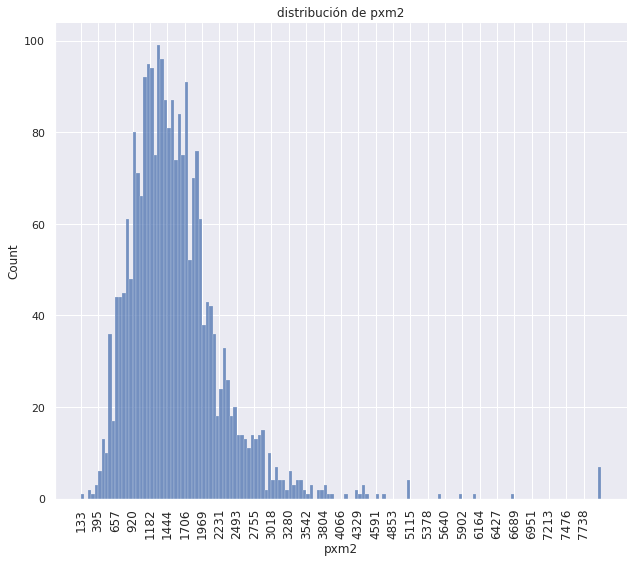

In [224]:
mostrar_distribuciones_cuantitativas("pxm2", ds=filtrado_casa, figsize=(10, 8), bins=150, espaciado=5)

Mostramos la distribucion de la nueva variable creada, tipo_precio_casa

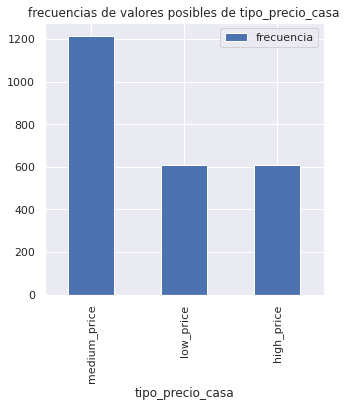

In [225]:
mostrar_frecuencias("tipo_precio_casa", 5, 5, filtrado_casa)

####Departamento

Luego filtramos por departamento

In [226]:
filtrado_depto = x_train[x_train['property_type'] == 'Departamento']

Medidas de resumen para la variable pxm2:
    	Media: 2499.4167048013032
    	q1: 1904.0
    	Mediana: 2333.0
    	q3: 2846.0
    	Moda: 0    2500.0
dtype: float64


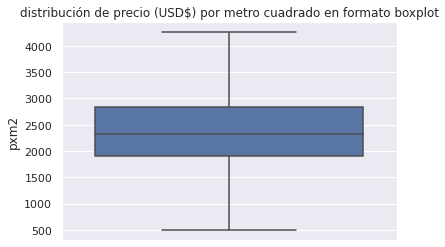

In [227]:
medidas_de_resumen = mostrar_medidas_resumen('pxm2', ylabel="precio (USD$) por metro cuadrado", df=filtrado_depto)
q1_depto = medidas_de_resumen[0]
q2_depto = medidas_de_resumen[1]
q3_depto = medidas_de_resumen[2]

In [228]:
total_filas = filtrado_depto.shape[0]
print(filtrado_depto[filtrado_depto.pxm2 < q1_depto].shape[0]*100/ total_filas)
print(filtrado_depto[(filtrado_depto.pxm2 < q3_depto) & (filtrado_depto.pxm2 > q1_depto)].shape[0]*100 / total_filas)
print(filtrado_depto[filtrado_depto.pxm2 > q3_depto].shape[0]*100 / total_filas)

24.919917263092383
49.97345829291062
24.982152990060587


Podemos ver que mantienen los porcentajes que se solicitan (25%, 50% y 25%)

Luego, categorizamos la variable pxm2 segun los intervalos calculados

In [229]:
filtrado_depto['tipo_precio_depto'] = x_train.apply(lambda row: categorise(row, q1_depto, q2_depto, q3_depto), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Mostramos la distribucion del precio por metro cuadrado para los departamentos

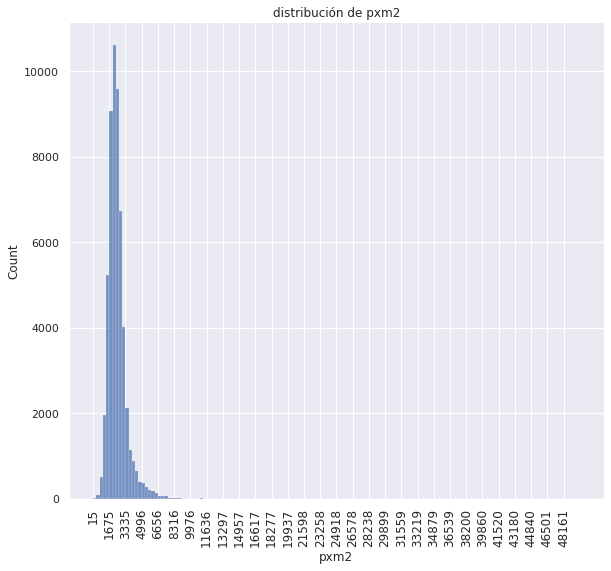

In [230]:
mostrar_distribuciones_cuantitativas("pxm2", ds=filtrado_depto, figsize=(10, 8), bins=150, espaciado=5)

Mostramos la distribucion de la nueva variable creada, tipo_precio_departamento

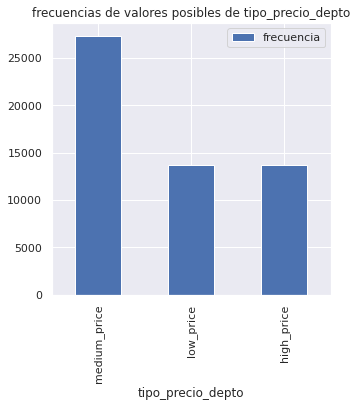

In [231]:
mostrar_frecuencias("tipo_precio_depto", 5, 5, filtrado_depto)

####PH

Luego filtramos por ph

In [232]:
filtrado_ph = x_train[x_train['property_type'] == 'PH']

Medidas de resumen para la variable pxm2:
    	Media: 1615.3971992361553
    	q1: 1243.0
    	Mediana: 1566.0
    	q3: 1935.0
    	Moda: 0    1667.0
dtype: float64


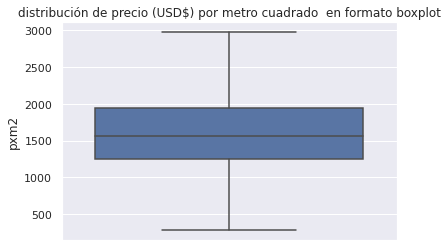

In [233]:
medidas_de_resumen = mostrar_medidas_resumen('pxm2', ylabel="precio (USD$) por metro cuadrado ", df=filtrado_ph)
q1_ph = medidas_de_resumen[0]
q2_ph = medidas_de_resumen[1]
q3_ph = medidas_de_resumen[2]

In [234]:
total_filas = filtrado_ph.shape[0]
print(filtrado_ph[filtrado_ph.pxm2 < q1_ph].shape[0]*100/ total_filas)
print(filtrado_ph[(filtrado_ph.pxm2 < q3_ph) & (filtrado_ph.pxm2 > q1_ph)].shape[0]*100 / total_filas)
print(filtrado_ph[filtrado_ph.pxm2 > q3_ph].shape[0]*100 / total_filas)

24.872692552514323
49.87269255251432
24.872692552514323


Podemos ver que mantienen los porcentajes que se solicitan (25%, 50% y 25%)

Luego, categorizamos la variable pxm2 segun los intervalos calculados

In [235]:
filtrado_ph['tipo_precio_ph'] = x_train.apply(lambda row: categorise(row, q1_ph, q2_ph, q3_ph), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Mostramos la distribucion del precio por metro cuadrado para los ph's:

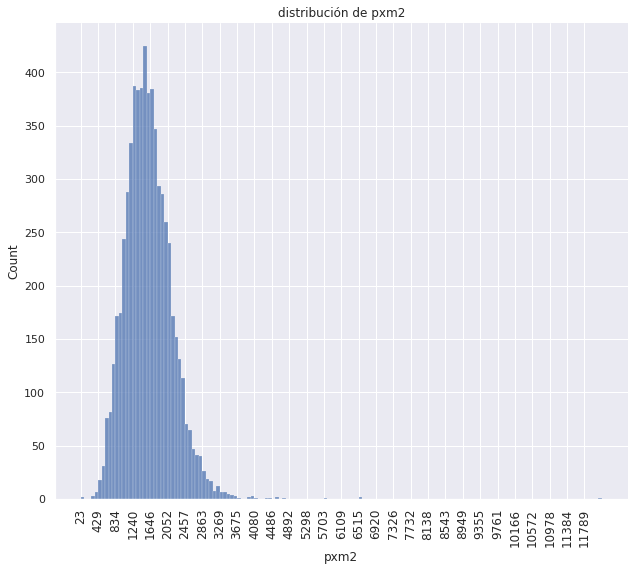

In [236]:
mostrar_distribuciones_cuantitativas("pxm2", ds=filtrado_ph, figsize=(10, 8), bins=150, espaciado=5)

Mostramos la distribucion de la nueva variable creada, tipo_precio_ph

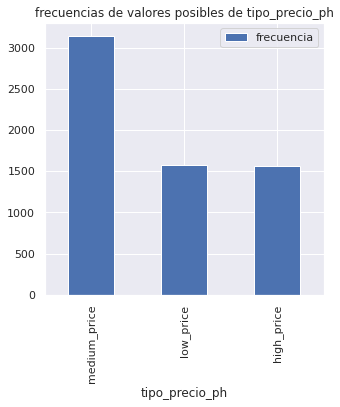

In [237]:
mostrar_frecuencias("tipo_precio_ph", 5, 5, filtrado_ph)

Una vez habiendo hecho la separación por tipo de propiedad y realizado la clasificación de precios correspondiente, procedemos a concatenar los filtrados de casa, departamento y ph, para generar un tipo_precio genérico

In [238]:
print(x_train.property_price)
print(y_train)

54155      220000.0
115091     107500.0
4930       590000.0
81842      125000.0
289106     535000.0
            ...    
425582     115000.0
151913     442000.0
221544     169000.0
362448     280000.0
446078    2200000.0
Name: property_price, Length: 63348, dtype: float64
54155      220000.0
115091     107500.0
4930       590000.0
81842      125000.0
289106     535000.0
            ...    
425582     115000.0
151913     442000.0
221544     169000.0
362448     280000.0
446078    2200000.0
Name: property_price, Length: 63348, dtype: float64


In [239]:
ds_pca.sort_index()

cp_1      cp_2      cp_3
43      0.827640  1.210268 -0.068415
49      1.115888 -0.126009  0.523961
53     -1.192906 -0.307716  0.185437
55      0.438876  0.538199  0.554615
57     -0.255985  0.524324  0.066619
...          ...       ...       ...
460028 -1.359937 -0.140557  0.207525
460069 -1.825375 -0.390246 -0.338270
460070 -1.874769 -0.341944 -0.336731
460073 -0.147044  0.416078  0.055655
460074 -1.781830 -0.436649 -0.356511

[63348 rows x 3 columns]

In [240]:
ds_concatenado = pd.concat([filtrado_ph.tipo_precio_ph, filtrado_casa.tipo_precio_casa, filtrado_depto.tipo_precio_depto])
ds_concatenado = ds_concatenado.sort_index()

# Ordenamos y_train para que coincidan los indices tanto en x_train como y_train
x_train = x_train.sort_index()
y_train = y_train.sort_index()

# Debemos ordenar los indices de los sets de pca para seguir la misma logica 
ds_pca = ds_pca.sort_index()

x_train['tipo_precio_generico'] = ds_concatenado

In [241]:
#Repetimos el proceso con los sets de test 
filtrado_test_casa = x_test[x_test['property_type'] == 'Casa']
filtrado_test_casa['tipo_precio_casa'] = x_test.apply(lambda row: categorise(row, q1_casa, q2_casa, q3_casa), axis=1)

filtrado_test_depto = x_test[x_test['property_type'] == 'Departamento']
filtrado_test_depto['tipo_precio_depto'] = x_test.apply(lambda row: categorise(row, q1_depto, q2_depto, q3_depto), axis=1)

filtrado_test_ph = x_test[x_test['property_type'] == 'PH']
filtrado_test_ph['tipo_precio_ph'] = x_test.apply(lambda row: categorise(row, q1_ph, q2_ph, q3_ph), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [242]:
ds_pca_test.sort_index()

cp_1      cp_2      cp_3
42      -0.263246  0.531688  0.068009
51       0.617862  0.365189  0.557958
56      -1.203081 -0.298293  0.183425
58      10.431251  3.276895 -1.886605
59       1.395607  0.648137 -0.115807
...           ...       ...       ...
460067  -0.126695  0.397233  0.059678
460071  -1.781830 -0.436649 -0.356511
460072   1.524852  0.516611 -0.142540
460075  -1.874769 -0.341944 -0.336731
460090  -0.694616 -0.796045  0.165250

[27174 rows x 3 columns]

In [243]:
ds_test_concatenado = pd.concat([filtrado_test_ph.tipo_precio_ph, filtrado_test_casa.tipo_precio_casa, filtrado_test_depto.tipo_precio_depto])
ds_test_concatenado = ds_test_concatenado.sort_index()

# Ordenamos y_test para que coincidan los indices tanto en x_test como y_test
x_test = x_test.sort_index()
y_test = y_test.sort_index()

# Debemos ordenar los indices de los sets de pca para seguir la misma logica 
ds_pca_test = ds_pca_test.sort_index()

x_test['tipo_precio_generico'] = ds_test_concatenado

###Selección de una de las alternativas 

Consideramos que, teniendo en cuenta que analizamos barrios dentro de la Capital Federal, la mejor alternativa a la hora de clasificar por un tipo de precio, sería la de clasificar por tipo de propiedad y luego hacer una separacion de precio por metro cuadrado. Esto es debido a que hay factores que pueden influir a la hora de la tasación de la propiedad, y el tipo de vivienda es una de ellas. 

Algunos de los factores más significativos podrían ser el hecho de que un departamento suele contar con servicios de mantenimiento y seguridad comunes a todo el edificio (expensas), lo cual genera un incremento del precio. Estos servicios en las casas o phs no son muy comunes, lo cual esto hace a las viviendas más inseguras y decrementa su precio. 

Por otro lado, las casas o phs generalmente tienen mayor cantidad de metros cuadrados que un departamento, y esto es un factor importante a la hora de considerar el precio de la propiedad. 

A su vez, es más frecuente que se tenga en las casas un espacio al aire libre más grende que en los demás tipos de propiedades. Esto podría llegar a incrementar el precio de las mismas. 



###Comparar la alternativa seleccionada con la división en 3 grupos obtenida utilizando agrupamiento por K Means

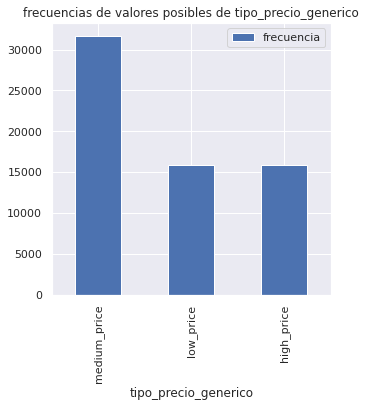

In [244]:
mostrar_frecuencias("tipo_precio_generico", 5, 5, x_train)

Vemos que, en el caso de la alternativa seleccionada anteriormente, donde se generó la nueva variable tipo_precio_generico a partir de la generación de tres variables de precio: tipo_precio_casa, tipo_precio_ph y tipo_precio_depto. Donde las mismas fueron generadas a partir de una filtración del dataset por tipo de propiedad trabajando con la variable pxm2. 
Podemos ver que en el caso medium_price hay una mayor predominancia de propiedades con un precio dentro del rango de q1 y q3. 

Por otro lado, tanto low_price como high_price se distruyen equitativamente. 

Esto tiene sentido debido a que la separación de los intervalos fue de 25%, 50%, 25% luego de haber realizado el filtrado por tipo de propiedad. 

En cuanto a la división en 3 grupos obtenida utilizando el agrupamiento por KMeans, podemos concluir en que la mayor predominancia se da en propiedades con un tipo de precio medio (medium_price) y lo mismo sucede en el análisis realizado anteriormente con la alternativa elegida. 

Por otro lado, teniendo en cuenta la distribución de los puntos observada en el gráfico de Kmeans para los grupos superior e inferior, si bien parece que el grupo superior abarca una mayor cantidad de puntos, en el grupo inferior se puede notar que hay una mayor densidad. Lo cual genera que las distribuciones sean similares. 

Por estas razones, podemos definir a la variable tipo_precio_generico como un buen target.

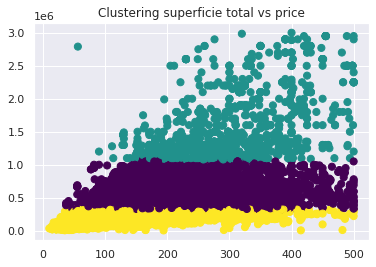

In [245]:
clusterer = KMeans(n_clusters=3,random_state=2)
preds = clusterer.fit_predict(ds_aux)

plt.scatter(ds_aux.property_surface_total, ds_aux.property_price, c=preds, s=50, cmap='viridis')
plt.title("Clustering superficie total vs price")
plt.show()

##Entrenamiento y Predicción

En principio, hacemos one hot encoding para poder transformar las variables categóricas a variables dummies. Esto únicamente lo vamos a hacer con property_type, ya que no debemos utilizar las variables relacionadas a precio y porque las demás variables no aportan información relevante ya que algunas tienen muchas categorías (por ejemplo, place_l3) y otras solo una (por ejemplo, property_currency)

In [246]:
#One hot encoding para variables categoricas
train_con_dummi = pd.get_dummies(x_train, columns=["property_type"], drop_first=False)
test_con_dummi = pd.get_dummies(x_test, columns=["property_type"], drop_first=False)

In [247]:
x_train_target = train_con_dummi.drop(columns = ['place_l2', 'id', 'place_l3', 'operation', 'property_title', 'property_currency', 'tipo_precio_1', 'tipo_precio_2', 'tipo_precio_generico', 'property_price', 'pxm2'], inplace=False)
x_test_target = test_con_dummi.drop(columns = ['place_l2', 'id', 'place_l3', 'operation', 'property_title', 'property_currency', 'property_price','tipo_precio_generico', 'pxm2'], inplace=False)

In [248]:
y_train_target = train_con_dummi['tipo_precio_generico'].copy()
y_test_target = test_con_dummi['tipo_precio_generico'].copy()

Para formar todos los arboles (modelo 1, 2 y 3) , utilizamos la métrica f1_score debido a que se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

En cuanto los folds utilizados, usaremos 5, para todos los modelos, ya que un número alto de folds generaría un tiempo muy alto de consumo y sería muy costoso computacionalmente. Por otro lado, tener un número de folds bajo generaría un error de predicción muy similar la mayoría del tiempo, lo cual puede ser útil. Es por esta razón que consideramos incluir un número de folds intermedio para poder balancear ambos casos mencionados. 

In [249]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score
from sklearn.tree import export_graphviz
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

In [250]:
def cross_validation_tree_train(params_grid=None,folds=5, base_tree=None, scorer_fn=None, n=10, x_ds=x_train_target, y_ds=y_train_target): 
  #Conjunto de parámetros que quiero usar
  if(params_grid == None):
    params_grid = {'criterion':['gini','entropy'],
                  'ccp_alpha':np.linspace(0,0.05,n), 
                  'max_depth':list(range(1,10))},

  #Kfold estratificado
  kfoldcv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=2)#preguntar si el shuffle rompe algo

  #Random Search Cross Validation
  randomcv = RandomizedSearchCV(estimator=base_tree,
                                param_distributions = params_grid,
                                scoring=scorer_fn,
                                cv=kfoldcv,
                                n_iter=n,
                                return_train_score= True,
                                random_state=2) 

  #Busco los hiperparamtros que optimizan F1 Score
  randomcv.fit(x_ds, y_ds)

  return randomcv

In [251]:
def encontrar_mejor_metrica_de_cv(randomcv):  
  #creo una lista que contiene todas las metricas obtenidas en todos los spits de cv
  metricas_totales = []
  metricas_totales.extend(randomcv.cv_results_['split0_test_score'])
  metricas_totales.extend(randomcv.cv_results_['split1_test_score'])
  metricas_totales.extend(randomcv.cv_results_['split2_test_score'])
  metricas_totales.extend(randomcv.cv_results_['split3_test_score'])
  metricas_totales.extend(randomcv.cv_results_['split4_test_score'])

  print('La mejor metrica obtenida mediante cv en train es de:',max(metricas_totales))

  return metricas_totales,max(metricas_totales)

###Modelo 1: Arbol de Decisión

#### Con DataSet General

In [252]:
#Clasificador
base_tree = DecisionTreeClassifier()

#Metrica
scorer_fn = make_scorer(sk.metrics.f1_score, average = 'macro')

randomcv = cross_validation_tree_train(base_tree=base_tree, scorer_fn=scorer_fn)

In [253]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0}
0.5466227224398063


In [254]:
metricas, mejor_metrica = encontrar_mejor_metrica_de_cv(randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.5646478031685006


In [255]:
#sns.boxplot(y=metricas_totales, showfliers = False)

Al hacer CV con el conjunto de train obtuvimos el best_score_. Este es la media a todas mejores métricas obtenidas en cada uno de los splits para todos los juegos de hiper parámetros con distintas particiones del dataset de train en Cross Validation. Sin embargo, hay métricas en los splits individuales que, como vimos, son mejores.

In [256]:
#Creo el árbol con los mejores hiperparámetros
arbol=DecisionTreeClassifier(random_state=2).set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train_target,y_train_target)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

Luego de crear el arbol con los mejores hiperparámetros, mostramos el arbol generado en un gráfico

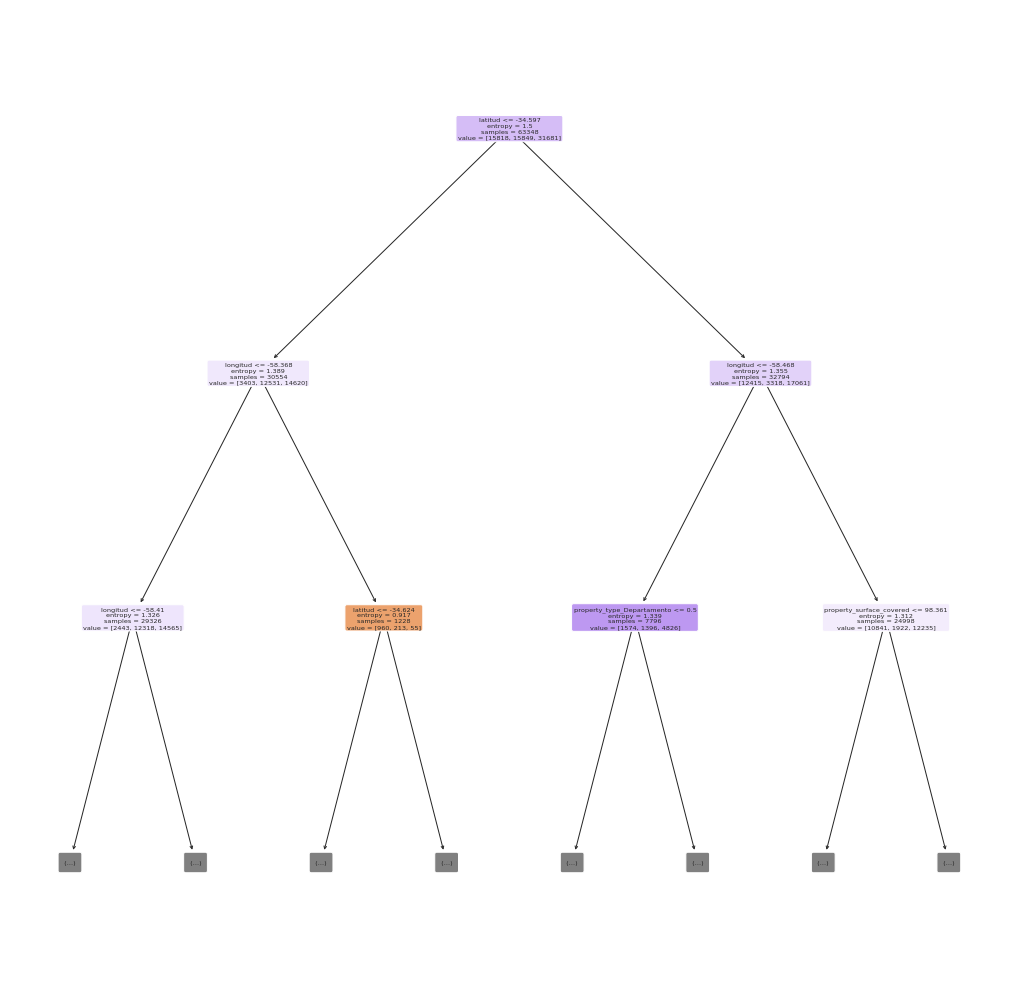

In [257]:
plt.figure(figsize=(18,18))
tree_plot_completo=tree.plot_tree(arbol,max_depth=2,feature_names=x_train_target.columns.to_list(),filled=True,rounded=True)
plt.show(tree_plot_completo)

Como podemos observar, de los atributos seleccionados se muestran en el árbol latitud, longitud y property_type_departamento. De esta forma, podemos deducir que las ramificaciones son producto de:

La primer bifurcación haría referencia a una separación norte-sur (al tratarse de la latitud, que si bien va de este a oeste, se traza una linea que divide de norte a sur), dado que las propiedades que se encuentran en los barrios que estan en el norte suelen ser mas costosas. Esto podría generar una separación a la hora de decidir el tipo de precio de la propiedad. Debido a esta razón se traza la línea roja y se divide en secciones A y B.

Siguiendo las ramificaciones, si nos ubicamos en la parte izquierda del árbol en el segundo nivel vemos que se genera otra particion representada por la linea verde. Sabiendo que en la sección 1 se encuentra puerto madero, que es uno de los barrios mas caros de la Capital federal, tiene sentido que se genere esta separacion.

Siguiendo las separaciones, en la parte izquierda del arbol del tercer nivel se genera otra separación, representada por la linea violeta. Vemos que acá hay dos secciones: 2.1 y 2.2 Luego se continua con una nueva bifurcación.

Ahora, posicionandonos en el sector derecho del arbol en el tercer nivel, vemos que se genera una separacion representada por la linea negra (latitud), donde se dividen dos sectores con diferencias en los precios de las propiedades representativa. En el sector de arriba vamos a tener el barrio de puerto madero, que es uno de los barrios con propiedades más costosas de la Capital Federal. Podemos ver la división en las secciones 1.1 y 1.2.

Por otro lado, tenemos la bifurcación del primer nivel del lado derecho. En este caso vamos a ver una diferencias de precios en las propiedades de los barrios que estan del lado derecho y del lado izquierdo de la linea celeste. Aquí se pueden apreciar las secciones 3 y 4.

Por último, tendremos una nueva bifurcación en el segundo nivel del lado derecho. Para el caso la sección 3 esta nueva bifurcación va a estar dada por property_type_departamento, lo cual es de esperarse debido a que en la Capital Federal predominan los departamentos, en lugar de las casa o phs. 

Para el caso de la sección 4, la nueva bifurcación va a estar dada nuevamente por latitud lo cual explica las diferencias de valor entre las propiedades que se encuentran más al sur y mas al norte de la Capital Federal. Así es como se generan las secciones 4.1 y 4.2.

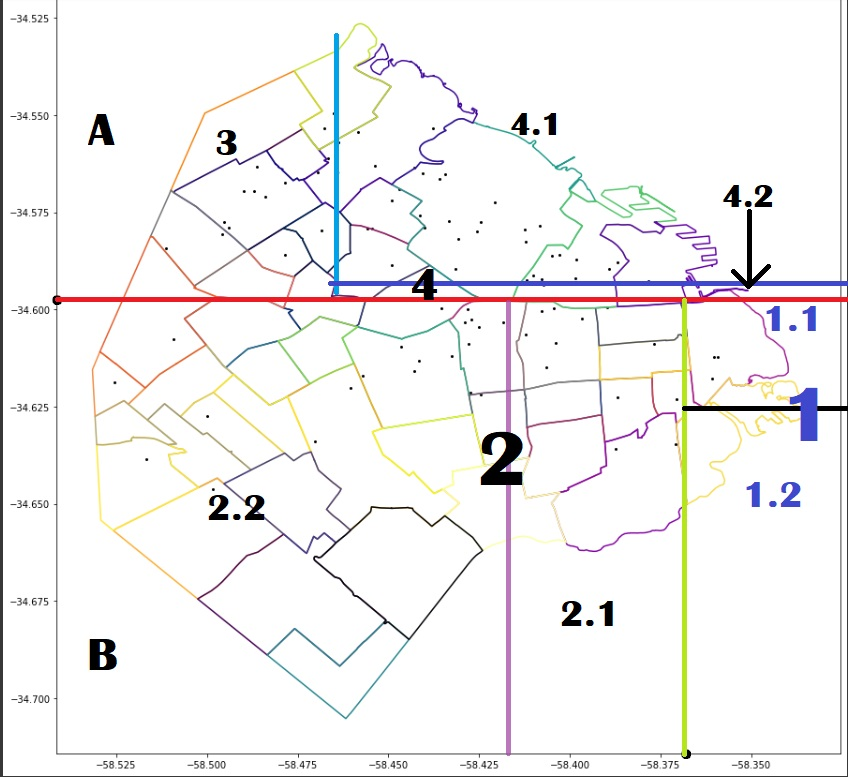

Procedemos a evaluar la performance del árbol en el conjunto de evaluación, describiendo las métricas y mostrando la matriz de confusión

In [258]:
y_pred = arbol.predict(x_test_target)#test

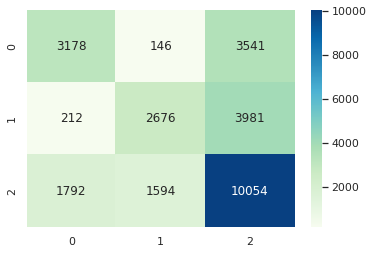

In [259]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test_target, y_pred)
#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')

In [260]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test_target,y_pred)
recall=recall_score(y_test_target,y_pred, average='macro')
f1=f1_score(y_test_target,y_pred, average='macro')

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))


Accuracy: 0.5854125266799146
Recall: 0.5335232429530189
f1 score: 0.55005621541289


Procedemos a realizar la comparacion de la performance del arbol en el conjunto de evaluacion vs en el conjunto de entrenamiento. 

In [261]:
print("Mejor metrica en train:",mejor_metrica) #mejor metrica del train
print("Metrica en test:",f1) #metrica del test 
print("Diferencia test - train:",(mejor_metrica-f1)) #metrica del test 

Mejor metrica en train: 0.5646478031685006
Metrica en test: 0.55005621541289
Diferencia test - train: 0.014591587755610647


#### Con DataSet Reducido por PCA

In [262]:
#Clasificador
base_tree = DecisionTreeClassifier()

#Metrica
scorer_fn = make_scorer(sk.metrics.f1_score, average = 'macro')

# randomcv = cross_validation_tree_train(base_tree=base_tree, scorer_fn=scorer_fn, x_ds=ds_pca, y_ds=y_train_target)
randomcv = cross_validation_tree_train(base_tree=base_tree, scorer_fn=scorer_fn, x_ds=ds_pca, y_ds=y_train_target)


In [263]:
# #Conjunto de parámetros que quiero usar
# params_grid = {'criterion':['gini','entropy'],
#                 'ccp_alpha':np.linspace(0,0.05,10), 
#                 'max_depth':list(range(1,10))},

# #Kfold estratificado
# kfoldcv = StratifiedKFold(n_splits=5)

# #Random Search Cross Validation
# randomcv = RandomizedSearchCV(estimator=base_tree,
#                               param_distributions = params_grid,
#                               scoring=scorer_fn,
#                               cv=kfoldcv,
#                               n_iter=10,
#                               return_train_score= True,
#                               random_state=2) 

# #Busco los hiperparamtros que optimizan F1 Score
# randomcv.fit(ds_pca, y_train_target)

In [264]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
metrica_train_tree = randomcv.best_score_
print(metrica_train_tree)

{'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0}
0.3338417812536807


In [265]:
metricas, mejor_metrica = encontrar_mejor_metrica_de_cv(randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.34202186883303504


In [266]:
#sns.boxplot(y=metricas, showfliers = False)

In [267]:
#Creo el árbol con los mejores hiperparámetros
arbol_pca=DecisionTreeClassifier(random_state=2).set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol_pca.fit(ds_pca,y_train_target)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

Luego de crear el arbol con los mejores hiperparámetros, mostramos el arbol generado en un gráfico

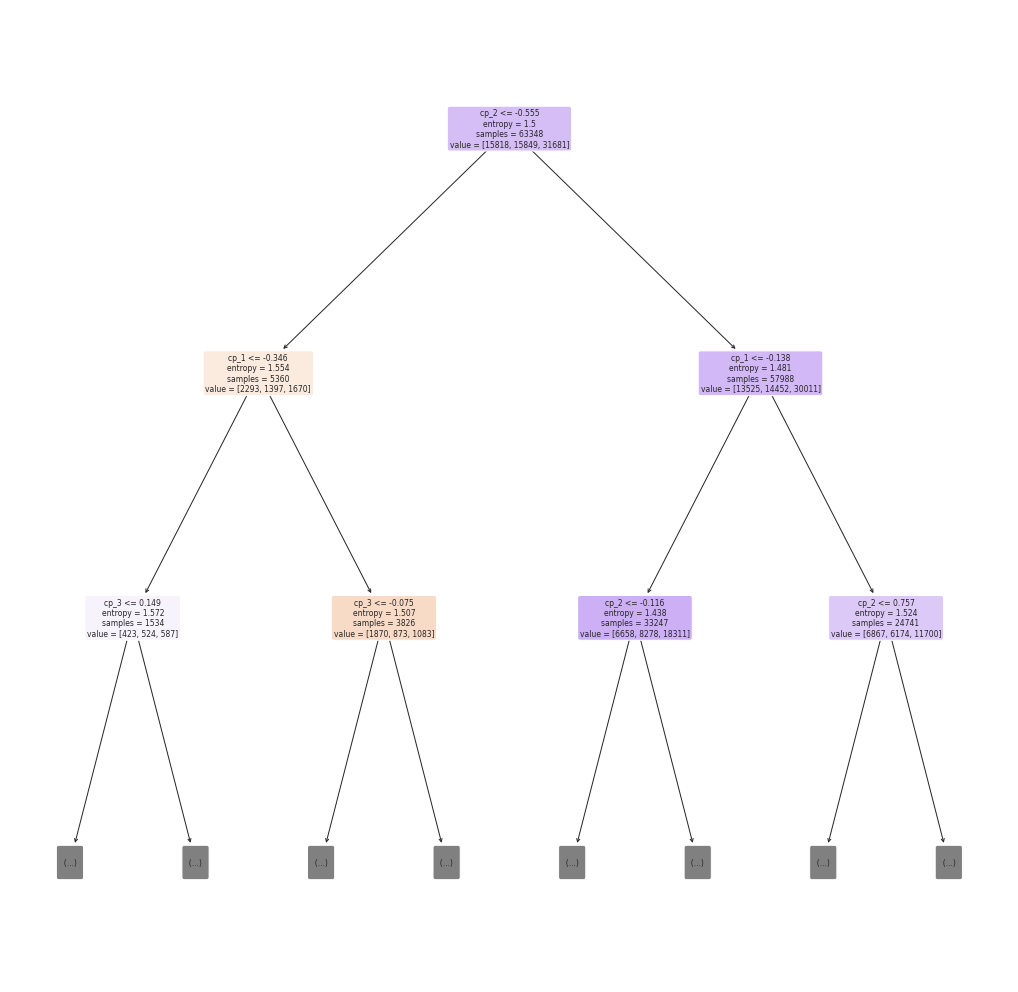

In [268]:
plt.figure(figsize=(18,18))
tree_plot_completo=tree.plot_tree(arbol_pca,max_depth=2,feature_names=ds_pca.columns.to_list(),filled=True,rounded=True)
plt.show(tree_plot_completo)

In [269]:
y_pred_pca = arbol_pca.predict(ds_pca_test)#test

In [270]:
y_pred_pca

array(['medium_price', 'medium_price', 'medium_price', ...,
       'medium_price', 'medium_price', 'high_price'], dtype=object)

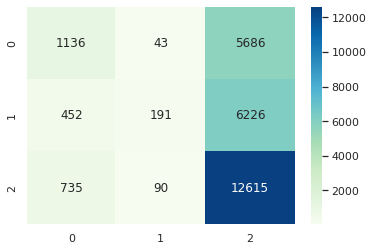

In [271]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test_target, y_pred_pca)
#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')

In [272]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test_target ,y_pred_pca)
recall=recall_score(y_test_target, y_pred_pca, average='macro')
f1=f1_score(y_test_target, y_pred_pca, average='macro')

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.5130639581953338
Recall: 0.37729973809254186
f1 score: 0.32163690087820335


Procedemos a realizar la comparacion de la performance del arbol en el conjunto de evaluacion vs en el conjunto de entrenamiento. 

In [273]:
print("Mejor metrica en train:",mejor_metrica) #mejor metrica del train
print("Metrica en test:",f1) #metrica del test 
print("Diferencia test - train:",(mejor_metrica-f1)) #metrica del test 

Mejor metrica en train: 0.34202186883303504
Metrica en test: 0.32163690087820335
Diferencia test - train: 0.02038496795483169


###Modelo 2: Random Forest

#### Con DataSet General

In [274]:
from sklearn.ensemble import RandomForestClassifier

#Clasificador
rmf = RandomForestClassifier()
#Metrica
scorer_fn = make_scorer(sk.metrics.f1_score, average = 'macro') 

randomcv = cross_validation_tree_train(base_tree=rmf, scorer_fn=scorer_fn)

Para construir el clasificador Random Forest, utilizamos la métrica accuracy debido a que representa el porcentaje total de valores correctamente clasificados, tanto positivos como negativos. 

En cuanto los folds utilizados, usamos 5 ya que un número alto de folds generaría un tiempo muy alto de consumo y sería muy costoso computacionalmente. Por otro lado, tener un número de folds bajo generaría un error de predicción muy similar la mayoría del tiempo, lo cual puede ser útil. Es por esta razón que consideramos incluir un número de folds intermedio para poder balancear ambos casos mencionados.

In [275]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)

#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0}
0.5085452533768913


In [276]:
metricas, mejor_metrica = encontrar_mejor_metrica_de_cv(randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.5242492349917902


Como paso siguiente, realizaremos el análisis de la importancia de los atributos:


In [277]:
mejor_rmf = randomcv.best_estimator_
feat_imps = mejor_rmf.feature_importances_
importancia_pred_tupla = sorted(zip(feat_imps, x_train_target.columns.values), reverse=True)
sorted(zip(feat_imps, x_train_target.columns.values), reverse=True)

[(0.5993532641130079, 'latitud'),
 (0.21406063436214384, 'longitud'),
 (0.05878269326565568, 'property_surface_covered'),
 (0.054110640224060716, 'property_surface_total'),
 (0.0321687602227279, 'property_type_Departamento'),
 (0.019796373448934163, 'property_type_PH'),
 (0.013403984058539884, 'property_rooms'),
 (0.006214059194005275, 'property_bedrooms'),
 (0.002109591110924676, 'property_type_Casa')]

In [278]:
importancia_predictores = pd.DataFrame({'predictor': [importancia_pred_tupla[0][1]], 'latitud': importancia_pred_tupla[0][0]})
for i in range(1,len(importancia_pred_tupla)):
  importancia_predictores[[importancia_pred_tupla[i][1]]] = importancia_pred_tupla[i][0]

importancia_predictores.drop('predictor', axis='columns', inplace=True)

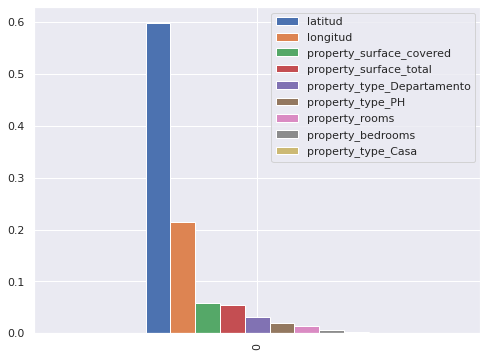

In [279]:
# Graficamos la importancia de los atributos
importancia_predictores.plot(kind='bar', figsize=(8,6))

Como podemos observar, el atributo latitud es el que mayor importancia tiene. Esto tendria sentido dado que, la latitud permite separar entre regiones norte y sur. Segun sabemos, una propiedad suele tener un precio mas elevado a medida que se encuentra mas al norte.

En segundo lugar tenemos a la longitud, la cual siguiendo la logica anterior, nos permite dividir entre este y oeste. Teniendo en cuenta que el centro de la capital, junto con el barrio mas caro de la misma, se encuentran al este, asumimos que en esta zona hay una mayor cantidad de departamentos y a su vez precios mas elevados, en comparacion al resto. Por este motivo se utiliza este criterio para la categorizacion del tipo de precio.

Con respecto a los otros atributos, vemos que su importancia es lo suficientemente baja, en comparacion a los anteriores, como para considerarlos.

Mostramos la conformación final de uno de los árboles generados

In [280]:
#Creo el árbol con los mejores hiperparámetros
arbol=RandomForestClassifier(random_state=2).set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
model = arbol.fit(X = x_train_target, y = y_train_target)

In [281]:
y_pred = model.predict(x_test_target)

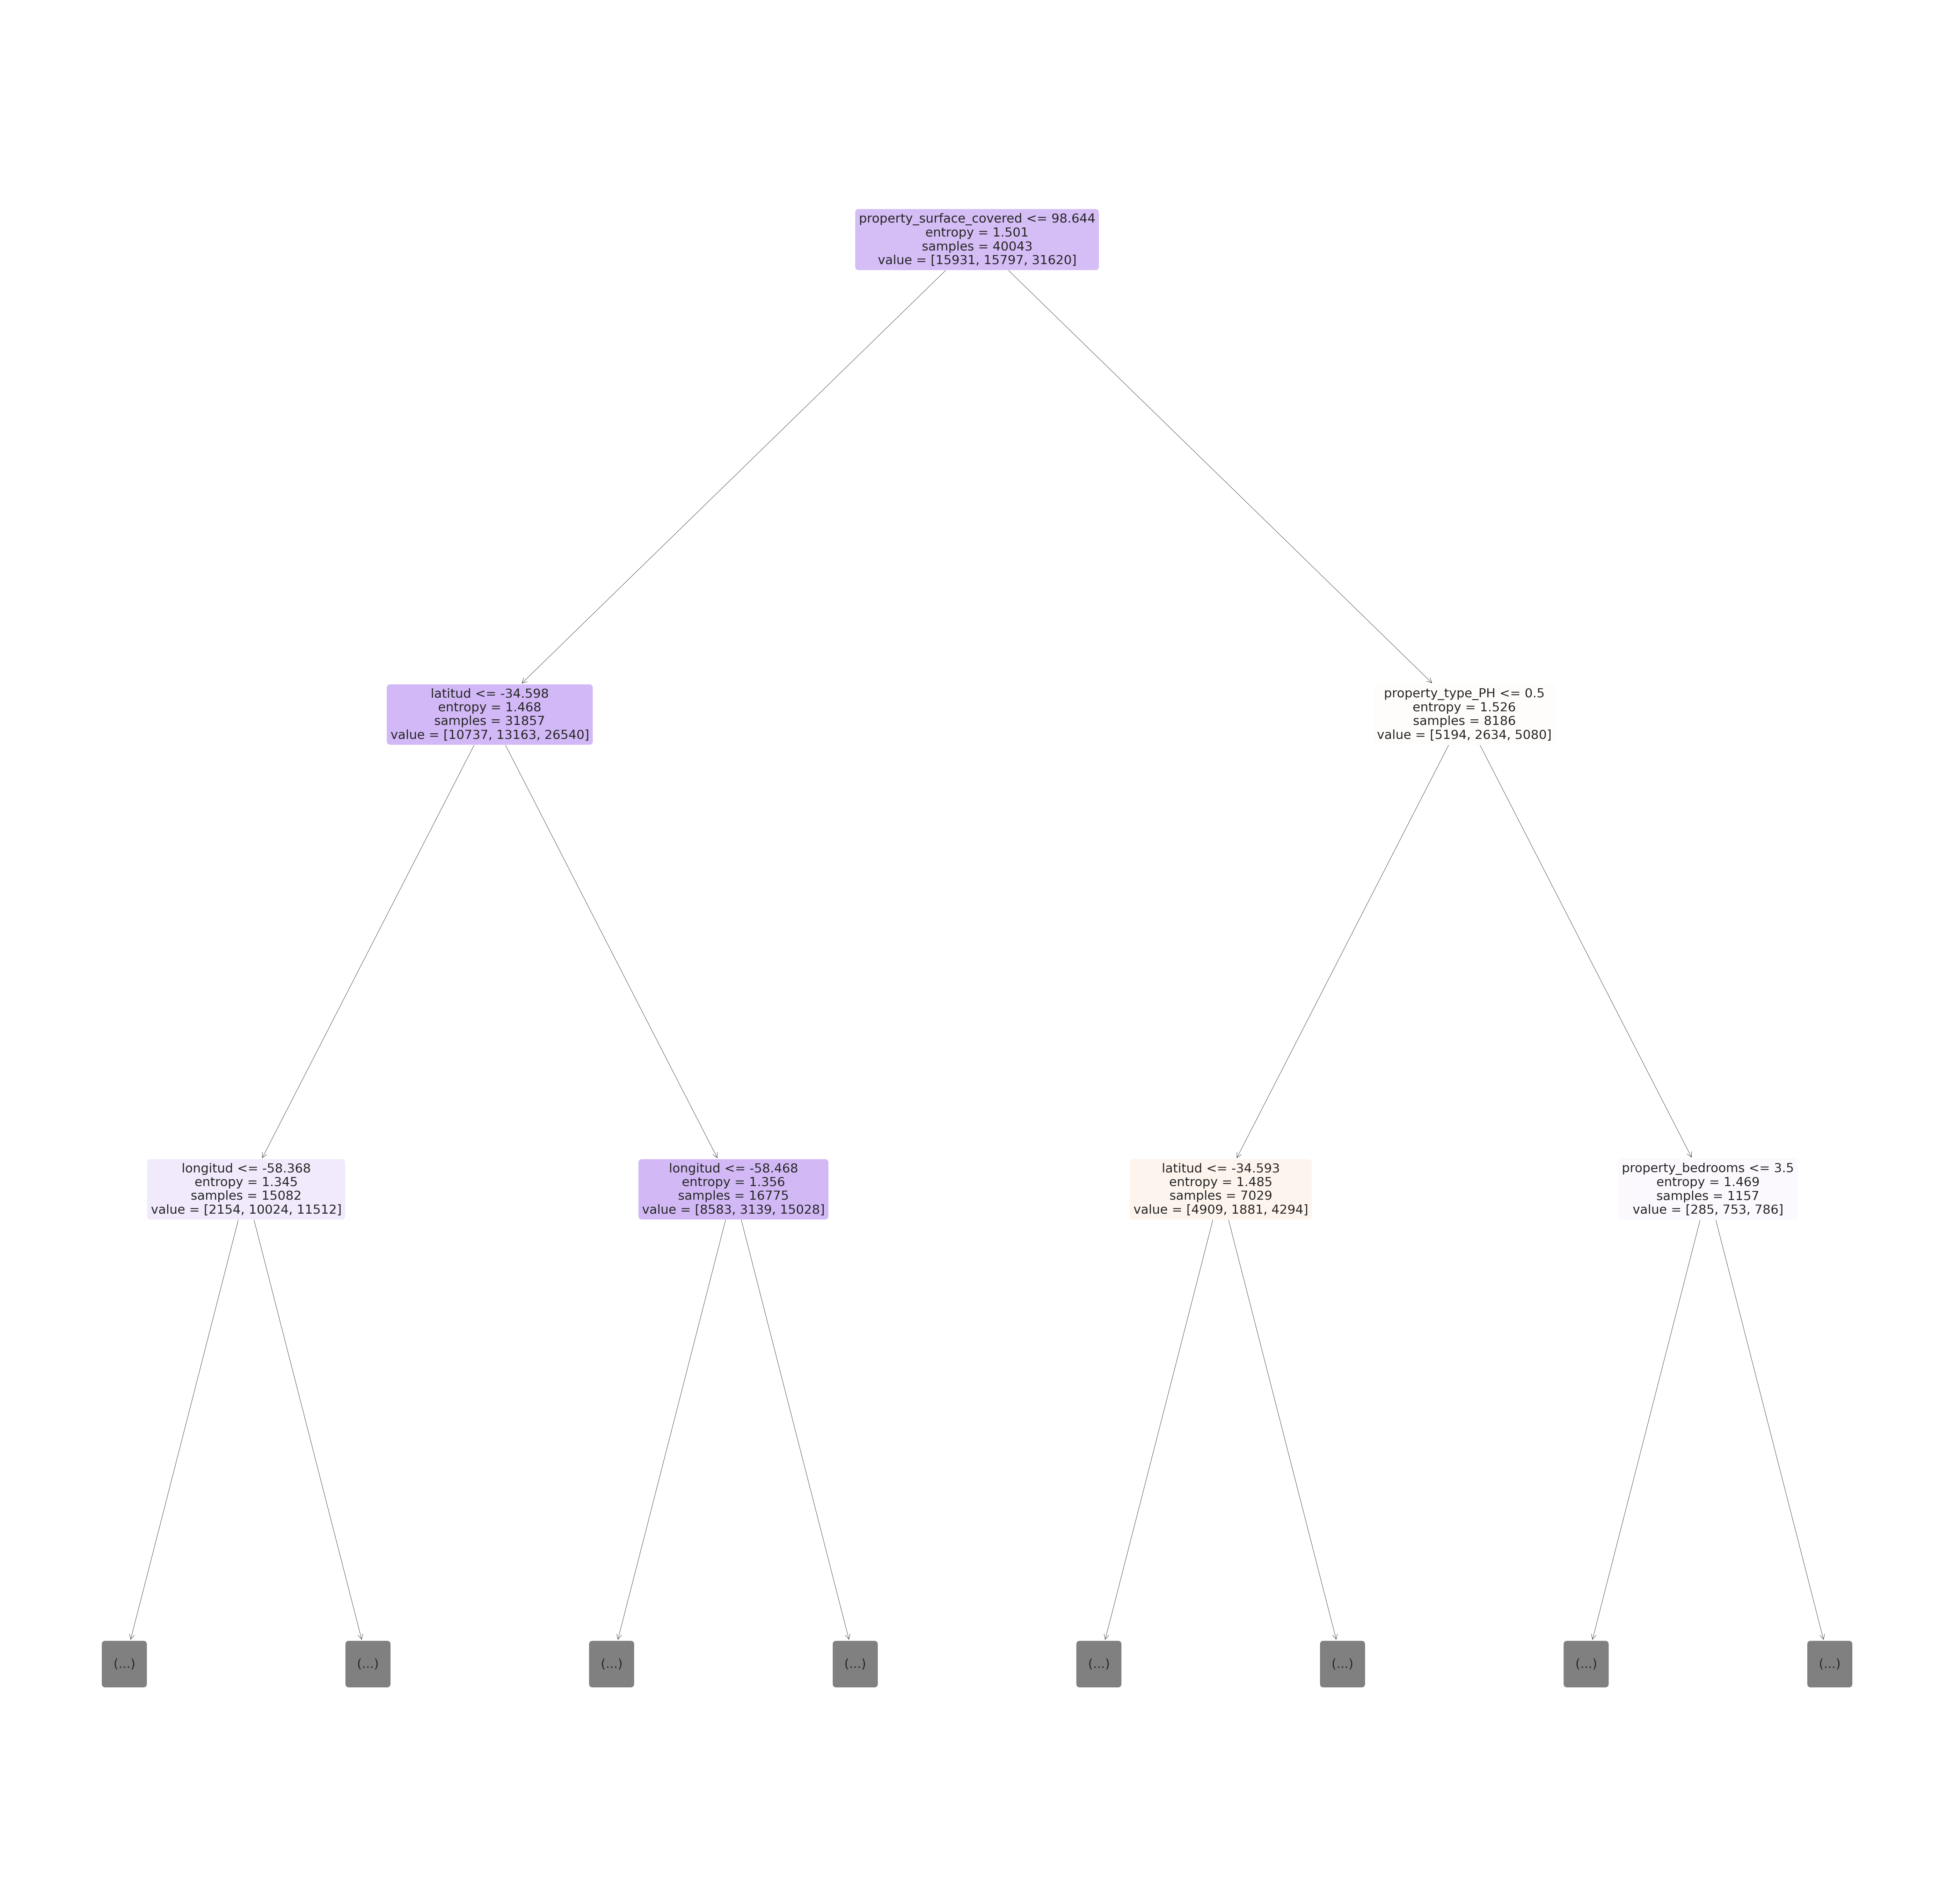

In [282]:
estimator = model.estimators_[1]
plt.figure(figsize=(100,100))
arbol_unico = tree.plot_tree(estimator, max_depth=2, feature_names=x_train_target.columns.to_list(), filled=True, rounded=True)
plt.show(arbol_unico)

Procedemos a evaluar la performance del árbol en el conjunto de evaluación, describiendo las métricas y mostrando la matriz de confusión

En este arbol en particular que seleccionamos del total de arboles de Random Forest podemos observar los siguientes criterios de evaluacion, en los cuales tenemos un nodo raiz conformado por la latitud que divide los barrios que pertenecen a la region A y B en la imagen. En esta primera remificacion se observa una separacion de casi toda la capital federal en la region B y en la region A solo queda comprendida por 3 barrios, de los cuales se puede apreciar la presencia de Puerto madero que es el barrio donde las propiedades tienen mayor precio. 

Luego si observamos el lado izquierdo del arbol vemos que hay una ramificacion la cual esta indicada por las regiones 1 y 2, en la cual podemos apreciar una separacion de Norte y Sur, teniendo en cuenta que suele haber una gran diferencia de precios de las propiedades a medida que estas tienden al Norte de la capital, tendria logica dicho analisis. Tambien pareciera ser que la region 2 es mas extensa que la region 1 lo cual reafirmaria la idea planteada.

Luego en el siguiente nodo, del lado izquierdo, se ramifica nuevamente generando las regiones 2.1 y 2.2, donde en 2.1 se encuentra las zonas centricas de la capital, que si bien no estan compuestas por los barrios mas caros, podria ser que haya una gran cantidad de departamentos en venta por esas zonas lo cual podria ser resultado de dicha división. Por otro lado, en la region 2.2, se encuentra un sector de la capital federal donde predominan las casas, por lo tanto esto generaria que haya una menor densidad de propiedades en venta en comparacion con la region 2.1.   

Por otro lado, en el nodo del lado derecho se puede observar una ramificacion producida por porperty_surface_covered. Esto puede ser producto de que, dentro de toda la region 2, hay un sector donde existe una predominancia de propiedades de tipo casa, que pueden llegar a tener una superficie cubierta mayor a los 100 m^2, y otro sector donde predominan los departamentos y su superficie suele ser menor a los 100 m^2.


A su vez, en la rama derecha del arbol, podemos ver que nos encontramos dentro de la zona A, donde se observa que en caso de ser departamento, el modelo elige dividir por superficie mayor o menor a 60m^2. Teniendo en cuenta los barrios que la comprenden, siendo Puerto madero un barrio relativamente nuevo, las propiedades no suelen ser muy grandes y en caso de encontrarse en La Boca o San telmo, los departamentos suelen tener una superficie mayor, debido a que antes las burguesias solian residir en esas zonas. 

Luego, si no se trata de un departamento tendria logica que sea un ph, dado que la region A esta compuesta por San telmo y la Boca que son barrios antiguos y suelen predominar este tipo de propiedades.


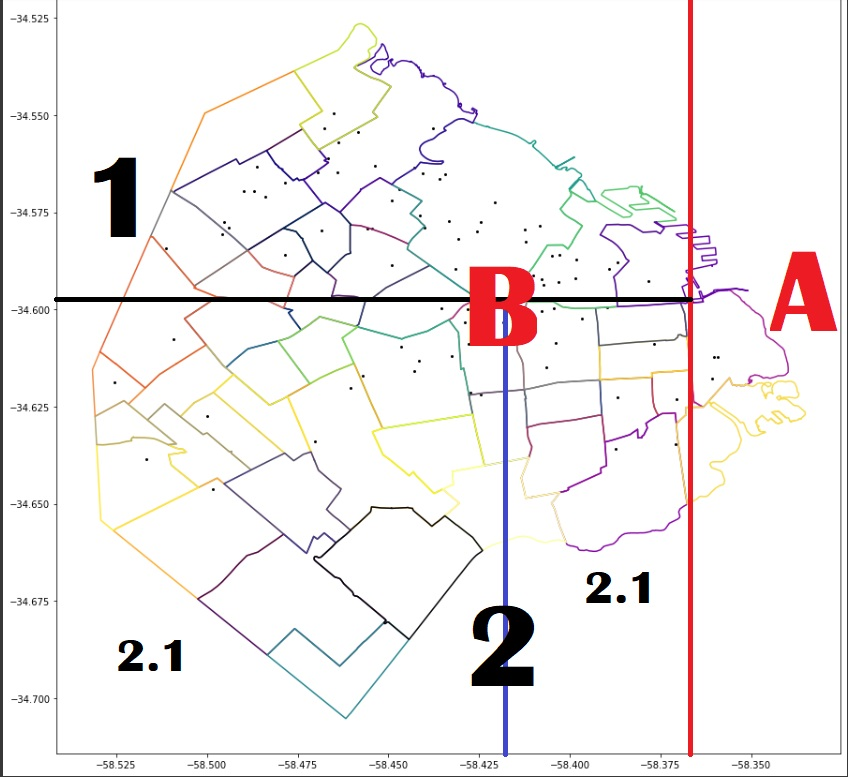

In [283]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test_target,y_pred)
recall=recall_score(y_test_target,y_pred, average='macro')
f1=f1_score(y_test_target,y_pred, average='macro')

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.5805181423419445
Recall: 0.48145840733518774
f1 score: 0.4910131183888204


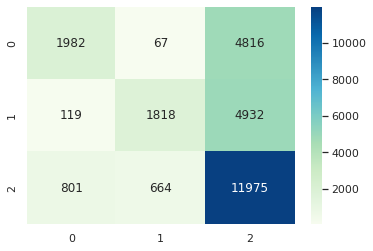

In [284]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test_target, y_pred)
#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')


In [285]:
print("Mejor metrica en train:",mejor_metrica) #mejor metrica del train
print("Metrica en test:",f1) #metrica del test 
print("Diferencia test - train:",(mejor_metrica-f1)) #metrica del test 

Mejor metrica en train: 0.5242492349917902
Metrica en test: 0.4910131183888204
Diferencia test - train: 0.03323611660296982


#### Con DataSet Reducido por PCA


In [286]:
#Clasificador
rmf = RandomForestClassifier()

#Metrica
scorer_fn = make_scorer(sk.metrics.f1_score, average = 'macro')

randomcv = cross_validation_tree_train(base_tree=rmf, scorer_fn=scorer_fn, x_ds=ds_pca, y_ds=y_train_target)

In [287]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)

#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0}
0.3026113346820457


Como paso siguiente, realizaremos el análisis de la importancia de los atributos:


In [288]:
mejor_rmf = randomcv.best_estimator_
feat_imps = mejor_rmf.feature_importances_
importancia_pred_tupla = sorted(zip(feat_imps, ds_pca.columns.values), reverse=True)
sorted(zip(feat_imps, ds_pca.columns.values), reverse=True)

[(0.38499745501042476, 'cp_2'),
 (0.35391027758541554, 'cp_1'),
 (0.26109226740415964, 'cp_3')]

In [289]:
importancia_predictores = pd.DataFrame({'predictor': [importancia_pred_tupla[0][1]], 'cp_2': importancia_pred_tupla[0][0]})
for i in range(1,len(importancia_pred_tupla)):
  importancia_predictores[[importancia_pred_tupla[i][1]]] = importancia_pred_tupla[i][0]

importancia_predictores.drop('predictor', axis='columns', inplace=True)

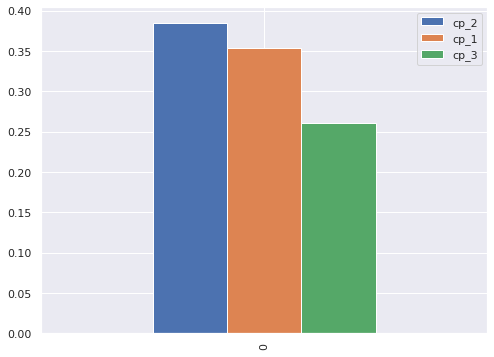

In [290]:
# Graficamos la importancia de los atributos
importancia_predictores.plot(kind='bar', figsize=(8,6))

Mostramos la conformación final de uno de los árboles generados

In [291]:
#Creo el árbol con los mejores hiperparámetros
arbol=RandomForestClassifier(random_state=2).set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
model = arbol.fit(X = ds_pca, y = y_train_target)

In [292]:
y_pred_pca = model.predict(ds_pca_test)

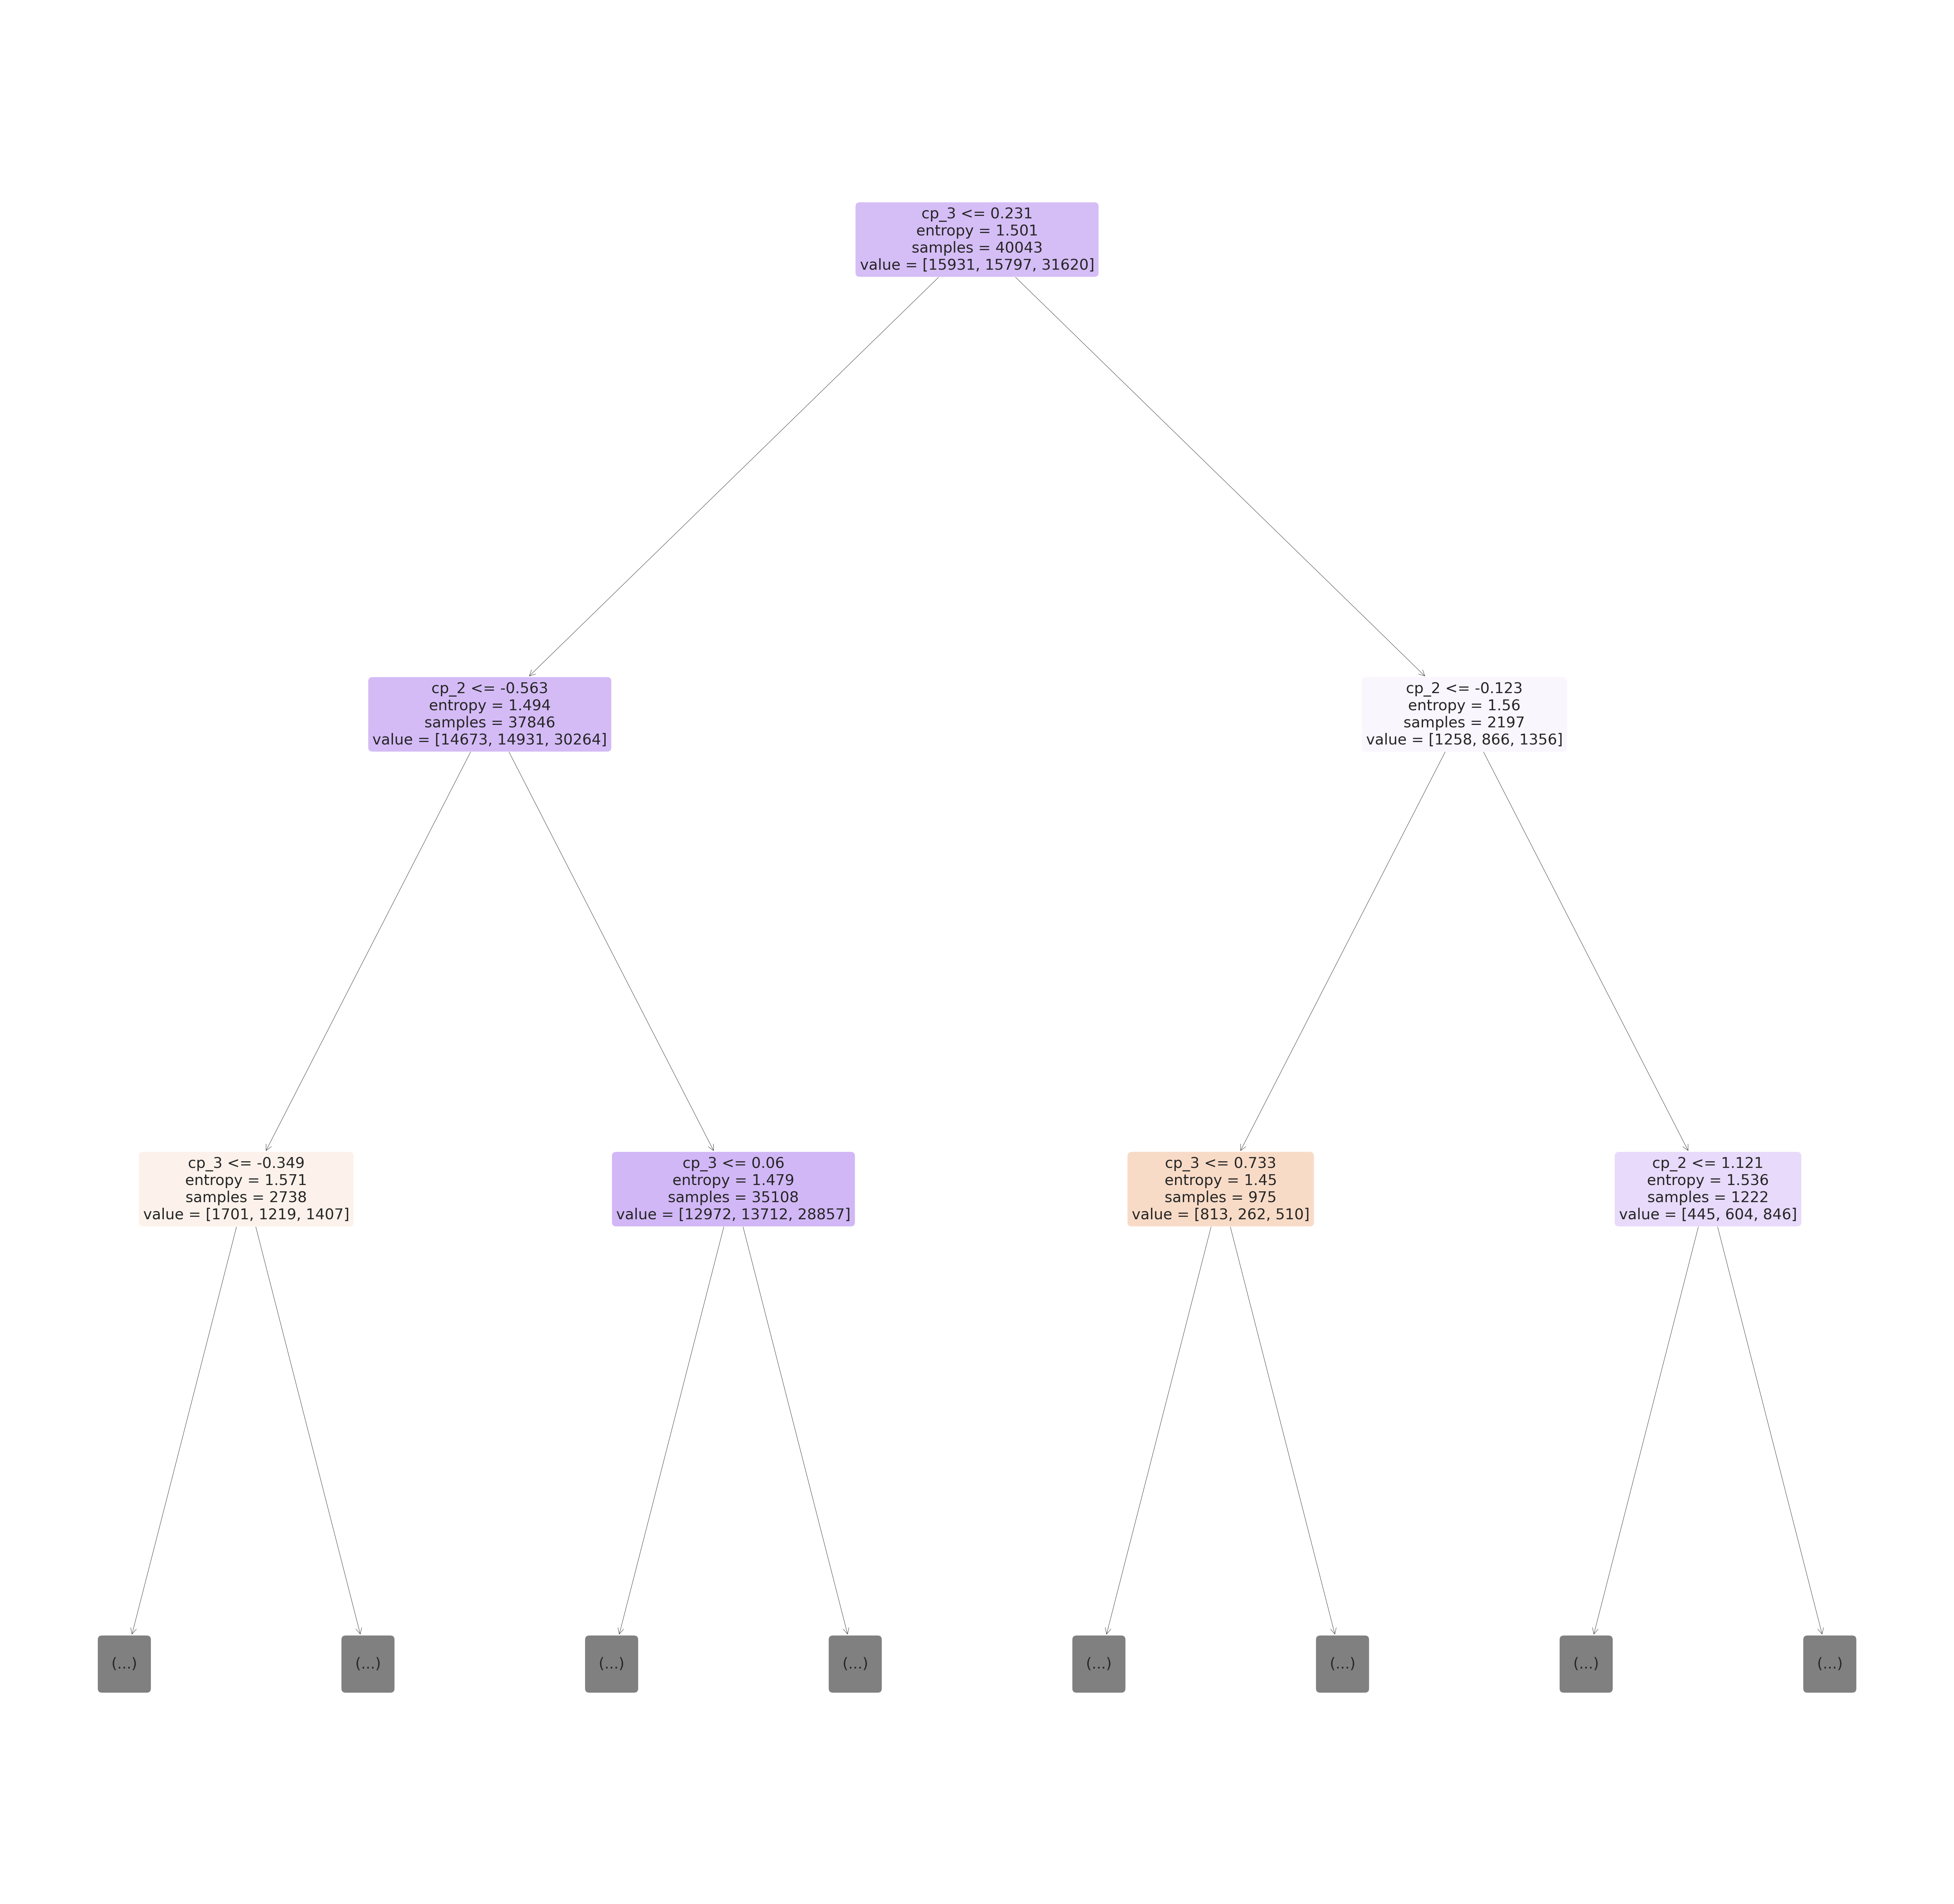

In [293]:
estimator = model.estimators_[1]
plt.figure(figsize=(100,100))
arbol_unico = tree.plot_tree(estimator, max_depth=2, feature_names=ds_pca.columns.to_list(), filled=True, rounded=True)
plt.show(arbol_unico)

Procedemos a evaluar la performance del árbol en el conjunto de evaluación, describiendo las métricas y mostrando la matriz de confusión

In [294]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test_target, y_pred_pca)
recall=recall_score(y_test_target, y_pred_pca, average='macro')
f1=f1_score(y_test_target, y_pred_pca, average='macro')

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.5116287627879591
Recall: 0.36821039977987907
f1 score: 0.3011949733114802


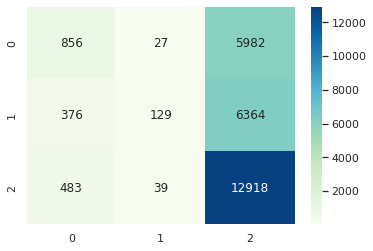

In [295]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test_target, y_pred_pca)
#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')


###Modelo 3: AdaBoost

#### Con DataSet General

In [296]:
from sklearn.ensemble import AdaBoostClassifier

#Clasificador
ab_model = AdaBoostClassifier()

# Metrica
scorer_fn = make_scorer(sk.metrics.f1_score, average = 'macro')

params_grid = {'learning_rate':np.linspace(0.01,0.1,10),
               'n_estimators': list(range(1,100))}

randomcv = cross_validation_tree_train(base_tree=ab_model, scorer_fn=scorer_fn, params_grid=params_grid)

In [297]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'n_estimators': 84, 'learning_rate': 0.1}
0.4241414013827213


In [298]:
metricas, mejor_metrica = encontrar_mejor_metrica_de_cv(randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.43095683838836524


In [299]:
#sns.boxplot(y=metricas_totales, showfliers = False)

In [300]:
#Creo el árbol con los mejores hiperparámetros
ab_model=AdaBoostClassifier(random_state=2).set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
ab_model.fit(x_train_target,y_train_target)

AdaBoostClassifier(learning_rate=0.1, n_estimators=84, random_state=2)

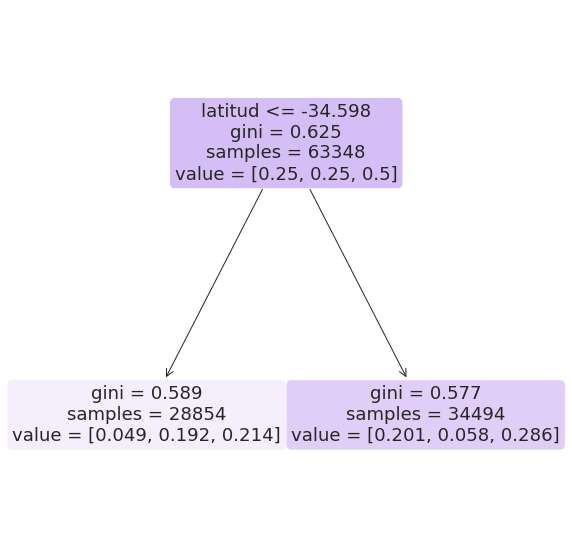

In [301]:
plt.figure(figsize=(10,10))
tree_plot_completo=tree.plot_tree(ab_model.estimators_[0],feature_names=x_train_target.columns.to_list(),filled=True,rounded=True)
plt.show(tree_plot_completo)

In [302]:
y_pred_ab = ab_model.predict(x_test_target)

In [303]:
# Evalúo en el set de test
accuracy=accuracy_score(y_test_target,y_pred_ab)
recall=recall_score(y_test_target,y_pred_ab, average='macro')
f1=f1_score(y_test_target,y_pred_ab, average='macro')

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.5451902553911827
Recall: 0.43186768493607514
f1 score: 0.423122811801156


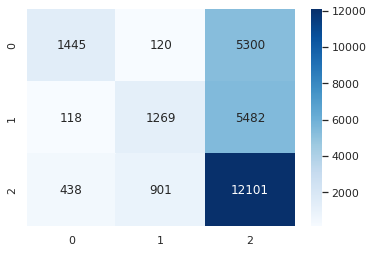

In [304]:
#Matriz Confusión
cm = confusion_matrix(y_test_target,y_pred_ab)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel='Predicted'
plt.ylabel='True'

In [305]:
from sklearn.metrics import classification_report
#Reporte
print(classification_report(y_test_target,y_pred_ab))

              precision    recall  f1-score   support

  high_price       0.72      0.21      0.33      6865
   low_price       0.55      0.18      0.28      6869
medium_price       0.53      0.90      0.67     13440

    accuracy                           0.55     27174
   macro avg       0.60      0.43      0.42     27174
weighted avg       0.58      0.55      0.48     27174



In [306]:
print("Mejor metrica en train:",mejor_metrica) #mejor metrica del train
print("Metrica en test:",f1) #metrica del test 
print("Diferencia test - train:",(mejor_metrica-f1)) #metrica del test 

Mejor metrica en train: 0.43095683838836524
Metrica en test: 0.423122811801156
Diferencia test - train: 0.00783402658720922


#### Con DataSet Reducido por PCA

In [307]:
#Clasificador
ab_model = AdaBoostClassifier()

# Metrica
scorer_fn = make_scorer(sk.metrics.f1_score, average = 'macro')

params_grid = {'learning_rate':np.linspace(0.01,0.1,10),
               'n_estimators': list(range(1,100))}

randomcv = cross_validation_tree_train(base_tree=ab_model, scorer_fn=scorer_fn, params_grid=params_grid, x_ds=ds_pca, y_ds=y_train_target)

In [308]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'n_estimators': 84, 'learning_rate': 0.1}
0.284015462404869


In [309]:
metricas, mejor_metrica = encontrar_mejor_metrica_de_cv(randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.28942629951098214


In [310]:
#sns.boxplot(y=metricas_totales, showfliers = False)

In [311]:
#Creo el árbol con los mejores hiperparámetros
ab_model_pca=AdaBoostClassifier(random_state=2).set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
ab_model_pca.fit(ds_pca,y_train_target)

AdaBoostClassifier(learning_rate=0.1, n_estimators=84, random_state=2)

Luego de crear el arbol con los mejores hiperparámetros, mostramos el arbol generado en un gráfico

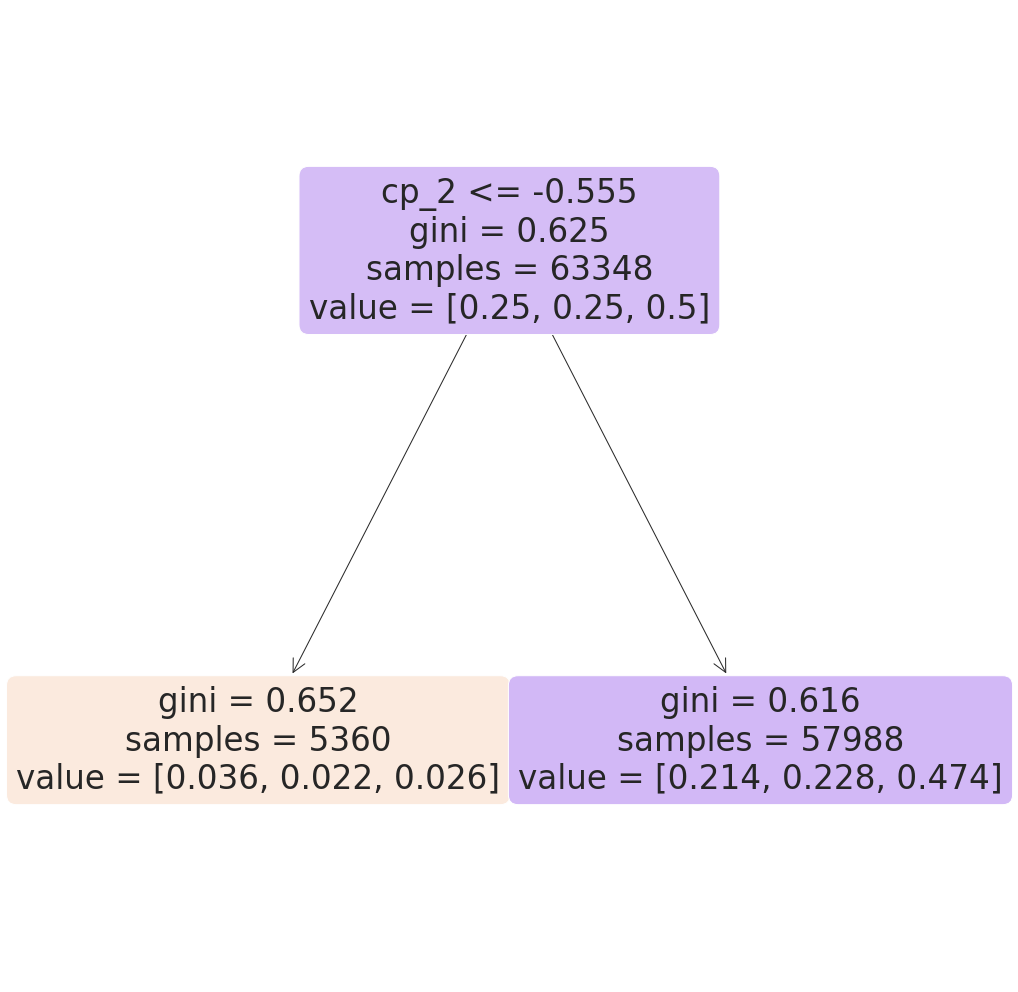

In [312]:
plt.figure(figsize=(18,18))
tree_plot_completo=tree.plot_tree(ab_model_pca.estimators_[0],max_depth=2,feature_names=ds_pca.columns.to_list(),filled=True,rounded=True)
plt.show(tree_plot_completo)

In [313]:
y_pred_ab_pca = ab_model_pca.predict(ds_pca_test)#test

In [314]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test_target, y_pred_ab_pca)
recall=recall_score(y_test_target, y_pred_ab_pca, average='macro')
f1=f1_score(y_test_target, y_pred_ab_pca, average='macro')

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.5066239788032678
Recall: 0.35949640675036704
f1 score: 0.2821831429206742


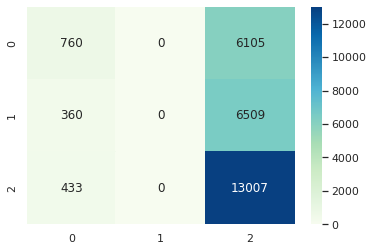

In [315]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test_target, y_pred_ab_pca)
#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')

Procedemos a realizar la comparacion de la performance del arbol en el conjunto de evaluacion vs en el conjunto de entrenamiento. 

In [316]:
from sklearn.metrics import classification_report
#Reporte
print(classification_report(y_test_target,y_pred_ab_pca))

              precision    recall  f1-score   support

  high_price       0.49      0.11      0.18      6865
   low_price       0.00      0.00      0.00      6869
medium_price       0.51      0.97      0.67     13440

    accuracy                           0.51     27174
   macro avg       0.33      0.36      0.28     27174
weighted avg       0.37      0.51      0.38     27174



In [317]:
print("Mejor metrica en train:",mejor_metrica) #mejor metrica del train
print("Metrica en test:",f1) #metrica del test 
print("Diferencia test - train:",(mejor_metrica-f1)) #metrica del test 

Mejor metrica en train: 0.28942629951098214
Metrica en test: 0.2821831429206742
Diferencia test - train: 0.007243156590307942


### Modelo elegido

En conclusión, habiendo predicho el valor del target tipo_precio_generico con los 3 modelos: Árbol de Decisión, Random Forest y AdaBoost, elegiríamos el modelo Random Forest ya que en el caso de AdaBoost tendríamos la desventaja de que no se puede paralizar el modelo ya que cada predictor solo se puede entrenar después de haber entrenado y evaluado el anterior, por lo que es poco escalable. En cambio, Random Forest si puede hacerse en paralelo, cada uno de los árboles está construido de forma independiente de los otros y no importa el orden de creación, lo que lo hace mucho más escalable.

#Regresión

Para formar todos los modelos regresores (modelo 1, 2 y 3) , utilizamos la métrica r2_score debido a que es el coeficiente de determinación y determina la capacidad de un modelo para predecir futuros resultados.

En cuanto los folds utilizados, usaremos 5, tal y como explicamos en la seguin anterior de "Entrenamiento y Prediccion", debido a que utilizamos la misma funcion para hacer cross validation. 

In [318]:
def calcular_metricas_de_regresion(y_pred):  
  #Mean Square Error
  mse = sk.metrics.mean_squared_error(
          y_true  = y_test,
          y_pred  = y_pred,
          squared = True
        )

  print(f"El error (mse) de test es: {mse}")

  #Root Mean Square Error
  rmse = sk.metrics.mean_squared_error(
          y_true  = y_test,
          y_pred  = y_pred,
          squared = False
        )

  print(f"El error (rmse) de test es: {rmse}")

In [319]:
#One hot encoding para property_type
train_con_dummi = pd.get_dummies(x_train, columns=["property_type"], drop_first=False)
test_con_dummi = pd.get_dummies(x_test, columns=["property_type"], drop_first=False)

In [320]:
x_test.columns


Index(['id', 'latitud', 'longitud', 'place_l2', 'place_l3', 'operation',
       'property_type', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'property_price',
       'property_currency', 'property_title', 'pxm2', 'tipo_precio_generico'],
      dtype='object')

In [321]:
# #Conseguimos los data set de entrenamiento para la regresion habiendo trabajado la variable propery_type con dummies
# #y eliminado el precio.
# x_train_reg = train_con_dummi.drop(columns = ['id', 'latitud', 'longitud', 'place_l2', 'place_l3', 'operation', 'property_rooms', 'property_bedrooms',
#        'property_surface_total', 'property_surface_covered', 'pxm2', 'tipo_precio_generico', 'property_type_Casa', 'property_type_PH', 'property_type_Departamento',
#        'property_currency', 'property_title', 'tipo_precio_1', 'tipo_precio_2'], inplace=False)
# x_test_reg = test_con_dummi.drop(columns = ['id', 'latitud', 'longitud', 'place_l2', 'place_l3', 'operation',
#        'property_rooms', 'property_bedrooms',
#        'property_surface_total', 'property_surface_covered',
#        'property_currency', 'property_title', 'pxm2', 'tipo_precio_generico', 'property_type_Casa', 'property_type_PH', 'property_type_Departamento'], inplace=False)

In [322]:
#Conseguimos los data set de entrenamiento para la regresion habiendo trabajado la variable propery_type con dummies
#y eliminado el precio.
x_train_reg = train_con_dummi.drop(columns = ['id', 'latitud', 'longitud', 'place_l2', 'place_l3', 'operation', 'pxm2', 'tipo_precio_generico', 'property_type_Casa', 'property_type_PH', 'property_type_Departamento',
       'property_currency', 'property_title', 'tipo_precio_1', 'tipo_precio_2', 'property_price'], inplace=False)
x_test_reg = test_con_dummi.drop(columns = ['id', 'latitud', 'longitud', 'place_l2', 'place_l3', 'operation',
       'property_currency', 'property_title', 'pxm2', 'tipo_precio_generico', 'property_price', 'property_type_Casa', 'property_type_PH', 'property_type_Departamento'], inplace=False)

In [323]:
x_train_reg

property_rooms  property_bedrooms  property_surface_total  \
43                 4.0                3.0               70.000000   
49                 4.0                2.0              137.205714   
53                 2.0                1.0               61.000000   
55                 4.0                2.0              104.000000   
57                 3.0                2.0               59.000000   
...                ...                ...                     ...   
460028             2.0                1.0               44.000000   
460069             1.0                1.0               39.000000   
460070             1.0                1.0               37.000000   
460073             3.0                2.0               68.000000   
460074             1.0                1.0               51.000000   

        property_surface_covered  
43                          70.0  
49                         104.0  
53                          46.0  
55                          54.0  
57                          55.0  
...                          ...  
460028                      41.0  
460069                      35.0  
460070                      31.0  
460073                      60.0  
460074                      30.0  

[63348 rows x 4 columns]

In [324]:
#Conseguimos el dataset de pca
x_train_reg_pca = ds_pca.copy()
x_test_reg_pca = ds_pca_test.copy()

In [325]:
x_test_reg_pca

cp_1      cp_2      cp_3
42      -0.263246  0.531688  0.068009
51       0.617862  0.365189  0.557958
56      -1.203081 -0.298293  0.183425
58      10.431251  3.276895 -1.886605
59       1.395607  0.648137 -0.115807
...           ...       ...       ...
460067  -0.126695  0.397233  0.059678
460071  -1.781830 -0.436649 -0.356511
460072   1.524852  0.516611 -0.142540
460075  -1.874769 -0.341944 -0.336731
460090  -0.694616 -0.796045  0.165250

[27174 rows x 3 columns]

In [326]:
# #Normalizamos 



# from sklearn.preprocessing import MinMaxScaler

# def ajusteMinMax(nombreColumna, ds, ds_test):
#   scaler = StandardScaler() 

#   #Ajusto el "escalador" a la variable
#   # scaler.fit(pd.DataFrame(ds[nombreColumna]))

#   #Escalo la variable en el set de entrenamiento
#   ds[nombreColumna]=scaler.fit_transform(ds[nombreColumna].to_frame())

#   #Escalo la variable property_rooms en el set de test
#   ds_test[nombreColumna]=scaler.transform(ds_test[nombreColumna].to_frame())



# ajusteMinMax('property_rooms', x_train_reg, x_test_reg)
# ajusteMinMax('property_bedrooms', x_train_reg, x_test_reg)
# ajusteMinMax('property_surface_total', x_train_reg, x_test_reg)
# ajusteMinMax('property_surface_covered', x_train_reg, x_test_reg)

# x_train_reg



###Modelo 1: KNN

#### Con DataSet General

In [327]:
# from sklearn.neighbors import KNeighborsRegressor

# # Creo un modelo KNN para regresion y lo ajusto
# knn = KNeighborsRegressor().fit(x_train_reg, y_train)

# #Hago una predicción
# knn_y_pred=knn.predict(x_test_reg)

In [328]:
# n_neighbors = [2, 3, 5, 10]
# algorithm = ["auto",  "ball_tree", "kd_tree", "brute"]

# knn_params_grid = {'weights':['uniform', 'distance'],
#             'algorithm': algorithm,
#                 'n_neighbors': n_neighbors,
#                 'leaf_size': [20,22,23,30],
#                 'p' : [1,2],
#                 }
# knn = KNeighborsRegressor()
# knn_randomcv = RandomizedSearchCV(knn, knn_params_grid, random_state=2)
# knn_randomcv.fit(x_train_reg, y_train)

In [329]:
# print(); print("los mejores parametros son: ",knn_randomcv.best_params_)

# CV_Result = cross_val_score(knn_randomcv, x_train_reg, y_train, cv=3, n_jobs=-1, scoring="r2")
# print(); print(CV_Result)
# print(); print("la media es: ",CV_Result.mean())
# print(); print("el desvio estandar es: ",CV_Result.std())

In [330]:
#######

In [331]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn_params_grid = {'leaf_size': [10,20,30],
              'metric': ['euclidean', 'manhattan'],
              'n_neighbors': [3,4,5,6],
              'weights': ['uniform', 'distance']}

knn = KNeighborsRegressor()

knn_scorer_fn = make_scorer(sk.metrics.r2_score, multioutput='variance_weighted')

knn_randomcv = cross_validation_tree_train(base_tree=knn, scorer_fn=knn_scorer_fn, params_grid=knn_params_grid, x_ds=x_train_reg, y_ds=y_train)

In [332]:
#Mejores hiperparametros del arbol
print(knn_randomcv.best_params_)
#Mejor métrica
print(knn_randomcv.best_score_)

{'weights': 'distance', 'n_neighbors': 6, 'metric': 'euclidean', 'leaf_size': 20}
0.7072586508450217


In [333]:
knn_metricas, knn_mejor_metrica = encontrar_mejor_metrica_de_cv(knn_randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.7241554304560034


In [334]:
# Creo un modelo KNN para regresion y lo ajusto
knn_regressor = KNeighborsRegressor().set_params(**knn_randomcv.best_params_)

knn_regressor.fit(x_train_reg, y_train)

#Hago una predicción
knn_y_pred = knn_regressor.predict(x_test_reg)

In [335]:
# Performance
knn_performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': knn_y_pred,
                            'Error': y_test - knn_y_pred})
# View
knn_performance.head()

Valor Real     Prediccion          Error
42     82900.0  116316.666667  -33416.666667
51    250000.0  161500.000000   88500.000000
56    100000.0  116500.000000  -16500.000000
58    500000.0  673665.578251 -173665.578251
59    110000.0  230975.000000 -120975.000000

In [336]:
calcular_metricas_de_regresion(knn_y_pred)

El error (mse) de test es: 19110715195.871685
El error (rmse) de test es: 138241.5103934838


In [337]:
#Coef. de Determinación R2
knn_score = knn_regressor.score(x_test_reg, y_test)
knn_score

0.6901309684204691

In [338]:
print('Diferencia entre las metricas del train y test', knn_mejor_metrica - knn_score)

Diferencia entre las metricas del train y test 0.03402446203553433


In [339]:
knn_r2 = r2_score(y_test, knn_y_pred, multioutput='variance_weighted')
knn_r2

0.6901309684204691

#### Con DataSet Reducido por PCA

In [340]:
knn_params_grid_pca = {'leaf_size': [10,20,30],
              'metric': ['euclidean', 'manhattan'],
              'n_neighbors': [3,4,5,6],
              'weights': ['uniform', 'distance']}

knn_pca = KNeighborsRegressor()

knn_scorer_fn_pca = make_scorer(sk.metrics.r2_score, multioutput='variance_weighted')

knn_randomcv_pca = cross_validation_tree_train(base_tree=knn_pca, scorer_fn=knn_scorer_fn_pca, params_grid=knn_params_grid_pca, x_ds=x_train_reg_pca, y_ds=y_train)

In [341]:
x_train_reg_pca

cp_1      cp_2      cp_3
43      0.827640  1.210268 -0.068415
49      1.115888 -0.126009  0.523961
53     -1.192906 -0.307716  0.185437
55      0.438876  0.538199  0.554615
57     -0.255985  0.524324  0.066619
...          ...       ...       ...
460028 -1.359937 -0.140557  0.207525
460069 -1.825375 -0.390246 -0.338270
460070 -1.874769 -0.341944 -0.336731
460073 -0.147044  0.416078  0.055655
460074 -1.781830 -0.436649 -0.356511

[63348 rows x 3 columns]

In [342]:
#Mejores hiperparametros del arbol
print(knn_randomcv_pca.best_params_)
#Mejor métrica
print(knn_randomcv_pca.best_score_)

{'weights': 'distance', 'n_neighbors': 6, 'metric': 'euclidean', 'leaf_size': 20}
0.695000286731389


In [343]:
knn_metricas_pca, knn_mejor_metrica_pca = encontrar_mejor_metrica_de_cv(knn_randomcv_pca) 

La mejor metrica obtenida mediante cv en train es de: 0.7201719949742384


In [344]:
# Creo un modelo KNN para regresion y lo ajusto
knn_regressor_pca = KNeighborsRegressor().set_params(**knn_randomcv_pca.best_params_)

knn_regressor_pca.fit(x_train_reg_pca, y_train)

#Hago una predicción
knn_y_pred_pca = knn_regressor_pca.predict(x_test_reg_pca)

In [345]:
# Performance
knn_performance_pca = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': knn_y_pred_pca,
                            'Error': y_test - knn_y_pred_pca})
# View
knn_performance_pca.head()

Valor Real     Prediccion          Error
42     82900.0  123000.000000  -40100.000000
51    250000.0  222488.659141   27511.340859
56    100000.0  150625.000000  -50625.000000
58    500000.0  395748.444433  104251.555567
59    110000.0  230975.000000 -120975.000000

In [346]:
y_test

42         82900.0
51        250000.0
56        100000.0
58        500000.0
59        110000.0
            ...   
460067    130000.0
460071     75500.0
460072    220000.0
460075     74500.0
460090    135000.0
Name: property_price, Length: 27174, dtype: float64

In [347]:
calcular_metricas_de_regresion(knn_y_pred_pca)

El error (mse) de test es: 19771002628.151615
El error (rmse) de test es: 140609.39736785594


In [348]:
#Coef. de Determinación R2
knn_score_pca = knn_regressor_pca.score(x_test_reg_pca, y_test)
knn_score_pca

0.6794247952025816

In [349]:
print('Diferencia entre las metricas del train y test', knn_mejor_metrica_pca - knn_score_pca)

Diferencia entre las metricas del train y test 0.04074719977165686


### Modelo 2: XGBoost

#### Con DataSet General

In [350]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import hyperopt
from hyperopt import tpe, fmin
from hyperopt import hp

In [351]:
# parametros para hacer el cv
xgb_reg_params = {
    'learning_rate':     [0.05, 0.3], # Default 0.3
    'max_depth':        [5, 16, 5], # Default 6
    'min_child_weight': [1, 10, 1], # Default 1
    'colsample_bytree': [0.3, 1], # Default 1
    'subsample':        [0.4, 1], #  >= 0.5 for good results.
    'n_estimators':     [5, 10, 15, 20],
    'reg_alpha':        [0, 0.001, 0.005, 0.01, 0.05], # Default 0
    'gamma':            [0, 0.005, 0.01, 0.05, 1] # Default 0
}

In [352]:
xgbr = XGBRegressor(objective='reg:squarederror')

xgb_scorer_fn = make_scorer(sk.metrics.r2_score)

xgb_randomcv = cross_validation_tree_train(base_tree=xgbr, scorer_fn=xgb_scorer_fn, params_grid=xgb_reg_params, x_ds=x_train_reg, y_ds=y_train)

In [353]:
#Mejores hiperparametros del arbol
print(xgb_randomcv.best_params_)
#Mejor métrica
print(xgb_randomcv.best_score_)

{'subsample': 0.4, 'reg_alpha': 0.005, 'n_estimators': 15, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.01, 'colsample_bytree': 1}
0.6795082186378634


In [354]:
xgb_metricas, xgb_mejor_metrica = encontrar_mejor_metrica_de_cv(xgb_randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.688291652970609


In [355]:
xgbr = XGBRegressor(objective='reg:squarederror').set_params(**xgb_randomcv.best_params_)

xgbr.fit(x_train_reg, y_train)
 
xgb_y_pred = xgbr.predict(x_test_reg)

In [356]:
# Performance
xgb_performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': xgb_y_pred,
                            'Error': y_test - xgb_y_pred})
# View
xgb_performance.head()

Valor Real     Prediccion          Error
42     82900.0  130347.093750  -47447.093750
51    250000.0  190495.906250   59504.093750
56    100000.0  124517.328125  -24517.328125
58    500000.0  257181.765625  242818.234375
59    110000.0  284639.531250 -174639.531250

In [357]:
calcular_metricas_de_regresion(xgb_y_pred)

El error (mse) de test es: 19624942640.48081
El error (rmse) de test es: 140089.05253616648


In [358]:
#Coef. de Determinación R2
xgb_score = xgbr.score(x_test_reg, y_test)
xgb_score

0.6817930721858443

In [359]:
print('Diferencia entre las metricas del train y test', xgb_mejor_metrica - xgb_score)

Diferencia entre las metricas del train y test 0.006498580784764729


#### Con DataSet Reducido por PCA

In [360]:
# parametros para hacer el cv
xgb_reg_params_pca = {
    'learning_rate':     [0.05, 0.3], # Default 0.3
    'max_depth':        [5, 16, 5], # Default 6
    'min_child_weight': [1, 10, 1], # Default 1
    'colsample_bytree': [0.3, 1], # Default 1
    'subsample':        [0.4, 1], #  >= 0.5 for good results.
    'n_estimators':     [5, 10, 15, 20],
    'reg_alpha':        [0, 0.001, 0.005, 0.01, 0.05], # Default 0
    'gamma':            [0, 0.005, 0.01, 0.05, 1] # Default 0
}

In [361]:
xgbr_pca = XGBRegressor(objective='reg:squarederror')

xgb_scorer_fn_pca = make_scorer(sk.metrics.r2_score)

xgb_randomcv_pca = cross_validation_tree_train(base_tree=xgbr_pca, scorer_fn=xgb_scorer_fn_pca, params_grid=xgb_reg_params_pca, x_ds=x_train_reg_pca, y_ds=y_train)

In [362]:
#Mejores hiperparametros del arbol
print(xgb_randomcv_pca.best_params_)
#Mejor métrica
print(xgb_randomcv_pca.best_score_)

{'subsample': 0.4, 'reg_alpha': 0.005, 'n_estimators': 15, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.01, 'colsample_bytree': 1}
0.6533641820117515


In [363]:
xgb_metricas_pca, xgb_mejor_metrica_pca = encontrar_mejor_metrica_de_cv(xgb_randomcv_pca) 

La mejor metrica obtenida mediante cv en train es de: 0.6652486549249326


In [364]:
xgbr_pca = XGBRegressor(objective='reg:squarederror').set_params(**xgb_randomcv_pca.best_params_)

xgbr_pca.fit(x_train_reg_pca, y_train)
 
xgb_y_pred_pca = xgbr_pca.predict(x_test_reg_pca)

In [365]:
# Performance
xgb_performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': xgb_y_pred_pca,
                            'Error': y_test - xgb_y_pred_pca})
# View
xgb_performance.head()

Valor Real     Prediccion          Error
42     82900.0  125805.546875  -42905.546875
51    250000.0  203485.578125   46514.421875
56    100000.0  140931.968750  -40931.968750
58    500000.0  411396.437500   88603.562500
59    110000.0  283565.468750 -173565.468750

In [366]:
calcular_metricas_de_regresion(xgb_y_pred_pca)

El error (mse) de test es: 21174190020.818092
El error (rmse) de test es: 145513.5389605314


In [367]:
#Coef. de Determinación R2
xgb_score_pca = xgbr_pca.score(x_test_reg_pca, y_test)
xgb_score_pca

0.6566729351055773

In [368]:
print('Diferencia entre las metricas del train y test', xgb_mejor_metrica_pca - xgb_score_pca)

Diferencia entre las metricas del train y test 0.008575719819355232


### Modelo 3: Regresión Lineal

#### Con DataSet General

In [369]:
# esto esta para tratar de ver si esta bien hacer una regresion lineal
# sns.scatterplot(data = x_train, x = "property_price", y = 'property_surface_covered')

In [370]:
lr = LinearRegression()

lr_params = {'n_jobs':[0,1,2,3], 'normalize':[True, False], 'positive':[True, False]}

lr_scorer_fn = make_scorer(sk.metrics.r2_score)

lr_randomcv = cross_validation_tree_train(base_tree=lr, scorer_fn=lr_scorer_fn, params_grid=lr_params, x_ds=x_train_reg, y_ds=y_train)

In [371]:
#Mejores hiperparametros del arbol
print(lr_randomcv.best_params_)

#Mejor métrica
print(lr_randomcv.best_score_)

{'positive': False, 'normalize': True, 'n_jobs': 1}
0.6333680329075584


In [372]:
lr_metricas, lr_mejor_metrica = encontrar_mejor_metrica_de_cv(lr_randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.6485500747068658


In [373]:
# Creo un modelo de regresion lineal y lo ajusto
lr_model = LinearRegression().fit(x_train_reg, y_train)

#Hago una predicción
lr_y_pred = lr_model.predict(x_test_reg)

In [374]:
calcular_metricas_de_regresion(lr_y_pred)

El error (mse) de test es: 22717867224.8596
El error (rmse) de test es: 150724.47453834297


In [375]:
#Coef. de Determinación R2
lr_score = lr_model.score(x_test_reg, y_test)
lr_score

0.6316431151650305

In [376]:
print('Diferencia entre las metricas del train y test', lr_mejor_metrica - lr_score)

Diferencia entre las metricas del train y test 0.016906959541835298


#### Con DataSet Reducido por PCA

In [377]:
# esto esta para tratar de ver si esta bien hacer una regresion lineal
# sns.scatterplot(data = x_train, x = "property_price", y = 'property_surface_covered')

In [378]:
lr_pca = LinearRegression()

lr_params_pca = {'n_jobs':[0,1,2,3], 'normalize':[True, False], 'positive':[True, False]}

lr_scorer_fn_pca = make_scorer(sk.metrics.r2_score)

lr_randomcv_pca = cross_validation_tree_train(base_tree=lr_pca, scorer_fn=lr_scorer_fn_pca, params_grid=lr_params_pca, x_ds=x_train_reg_pca, y_ds=y_train)

In [379]:
#Mejores hiperparametros del arbol
print(lr_randomcv_pca.best_params_)

#Mejor métrica
print(lr_randomcv_pca.best_score_)

{'positive': False, 'normalize': True, 'n_jobs': 1}
0.6009357042922179


In [380]:
lr_metricas_pca, lr_mejor_metrica_pca = encontrar_mejor_metrica_de_cv(lr_randomcv_pca) 

La mejor metrica obtenida mediante cv en train es de: 0.6137035101204262


In [381]:
# Creo un modelo de regresion lineal y lo ajusto
lr_model_pca = LinearRegression().fit(x_train_reg_pca, y_train)

#Hago una predicción
lr_y_pred_pca = lr_model_pca.predict(x_test_reg_pca)

In [382]:
calcular_metricas_de_regresion(lr_y_pred_pca)

El error (mse) de test es: 24663333173.400585
El error (rmse) de test es: 157045.64041513723


In [383]:
#Coef. de Determinación R2
lr_score_pca = lr_model_pca.score(x_test_reg_pca, y_test)
lr_score_pca

0.6000985265263188

In [384]:
print('Diferencia entre las metricas del train y test', lr_mejor_metrica_pca - lr_score_pca)

Diferencia entre las metricas del train y test 0.013604983594107445


# Conclusiones